**Final Project**

Subject: Introduction Machine Learning **bold text**

Present machine learning issues by building machine learning models for classification
problem.

1) Standardize data: using a dataset of numeric and categorial (nominal) types (1p)

2) Processing with unbalanced data, it means there is unequal/or bias distribution of classes
in the dataset. (1p)

3) Draw a chart showing statistical information of the dataset: quantity by labels (classes).
(1p)

4) Solving the problem by using classification models: kNN, NB, SVM, Logistic Regression,
MultiLayer Perceptron (i.e FFNN). (2p)

5) Using early stopping for training process, using validation dataset. (1p)

6) Train the model using parameters: batch size and epoch number. (1p)

7) Display model evaluation results with different measures. (1p)

8) Present the overfiting issue and illustrate this issue through examples. (1p)

9) Presenting (by a program) an example of using Convolution Neural Network or Long Short
Term Memory (2đ)

Note: the maximum score is 11 points.
Use libraries:
Numpy, pandas, matplotlib, sklearn, keras.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import lightgbm as lgb
from sklearn import preprocessing
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, MinMaxScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [ ]:
# Load train and Test set
train = pd.read_csv("house_train.csv")
test = pd.read_csv("house_test.csv")

1) Standardize data: using a dataset of numeric and categorial (nominal) types



In [ ]:
# Checking Categorical Data
trainCat = train.select_dtypes(include=['object']).columns
print(trainCat)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# Checking Numerical Data
trainNum = train.select_dtypes(include=['int64','float64']).columns
print(trainNum)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


2) Processing with unbalanced data, it means there is unequal/or bias distribution of classes
in the dataset.

In [ ]:
train_df=train
# print(train_df)
# Encoding data
labelDict = {}

for i in train_df:
  if i in trainNum:
    train_df[i].replace(np.nan, round(train_df.mean()[i]), inplace=True)
    print(i,train_df.mean()[i])
  else:
    train_df[i].replace(np.nan,'NaN',inplace=True)

# train_df.to_csv('data.csv', index = False)
# file.download("data.csv")

# trainLabel = train_df
# print(trainLabel)

Id 730.5
MSSubClass 56.897260273972606
LotFrontage 70.04109589041096
LotArea 10516.828082191782
OverallQual 6.0993150684931505
OverallCond 5.575342465753424
YearBuilt 1971.267808219178
YearRemodAdd 1984.8657534246574
MasVnrArea 103.68698630136986
BsmtFinSF1 443.6397260273973
BsmtFinSF2 46.54931506849315
BsmtUnfSF 567.2404109589041
TotalBsmtSF 1057.4294520547944
1stFlrSF 1162.626712328767
2ndFlrSF 346.99246575342465
LowQualFinSF 5.844520547945206
GrLivArea 1515.463698630137
BsmtFullBath 0.42534246575342466
BsmtHalfBath 0.057534246575342465
FullBath 1.5650684931506849
HalfBath 0.38287671232876713
BedroomAbvGr 2.8664383561643834
KitchenAbvGr 1.0465753424657533
TotRmsAbvGrd 6.517808219178082
Fireplaces 0.613013698630137
GarageYrBlt 1978.5335616438356
GarageCars 1.7671232876712328
GarageArea 472.9801369863014
WoodDeckSF 94.2445205479452
OpenPorchSF 46.66027397260274
EnclosedPorch 21.954109589041096
3SsnPorch 3.4095890410958902
ScreenPorch 15.060958904109588
PoolArea 2.758904109589041
MiscVa

In [ ]:
trainLabel = train_df

In [ ]:
# Label Encoding dataset

le = preprocessing.LabelEncoder()
for feature in train_df:
    # print(feature)
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    # print(le_name_mapping)
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
# for key, value in labelDict.items():     
#     print(key, value)
train_house=train_df
train_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,128,2,4,2,2,4,4,2,361,6,0,73,179,1,...,1,5,134,232,0,531,1,0,2,1,3,1,2,6,6,0,3,1,89,2,2,220,5,5,2,0,49,0,0,0,0,3,4,1,0,1,2,8,4,412
1,1,0,3,51,498,1,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,3,0,3,4,1,2,4,1,0,482,6,0,167,441,1,...,1,5,427,0,0,259,0,1,2,0,3,1,3,4,6,1,5,1,62,2,2,149,5,5,2,187,0,0,0,0,0,3,4,1,0,4,1,8,4,339
2,2,5,3,39,702,1,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,104,2,4,2,2,4,2,2,222,6,0,278,214,1,...,1,5,178,239,0,570,1,0,2,1,3,1,2,4,6,1,5,1,87,2,2,260,5,5,2,0,30,0,0,0,0,3,4,1,0,8,2,8,4,442
3,3,6,3,31,489,1,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,3,0,3,4,0,4,1,4,0,66,6,0,346,117,1,...,1,5,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,84,3,3,284,5,5,2,0,24,108,0,0,0,3,4,1,0,1,0,8,0,194
4,4,5,3,55,925,1,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,221,2,4,2,2,4,0,2,328,6,0,318,370,1,...,1,5,347,320,0,734,1,0,2,1,4,1,2,7,6,1,5,1,86,2,3,380,5,5,2,118,70,0,0,0,0,3,4,1,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,5,3,33,267,1,1,3,3,0,4,0,8,2,2,0,5,5,4,100,50,1,1,12,13,3,0,3,4,2,2,4,4,6,0,6,0,570,238,1,...,1,5,201,143,0,489,0,0,2,1,3,1,3,5,6,1,5,1,85,2,2,149,5,5,2,0,28,0,0,0,0,3,4,1,0,7,1,8,4,314
1456,1456,0,3,56,866,1,1,3,3,0,4,0,14,2,2,0,2,5,5,79,38,1,1,9,10,4,72,3,4,1,2,4,4,0,407,5,29,376,577,1,...,1,5,723,0,0,694,1,0,2,0,3,1,3,5,2,2,5,1,64,3,2,182,5,5,2,214,0,0,0,0,0,3,2,1,0,1,4,8,4,415
1457,1457,6,3,37,415,1,1,3,3,0,4,0,6,2,2,0,5,6,8,44,56,1,1,5,5,3,0,0,2,4,4,1,4,2,95,6,0,536,375,1,...,1,5,378,354,0,767,0,0,2,0,4,1,2,7,6,2,2,1,29,2,1,24,5,5,2,0,48,0,0,0,0,3,0,3,17,4,4,8,4,527
1458,1458,0,3,39,505,1,1,3,3,0,4,0,12,2,2,0,2,4,5,51,46,3,1,8,8,3,0,3,4,1,4,4,2,2,14,5,134,0,325,1,...,1,0,296,0,0,147,1,0,1,0,2,1,2,3,6,0,3,1,36,3,1,19,5,5,2,224,0,38,0,0,0,3,4,1,0,3,4,8,4,199


In [ ]:
# Standarize Data
# Standard Scaler 
print('Standard Scaler Scaling')
std = StandardScaler()
dataStandard = std.fit_transform(train_df)
print(dataStandard)

# Min-Max Scaler
print('Min Max Scaling')
scaler = MinMaxScaler()
dataMinMax = scaler.fit_transform(train_df)
print(dataMinMax)

# Normalizer
print('Normalizer Scaling')
normal = Normalizer()
dataNormal = normal.fit_transform(train_df)
# print(dataNormal)

with np.printoptions(threshold=np.inf):
    print(dataNormal)
# train_house = dataNormal

Streaming output truncated to the last 5000 lines.
  5.05410552e-03 1.44403015e-03 5.77612059e-03 2.88806029e-03
  1.19132487e-01]
 [7.25782847e-01 2.37572127e-03 1.78179095e-03 2.91025855e-02
  3.62297493e-01 5.93930317e-04 5.93930317e-04 1.78179095e-03
  1.78179095e-03 0.00000000e+00 2.37572127e-03 0.00000000e+00
  7.12716380e-03 0.00000000e+00 1.18786063e-03 0.00000000e+00
  0.00000000e+00 2.96965158e-03 2.96965158e-03 2.96965158e-02
  0.00000000e+00 5.93930317e-04 5.93930317e-04 7.72109412e-03
  8.31502444e-03 5.93930317e-04 1.24131436e-01 1.78179095e-03
  2.37572127e-03 5.93930317e-04 2.37572127e-03 2.37572127e-03
  1.18786063e-03 2.96965158e-03 3.38540281e-02 3.56358190e-03
  0.00000000e+00 3.09437695e-01 1.78179095e-01 5.93930317e-04
  0.00000000e+00 5.93930317e-04 2.96965158e-03 2.17378496e-01
  7.89927321e-02 0.00000000e+00 3.55170329e-01 0.00000000e+00
  0.00000000e+00 1.18786063e-03 0.00000000e+00 1.78179095e-03
  5.93930317e-04 1.78179095e-03 2.96965158e-03 3.56358190e-03
 

3) Draw a chart showing statistical information of the dataset: quantity by labels (classes).

In [ ]:
# trainLabel = pd.read_csv("house_train.csv")
def getLabel(name):
  labels = trainLabel[name]
  xvalue = []
  for i in labels: 
    if i not in xvalue: 
      xvalue.append(i)
  count=0
  for i in xvalue:
    if type(i)!=int and type(i)!=float: 
      count+=1
  if count==0: xvalue.sort() 
  
  test = train.groupby([name]).count()
  # print(test)
  value = test.iloc[:,1]
  yvalue = value.values.tolist()
  return xvalue,yvalue

def drawGraphBar(name,values):
  xlabel, ylabel = values
  plt.subplots()
  freq_series = pd.Series(ylabel)
  graph = freq_series.plot(kind='bar',width=0.5,figsize=(15,5),colormap=matplotlib.colors.ListedColormap (np.random.rand ( 256,3)))
  graph.set_title(name)
  # graph.set_xlabel('Amount ($)')
  # graph.set_ylabel('Frequency')
  coord = 'horizontal'
  if name in ['Neighborhood','LotFrontage','YearBuilt','YearRemodAdd','GarageYrBlt']:
    coord = 'vertical'
  graph.set_xticklabels(xlabel,rotation=coord)

  rects = graph.patches
  labels = ylabel

  for rect, label in zip(rects, labels):
      height = rect.get_height()
      graph.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
              ha='center', va='bottom')

        Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
0        0           5         3  ...         8              4        412
1        1           0         3  ...         8              4        339
2        2           5         3  ...         8              4        442
3        3           6         3  ...         8              0        194
4        4           5         3  ...         8              4        494
...    ...         ...       ...  ...       ...            ...        ...
1455  1455           5         3  ...         8              4        314
1456  1456           0         3  ...         8              4        415
1457  1457           6         3  ...         8              4        527
1458  1458           0         3  ...         8              4        199
1459  1459           0         3  ...         8              4        221

[1460 rows x 81 columns]


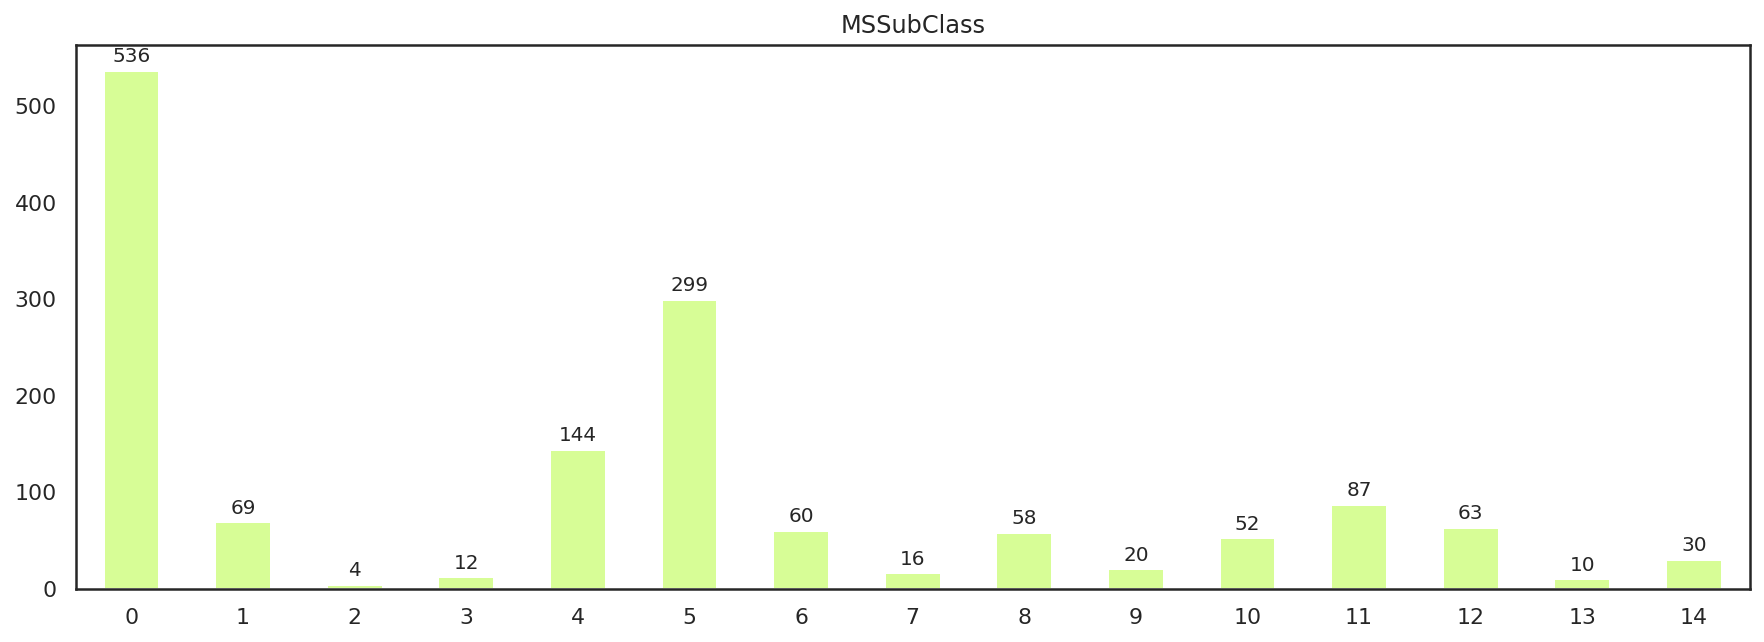

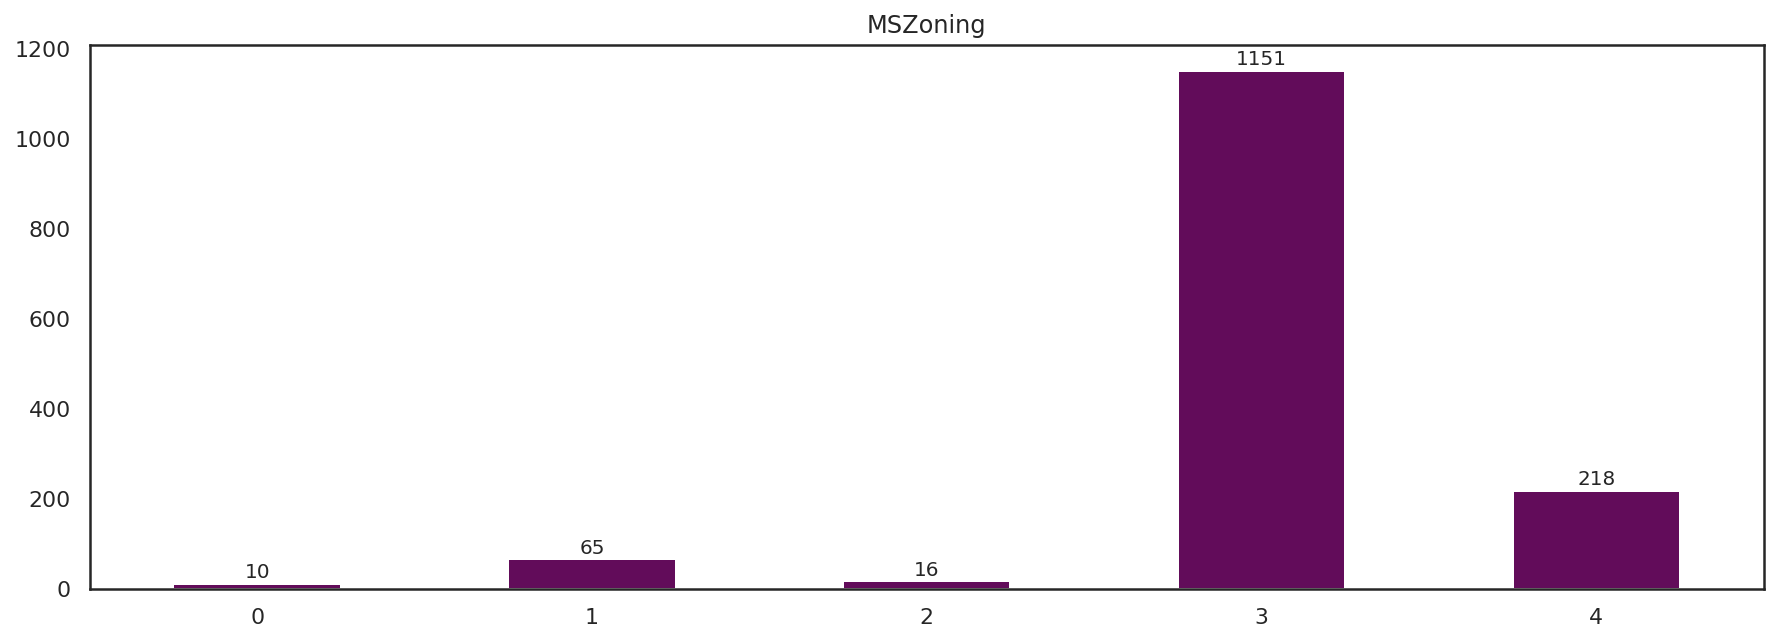

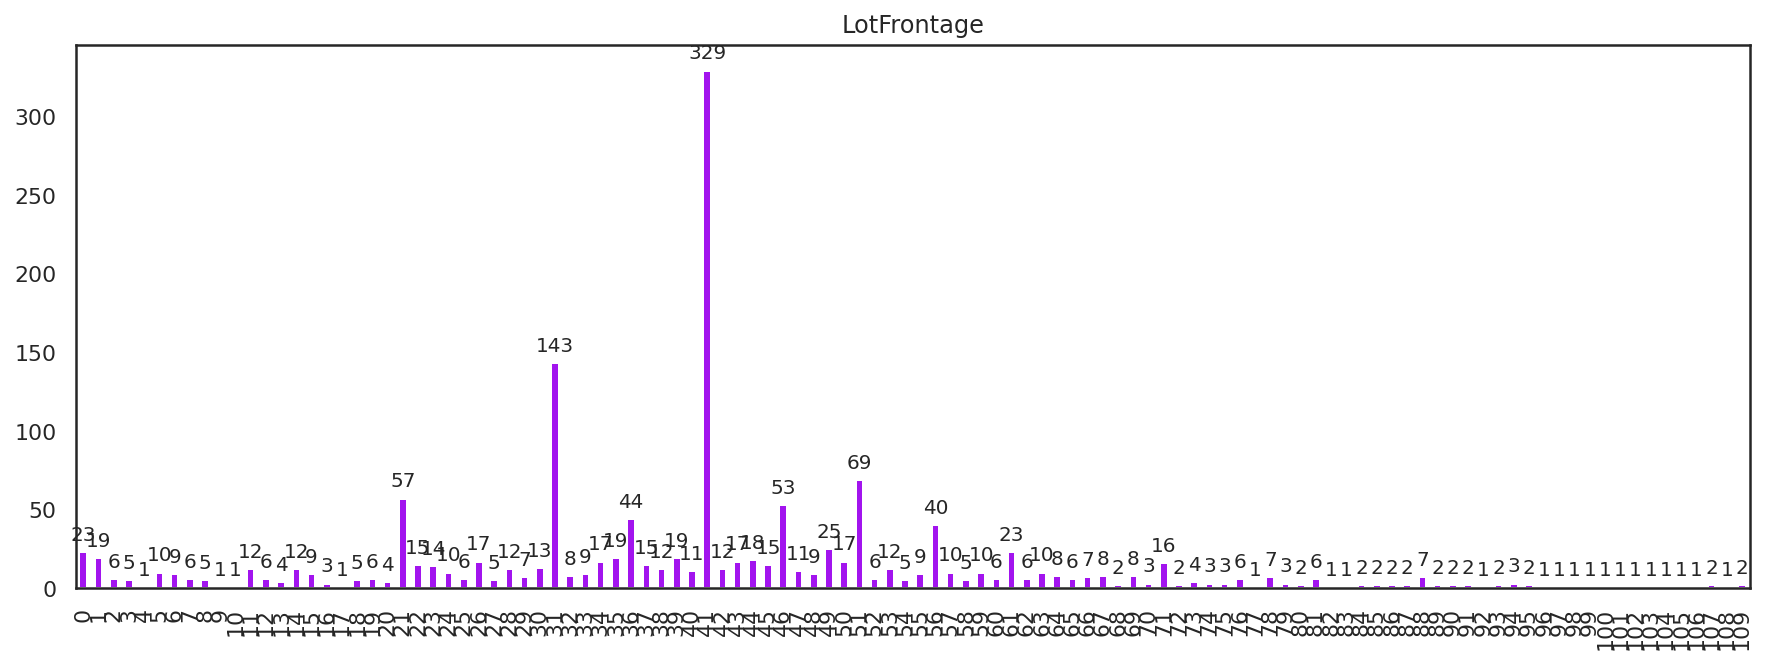

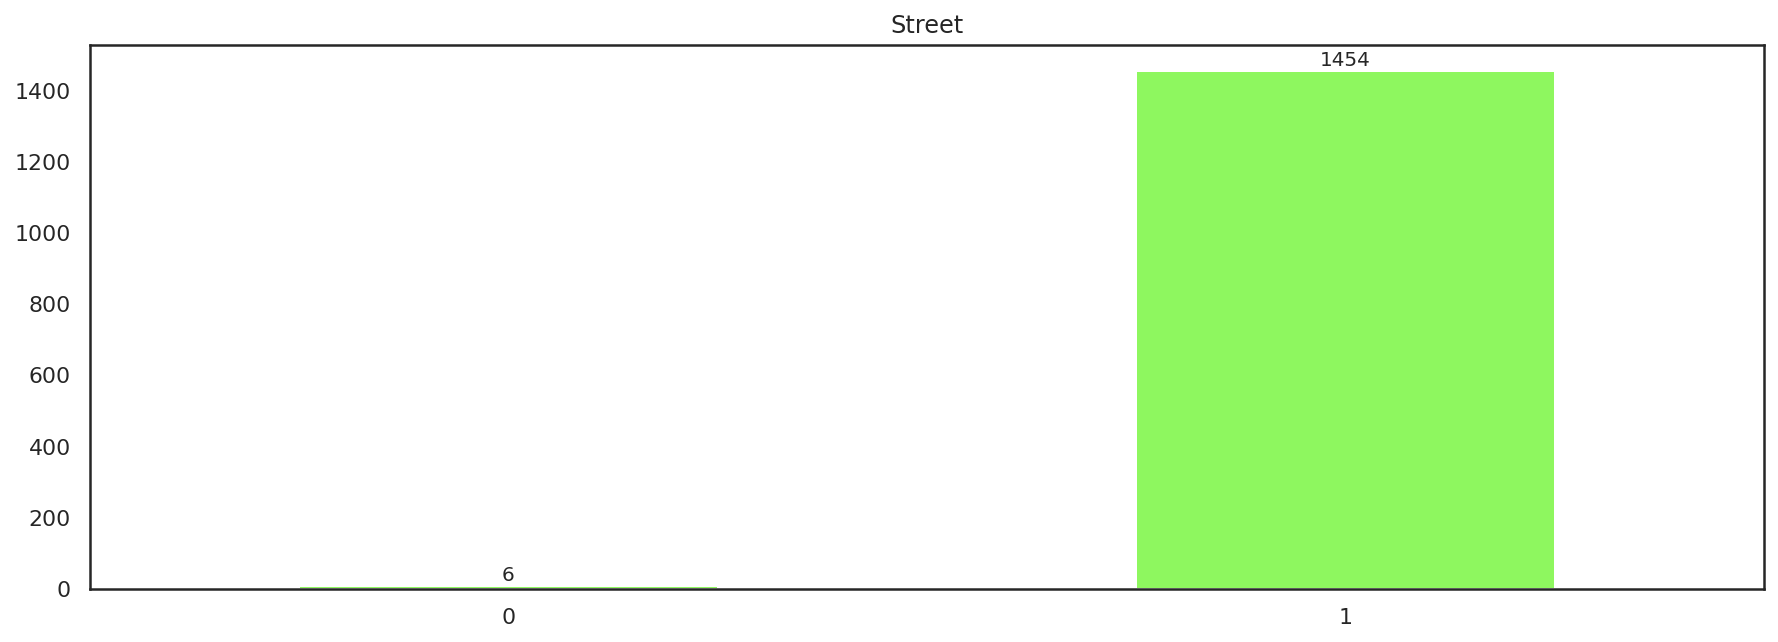

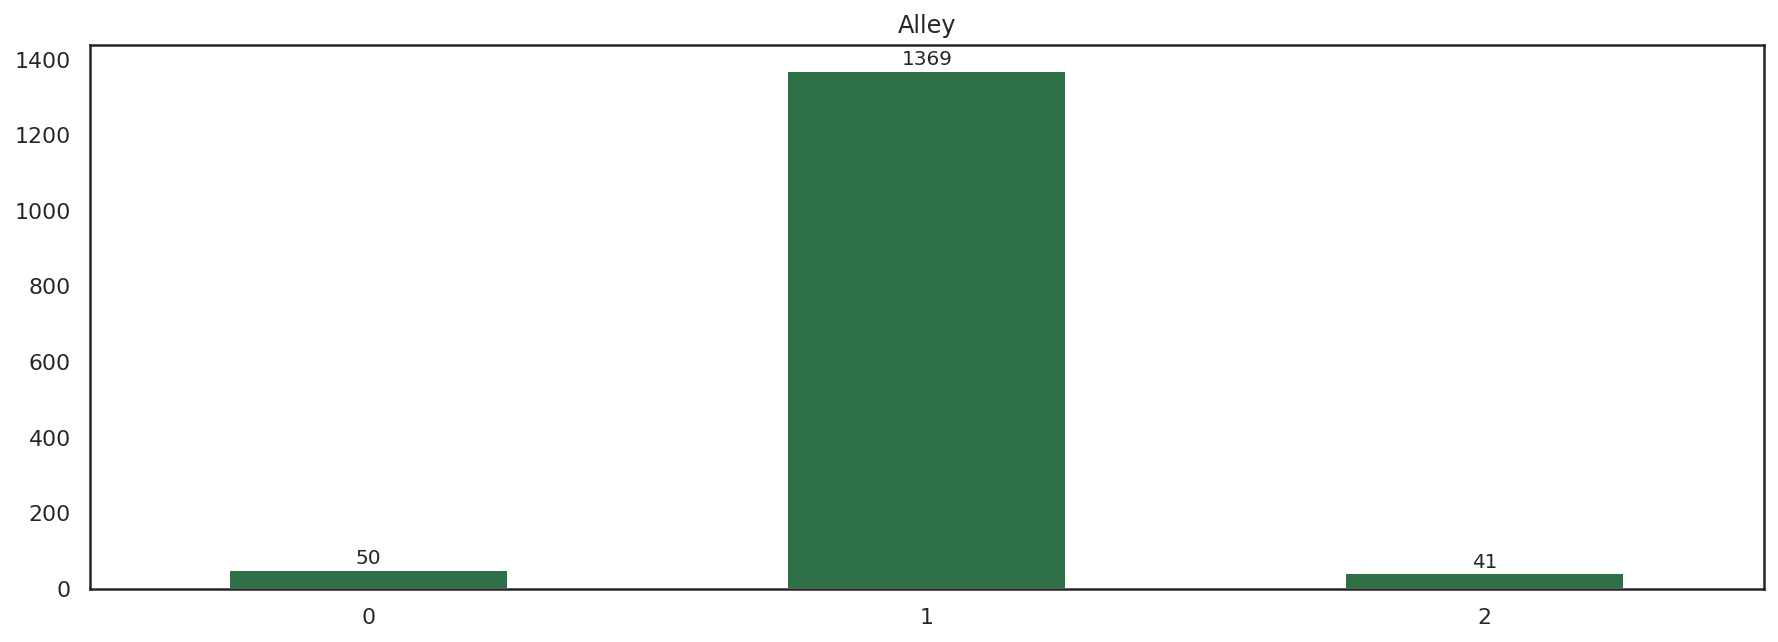

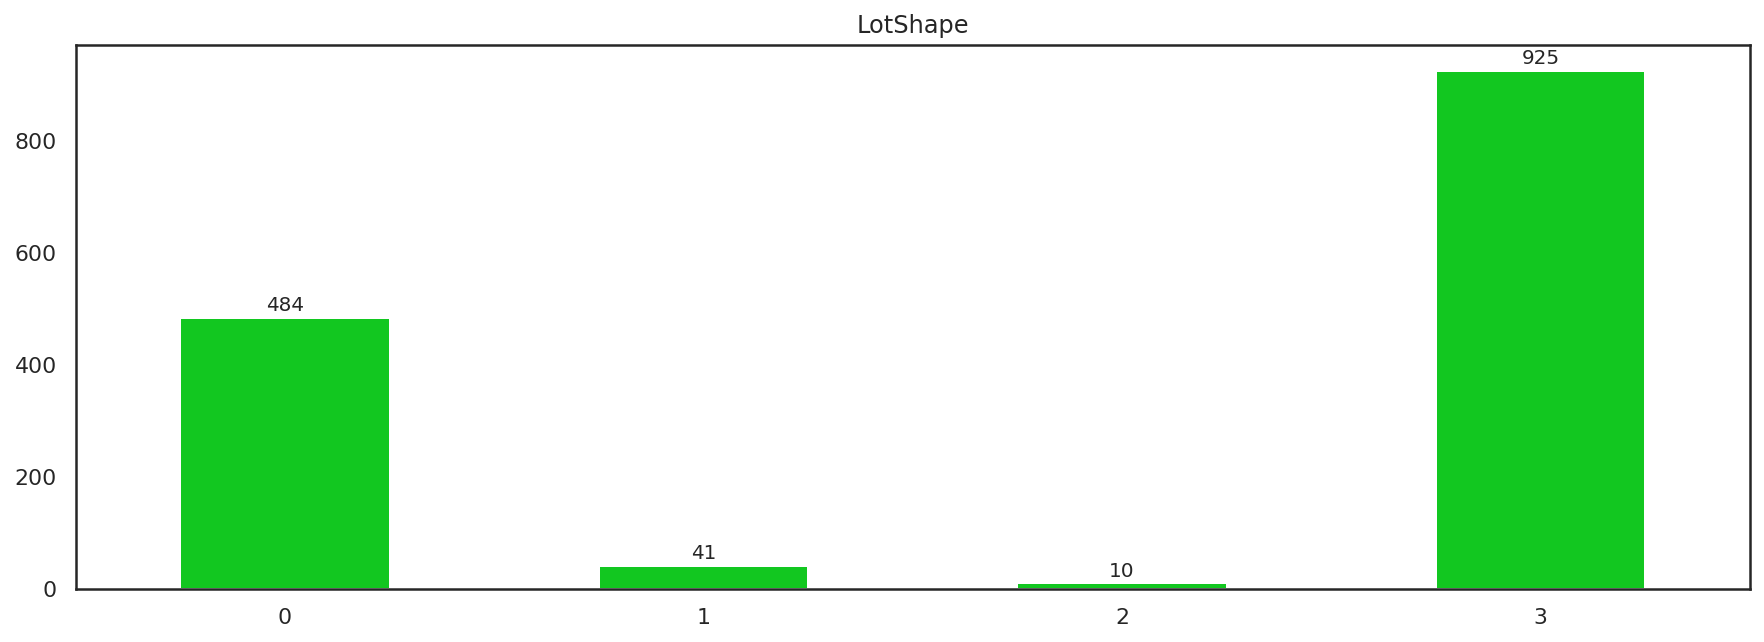

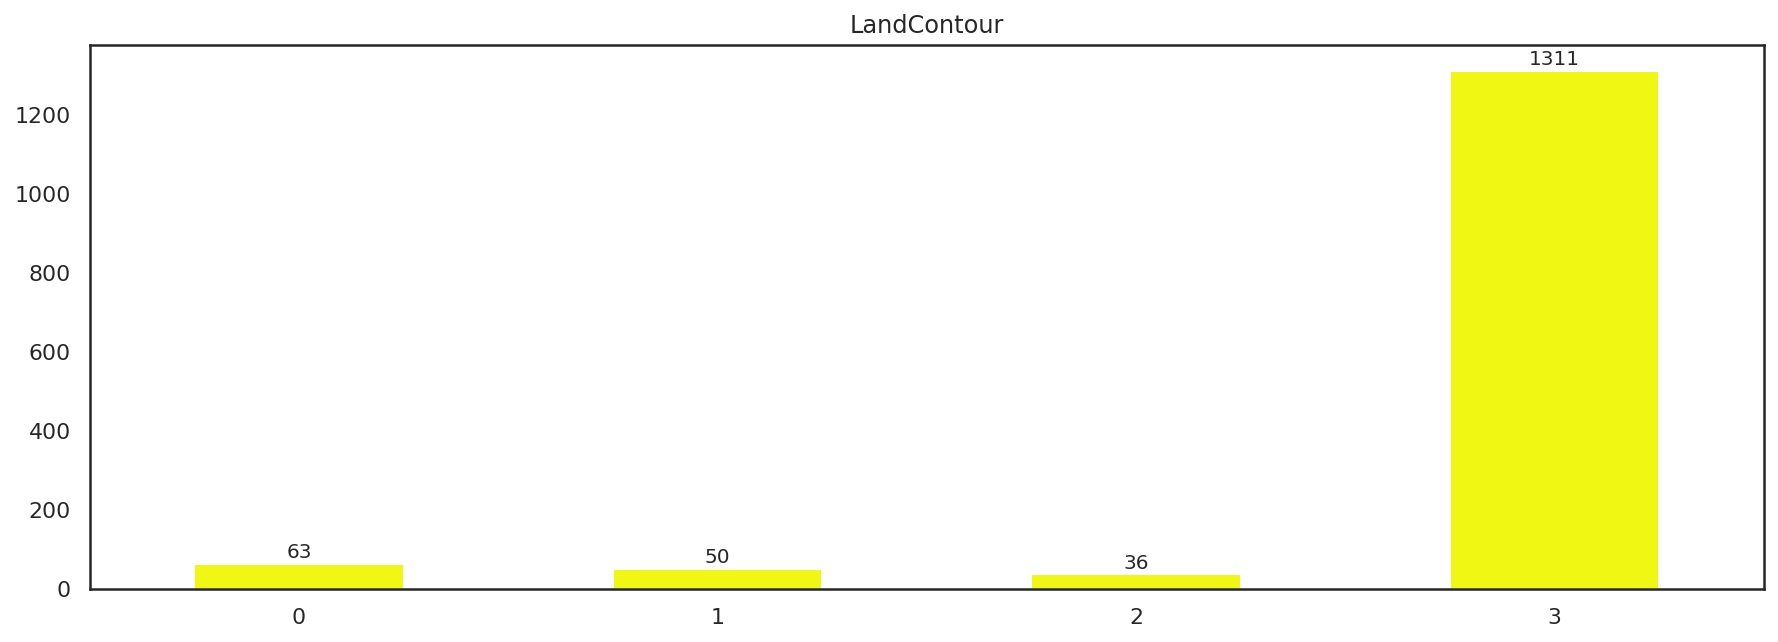

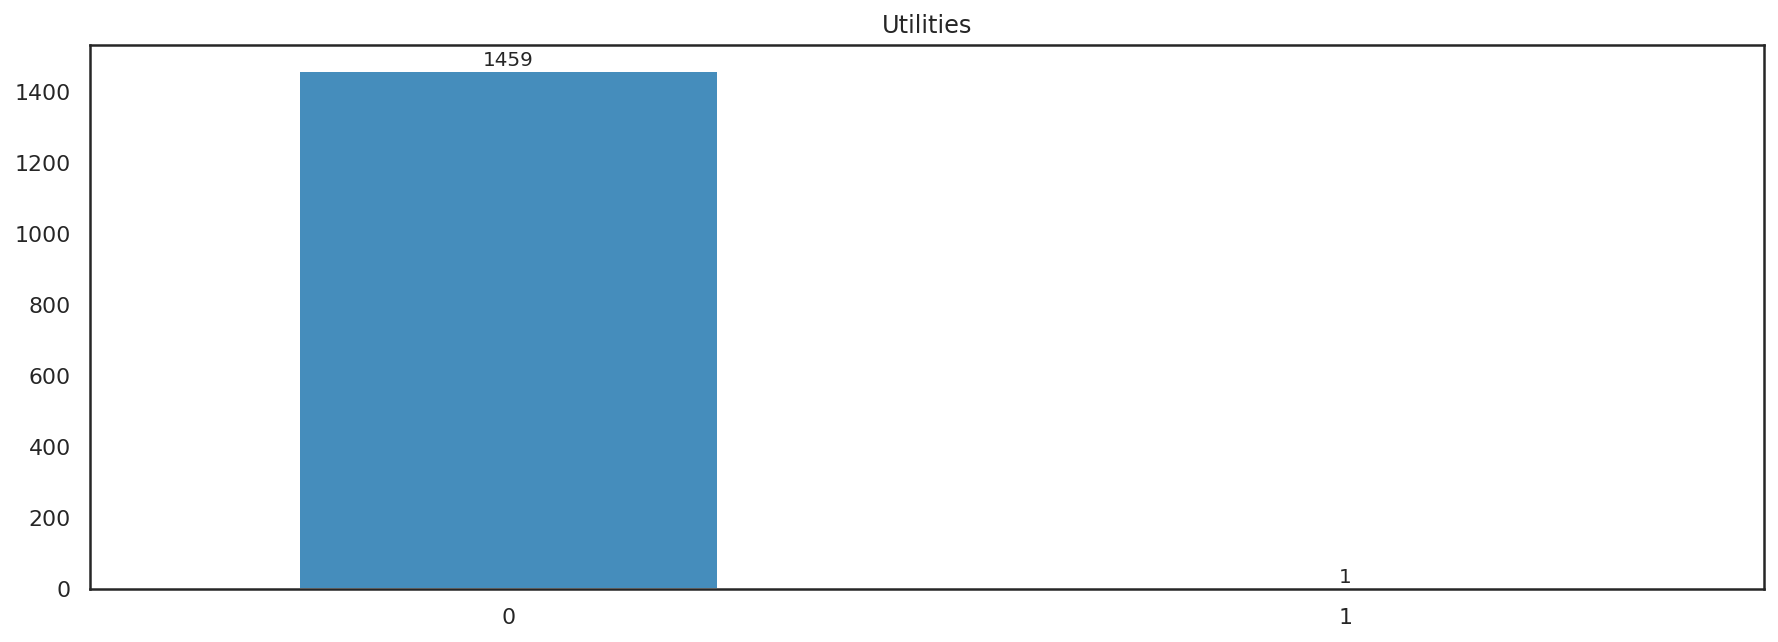

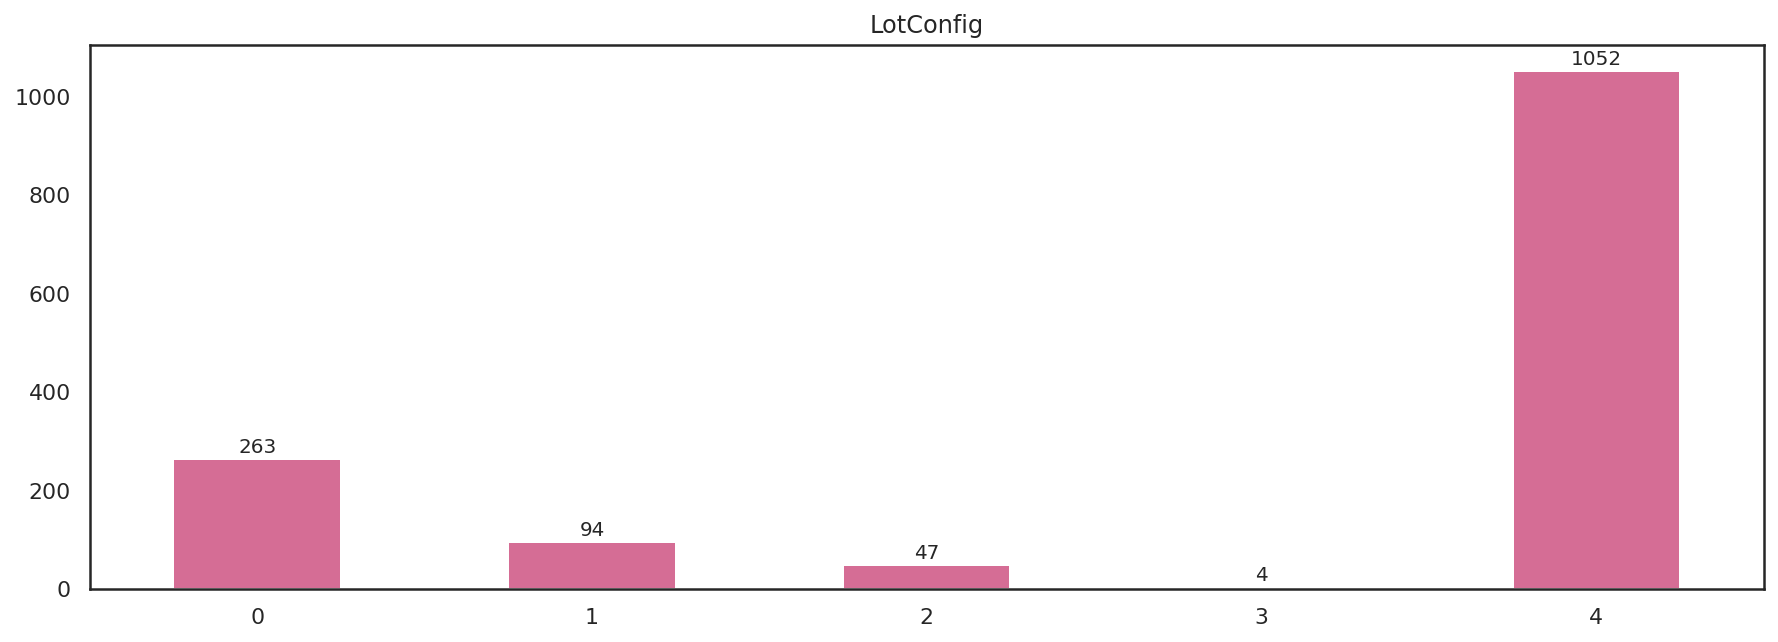

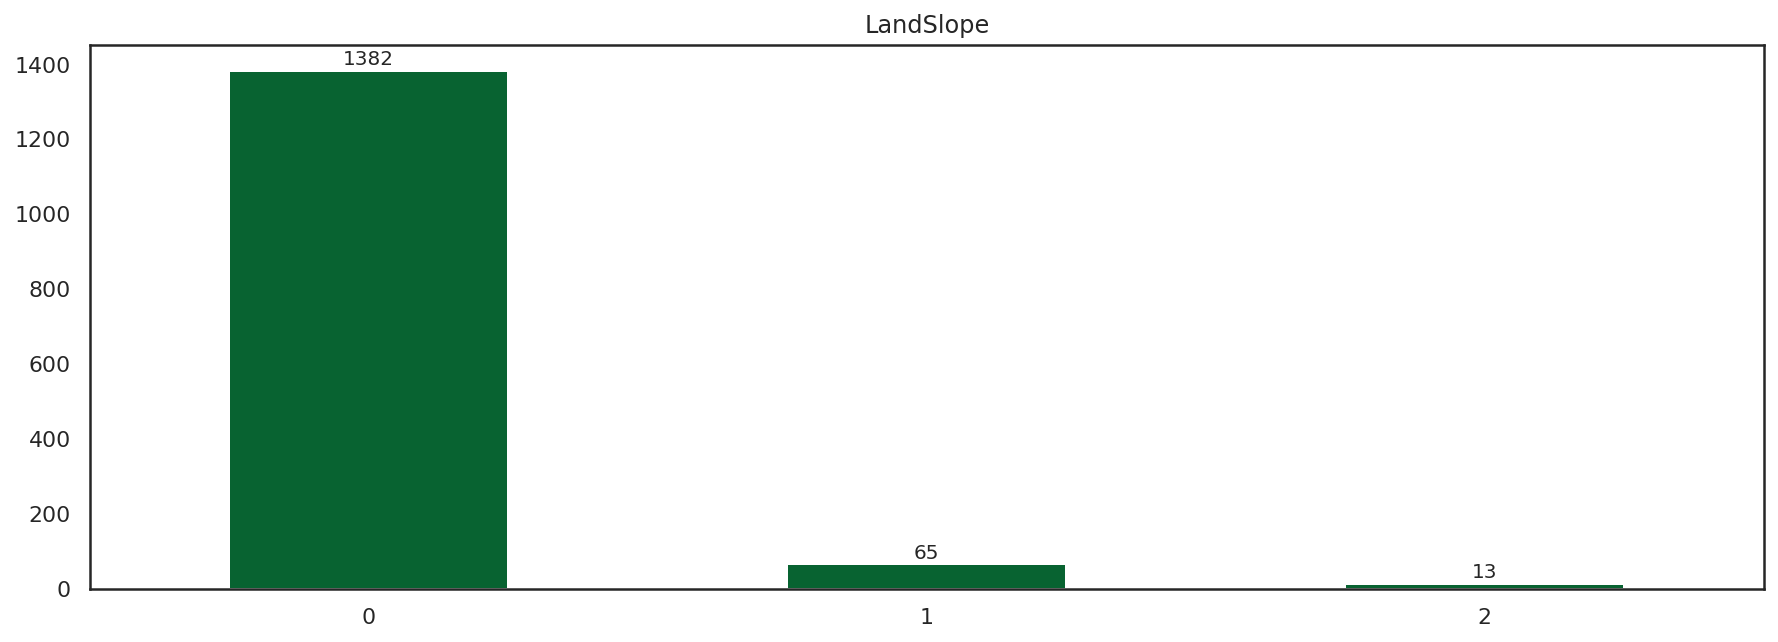

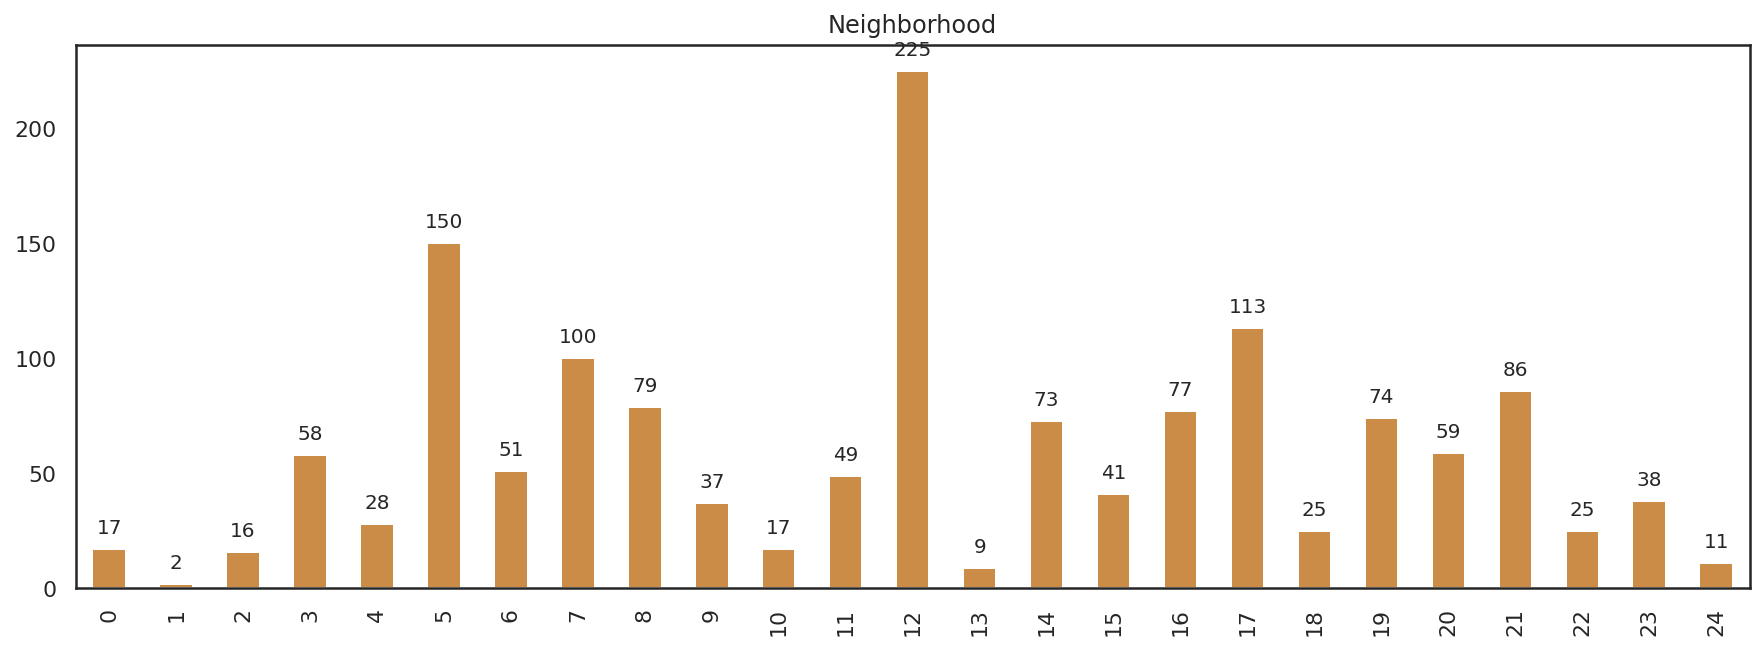

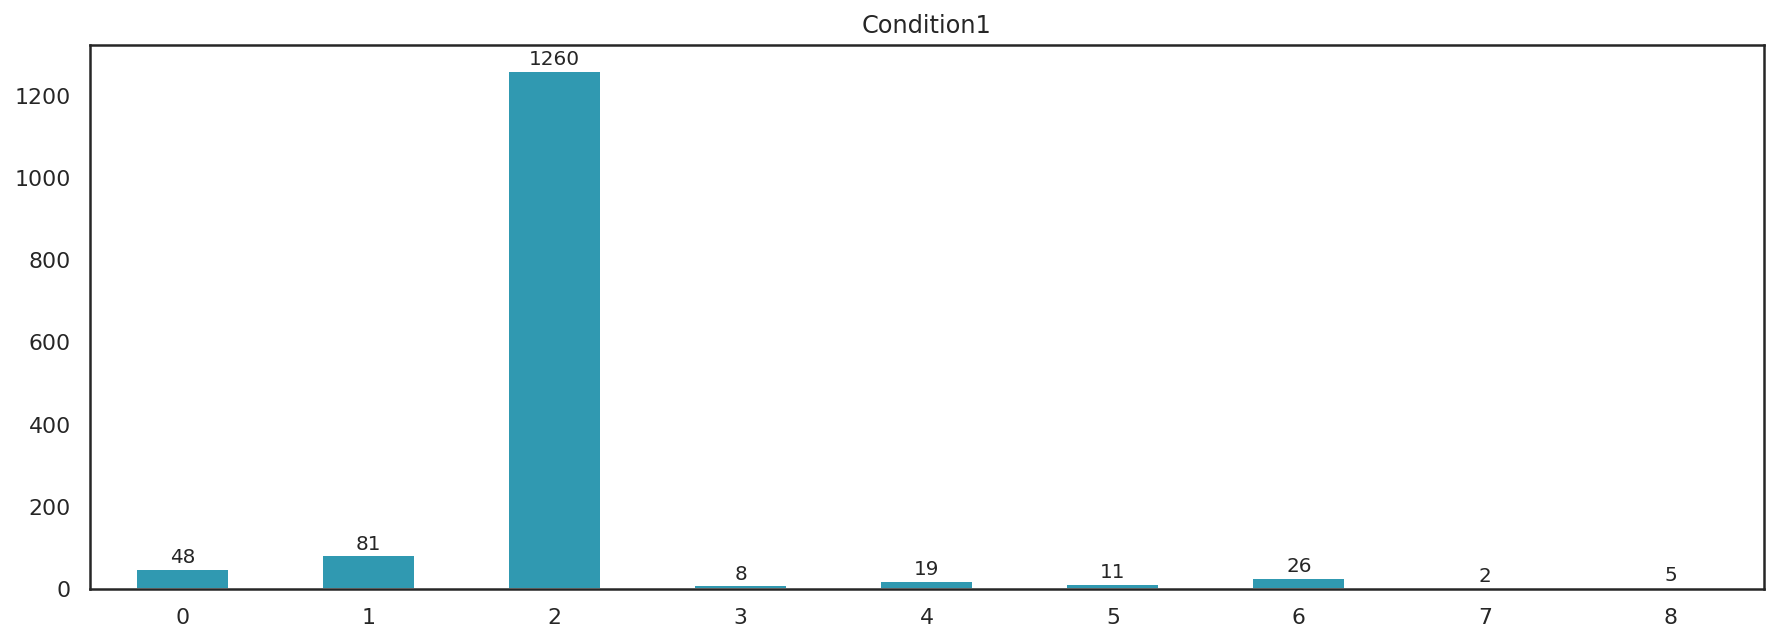

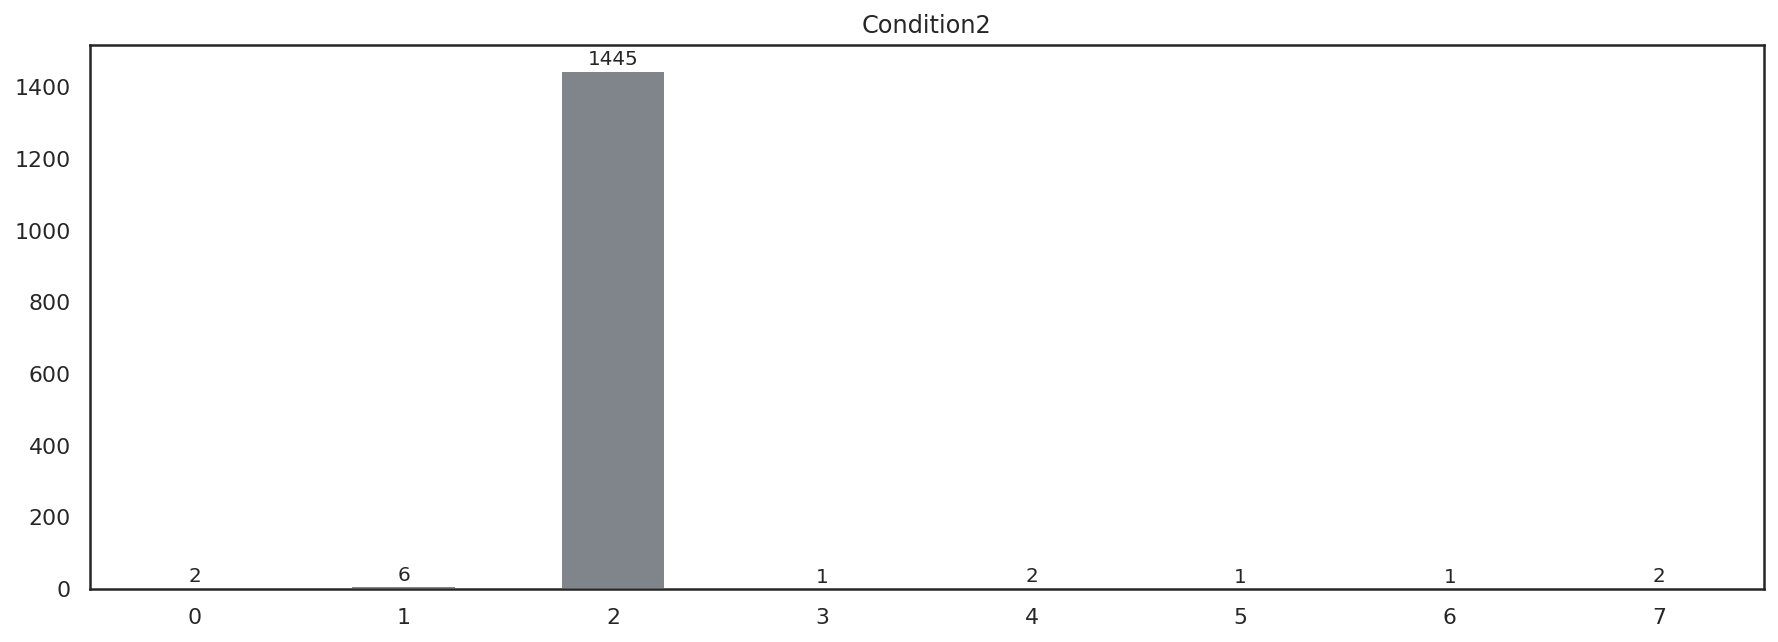

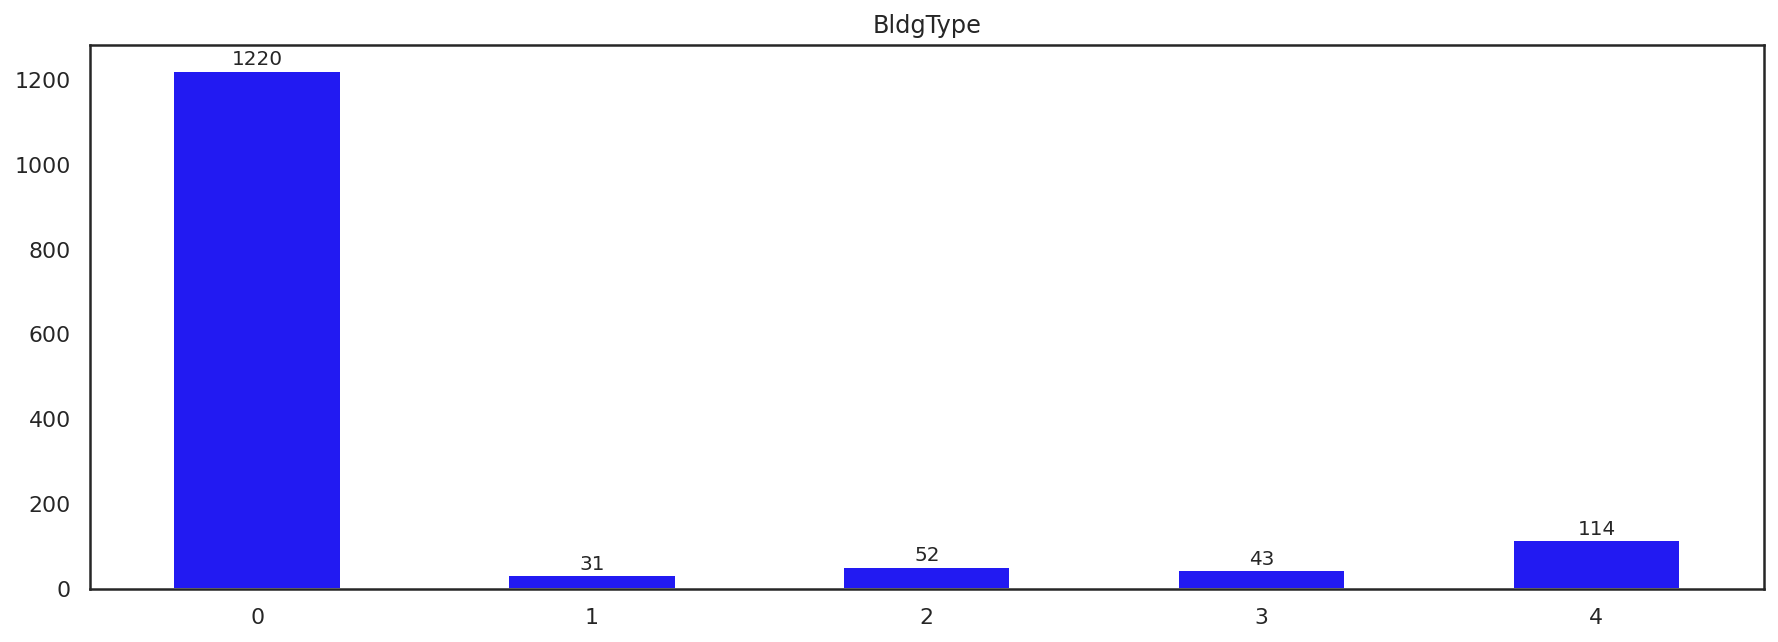

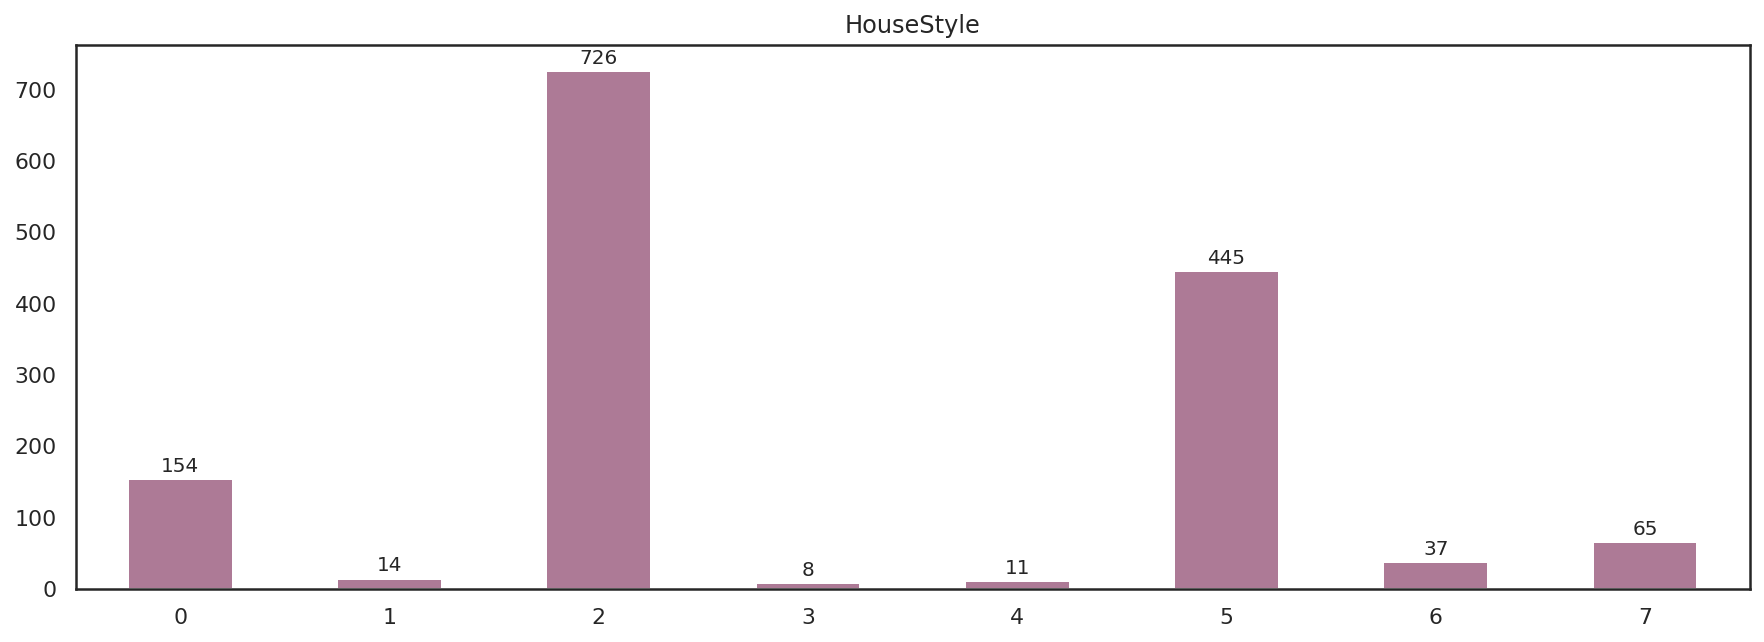

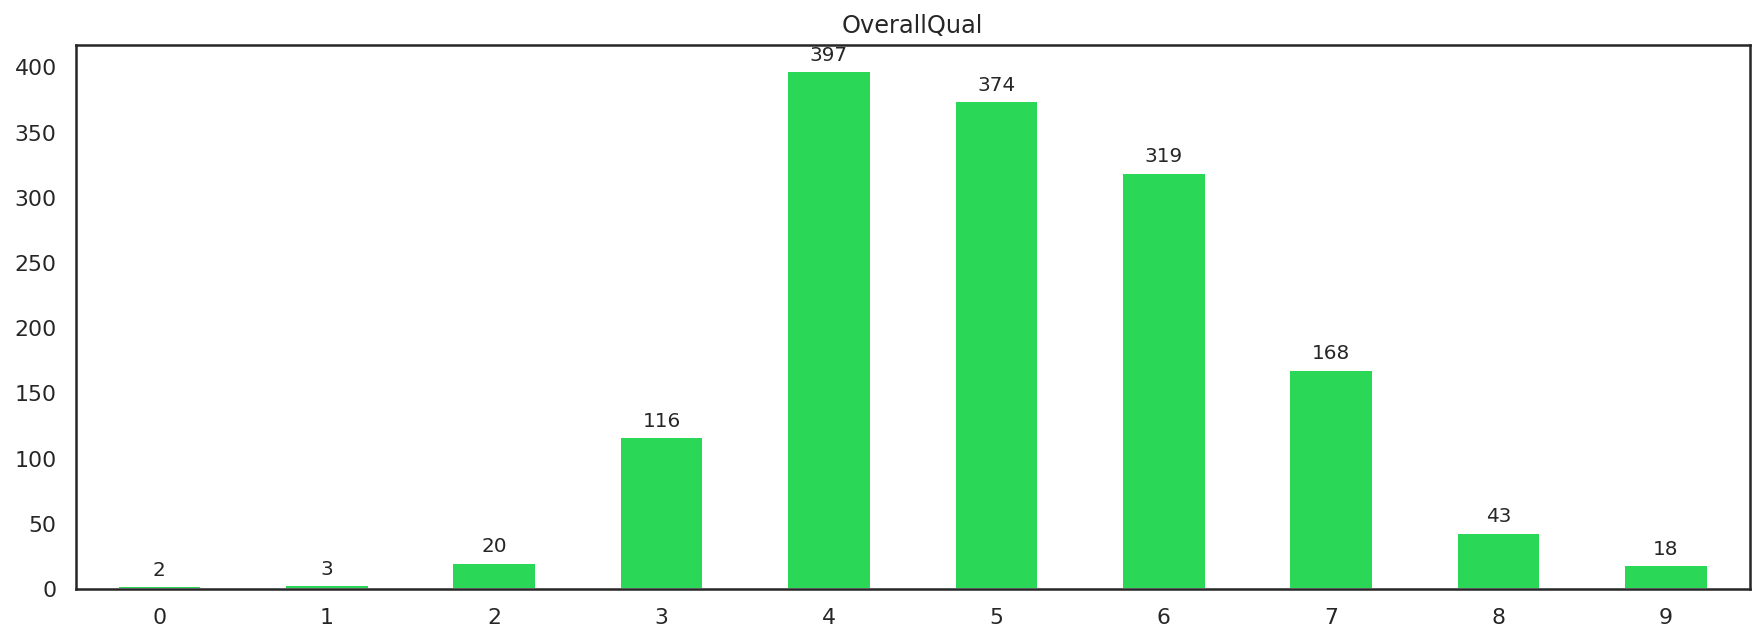

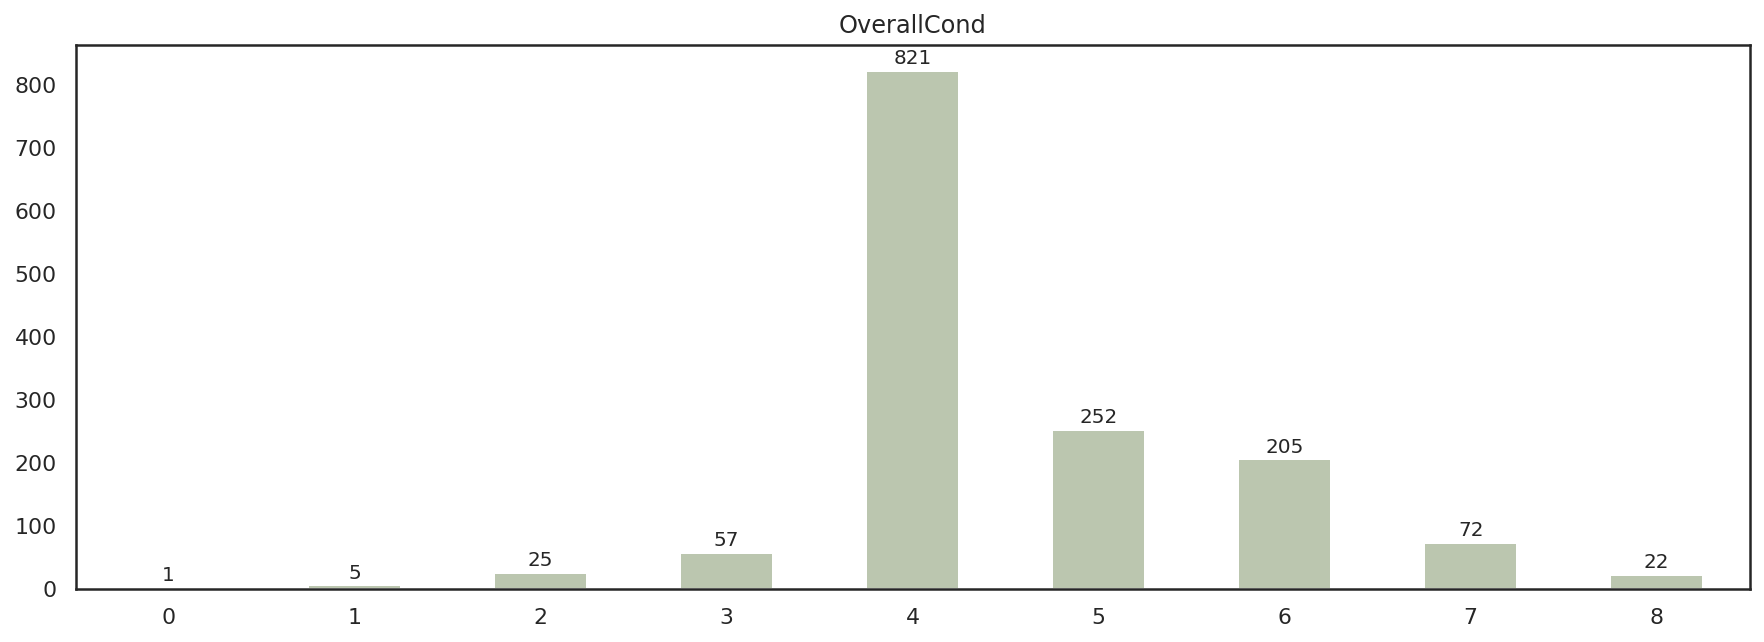

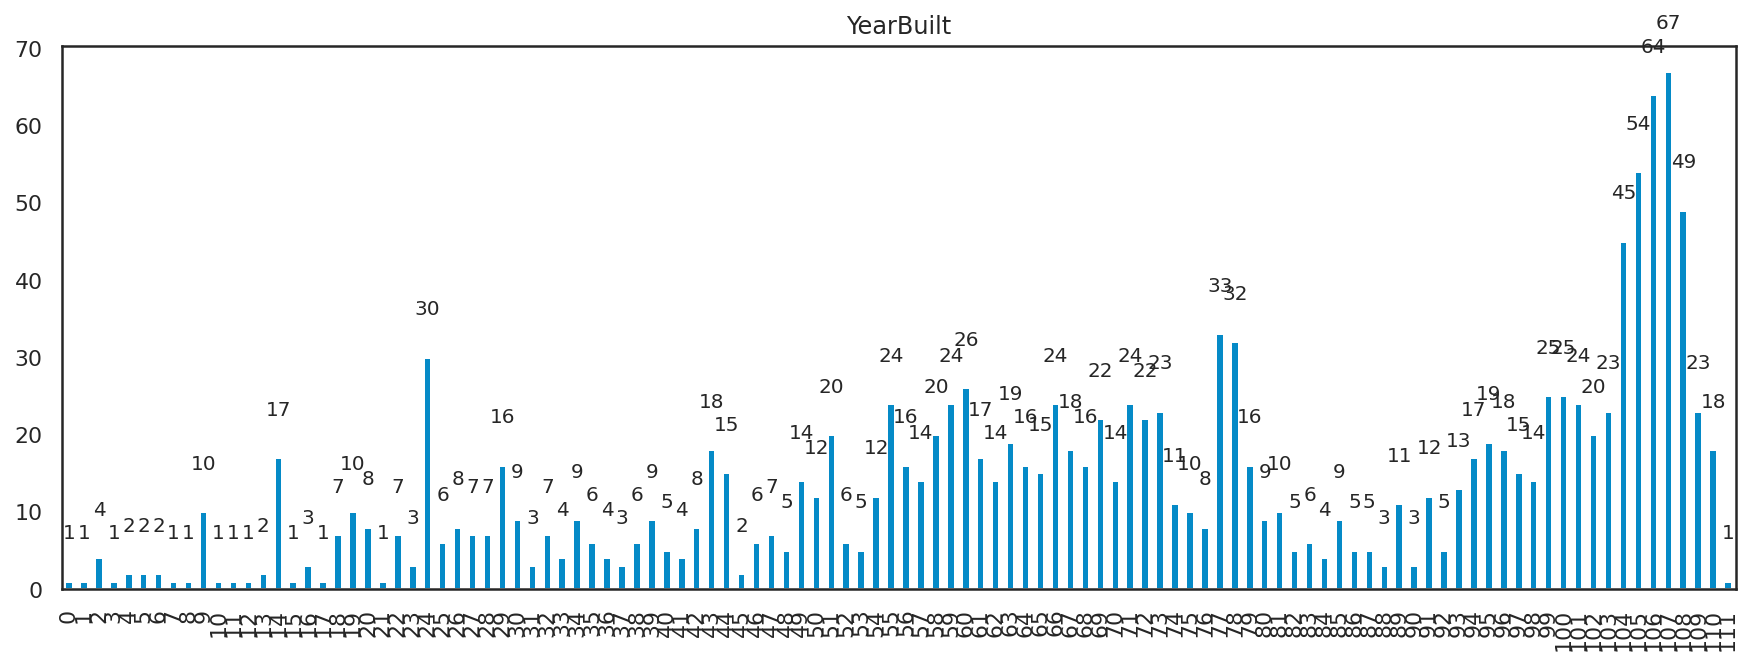

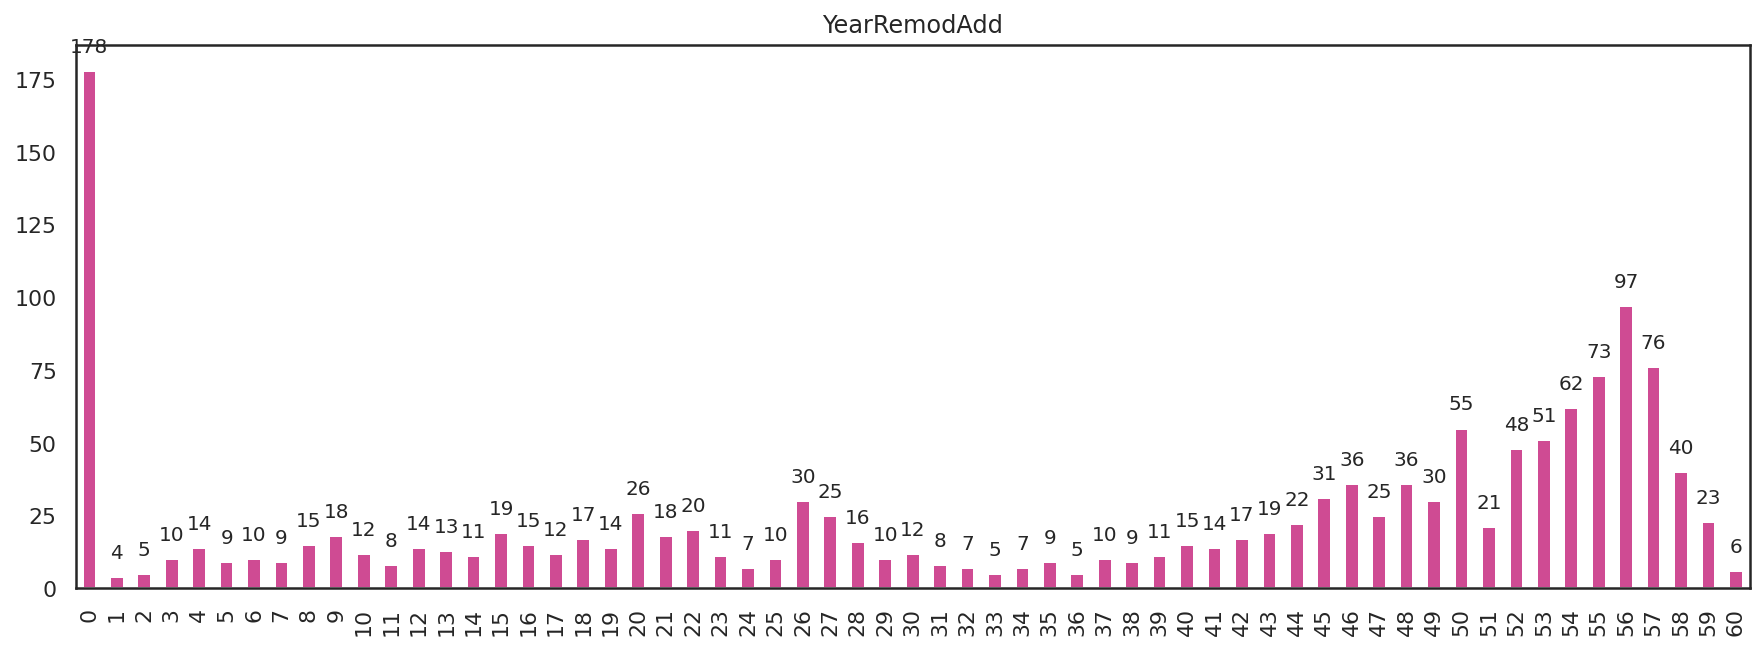

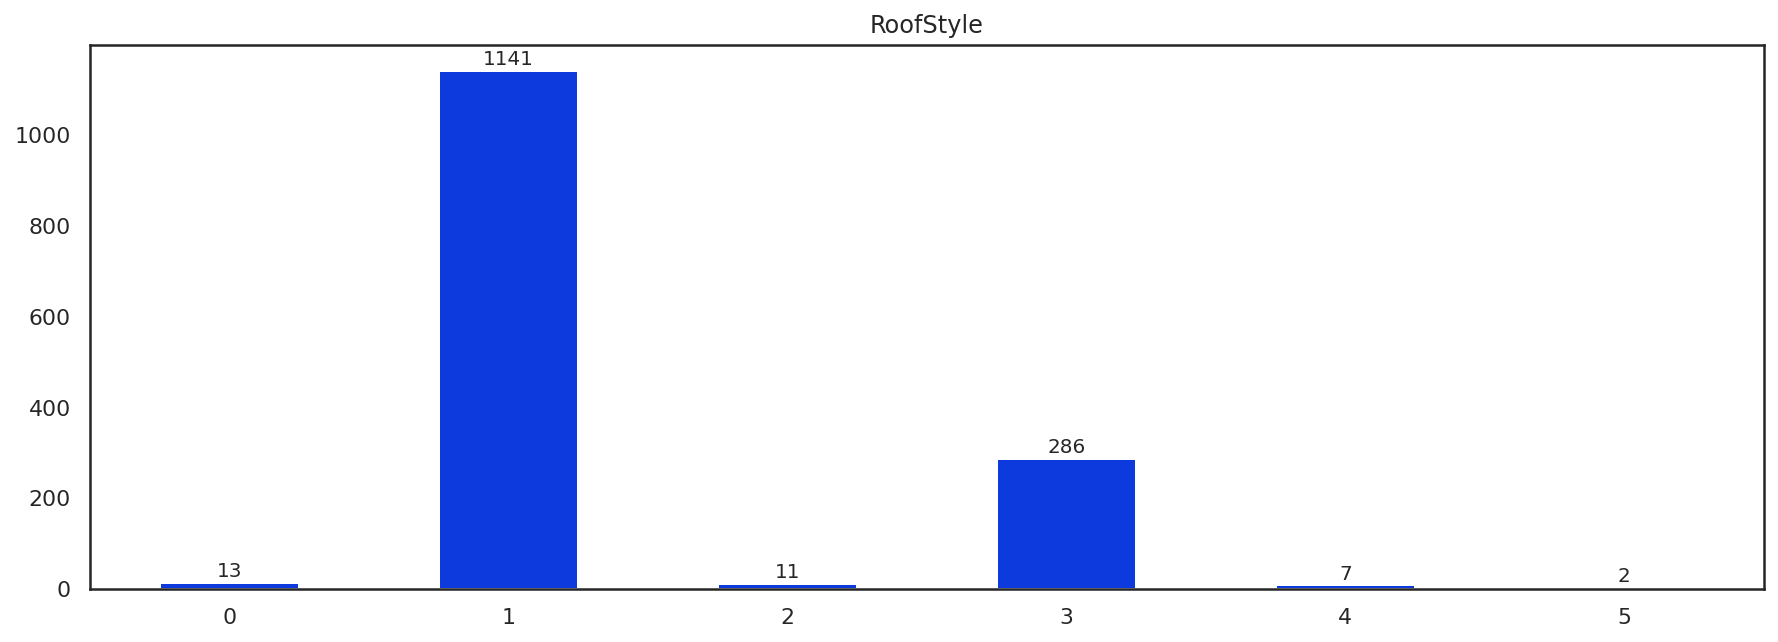

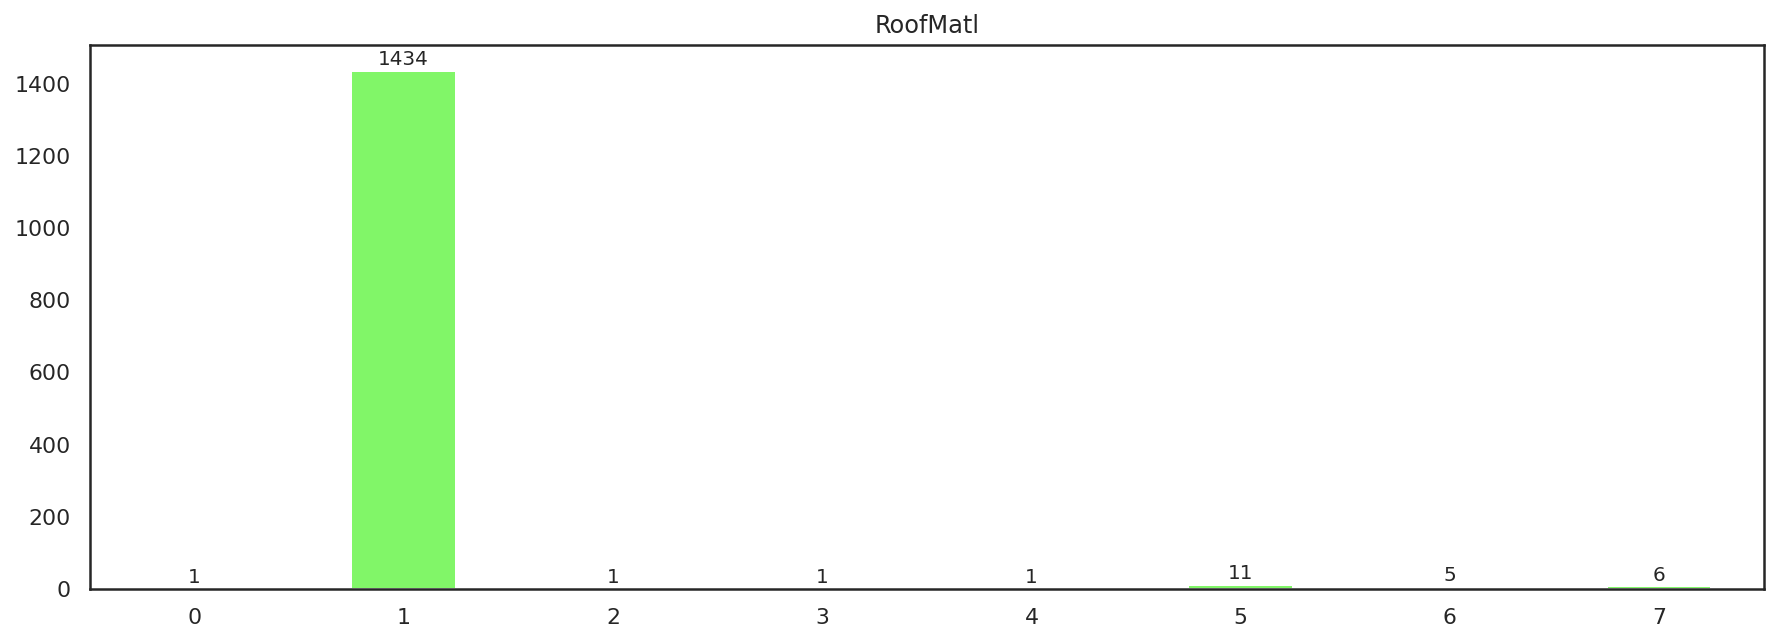

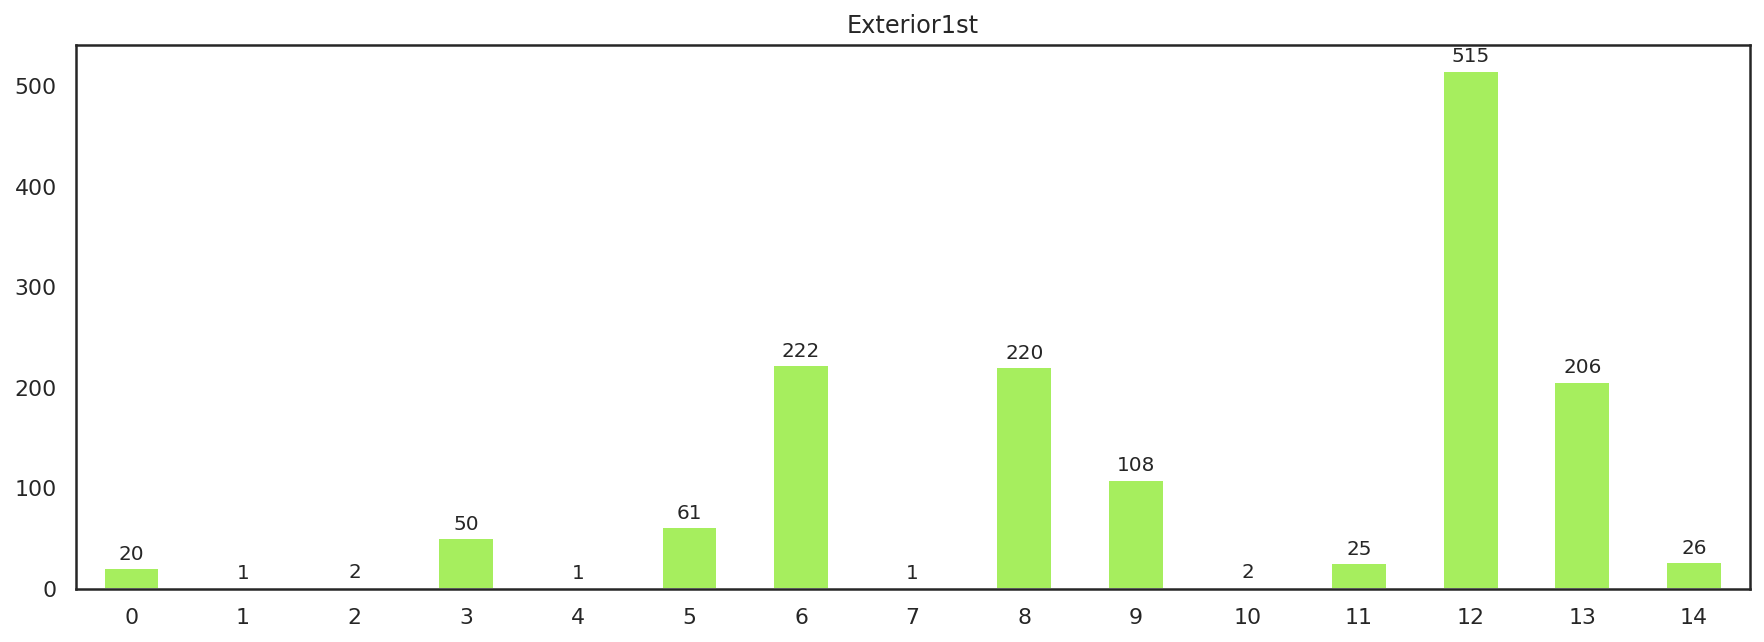

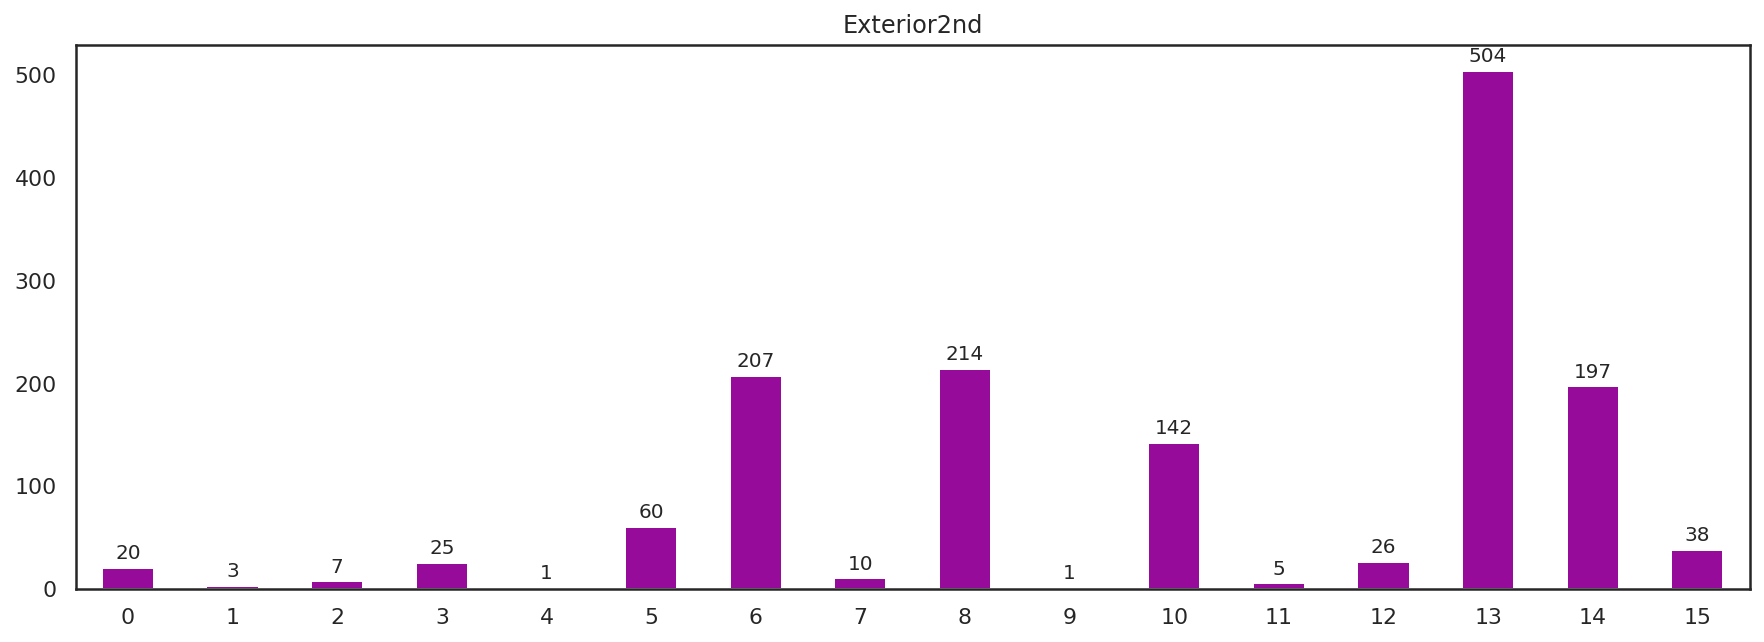

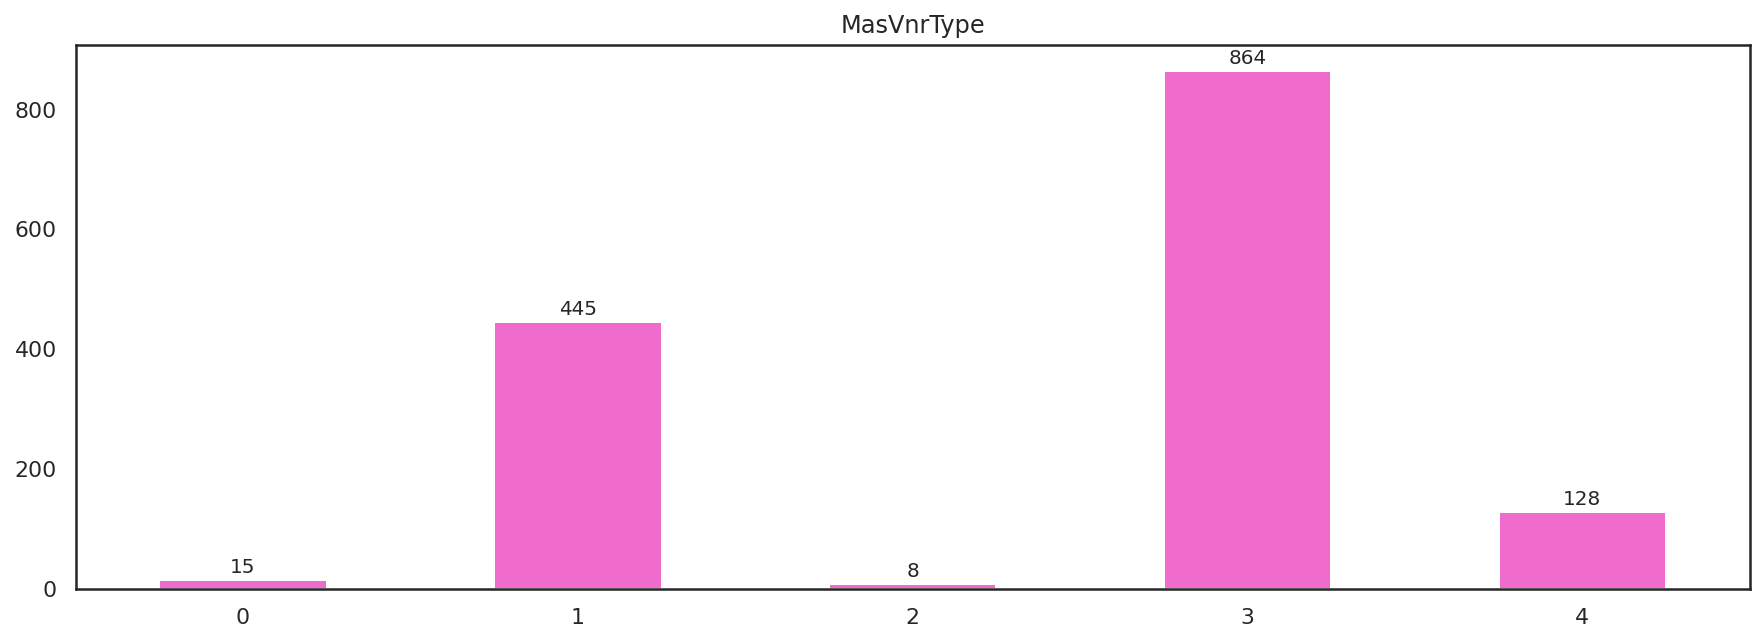

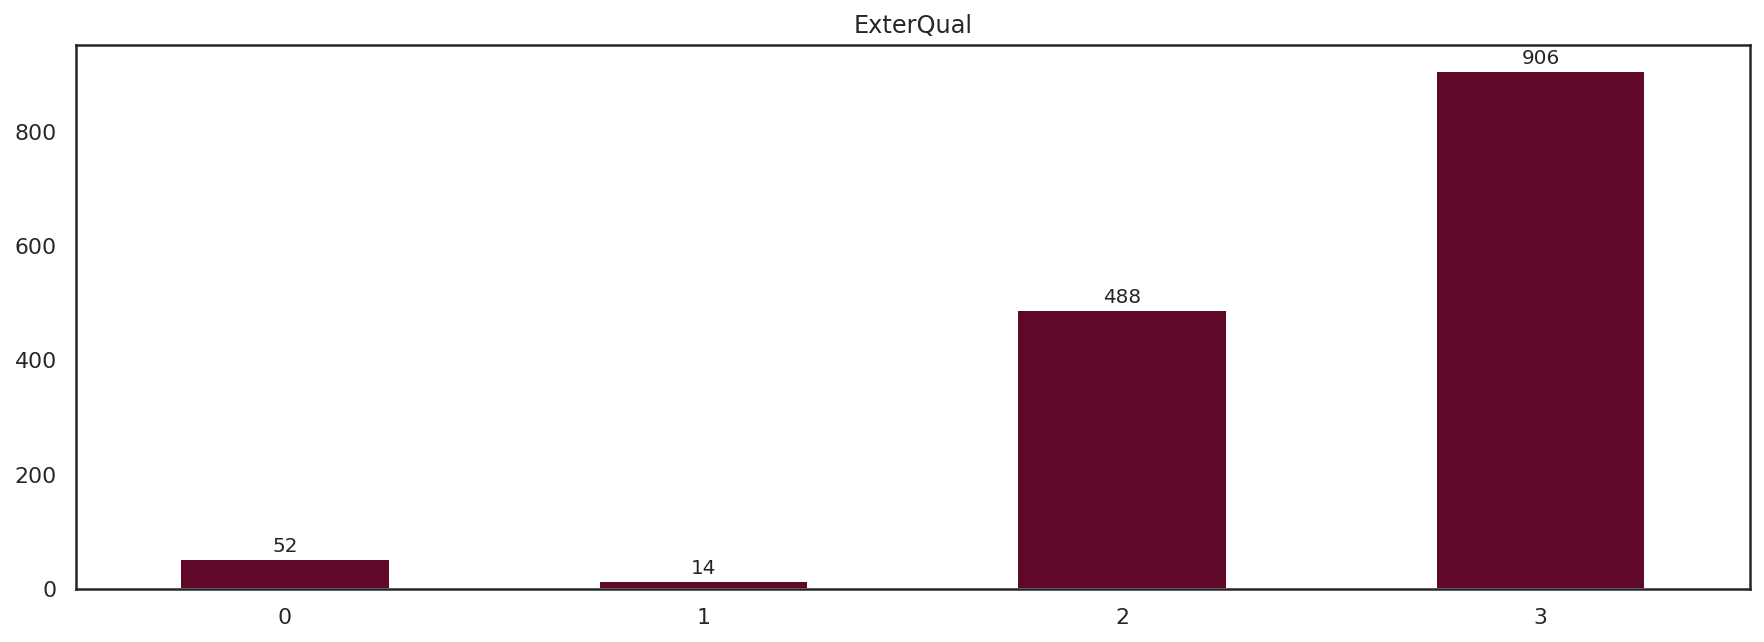

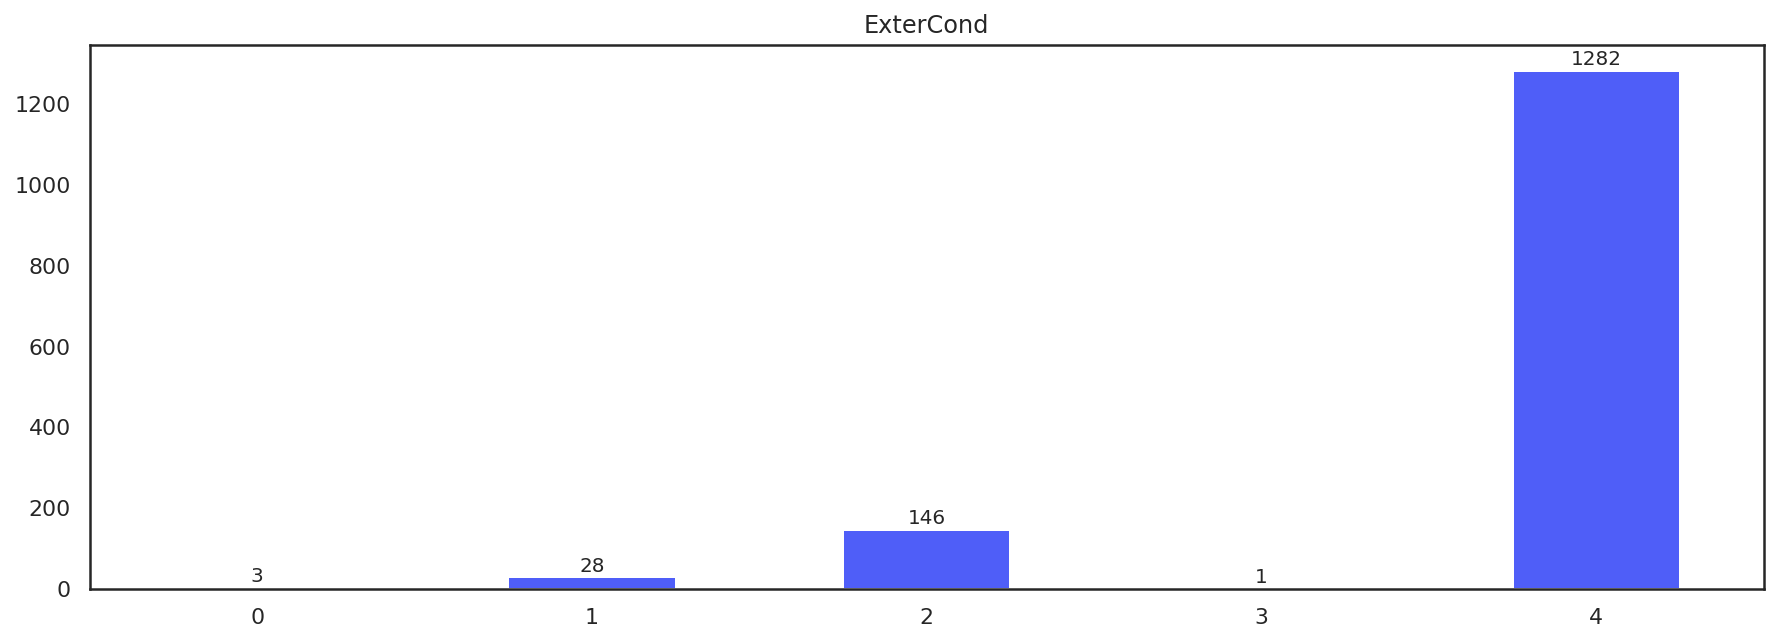

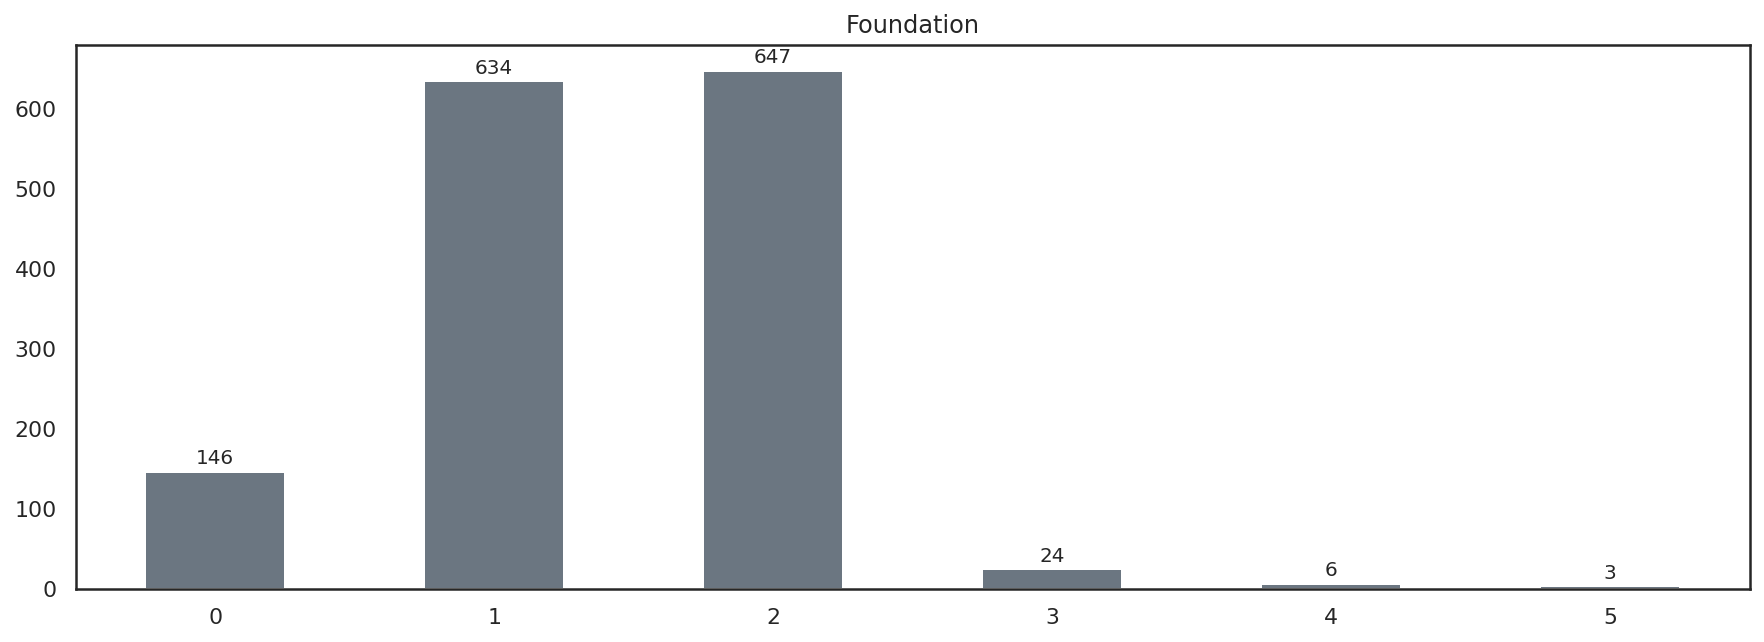

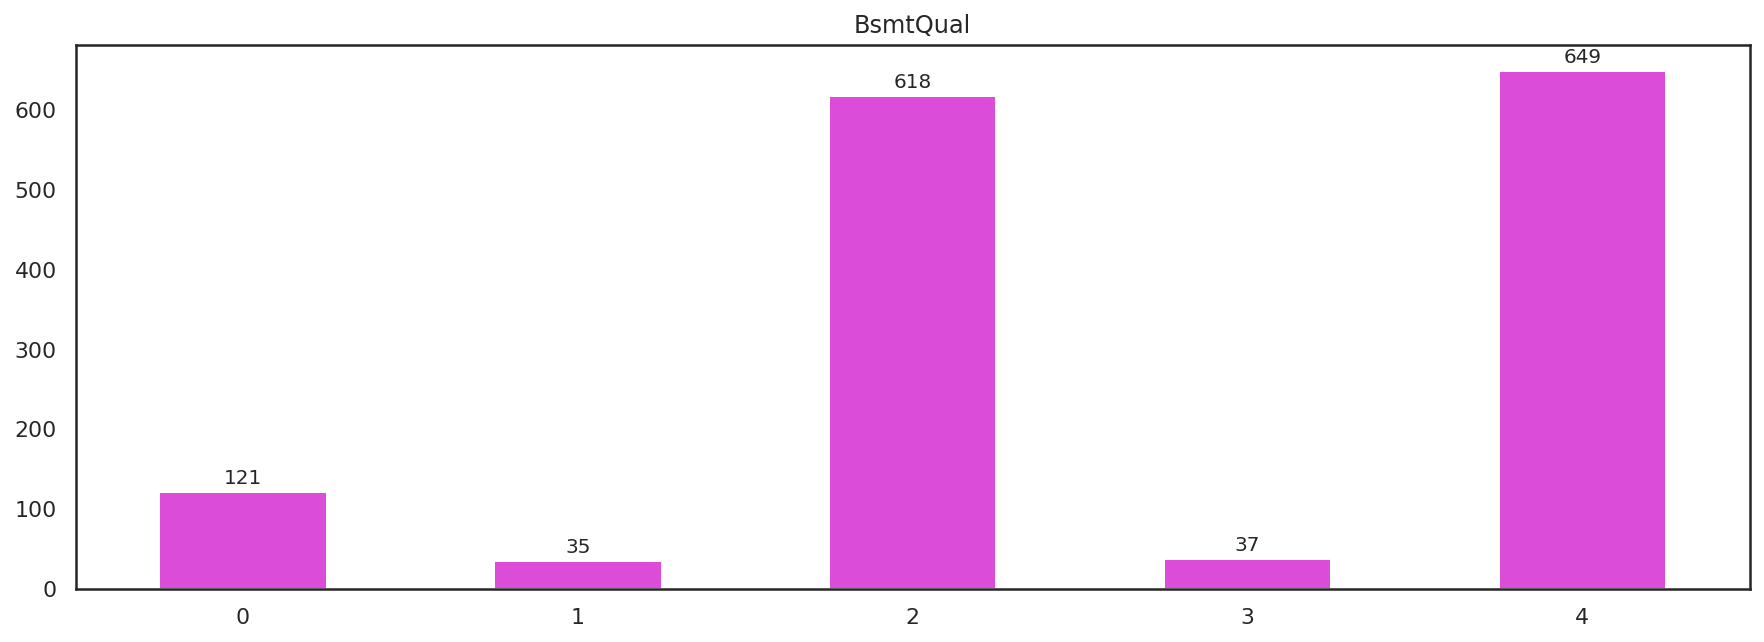

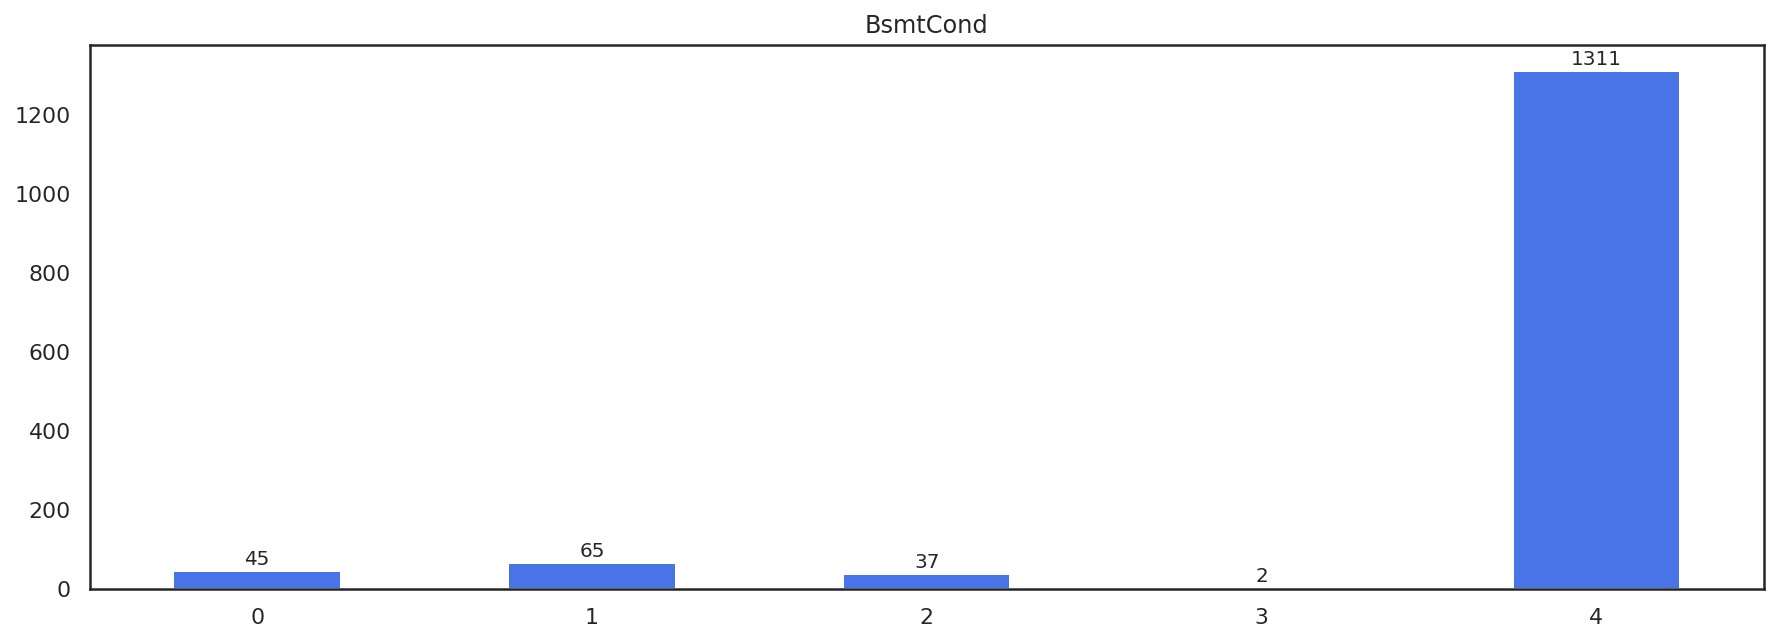

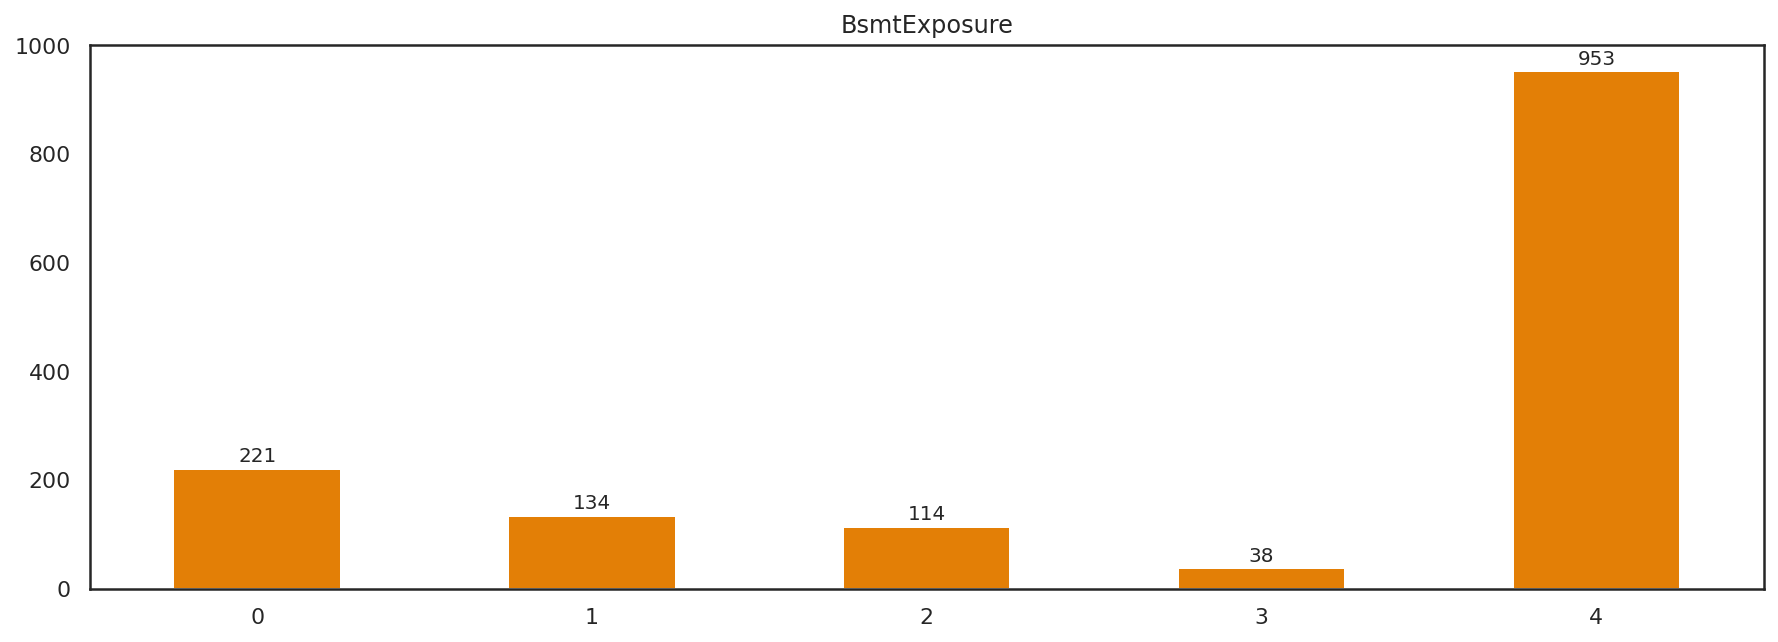

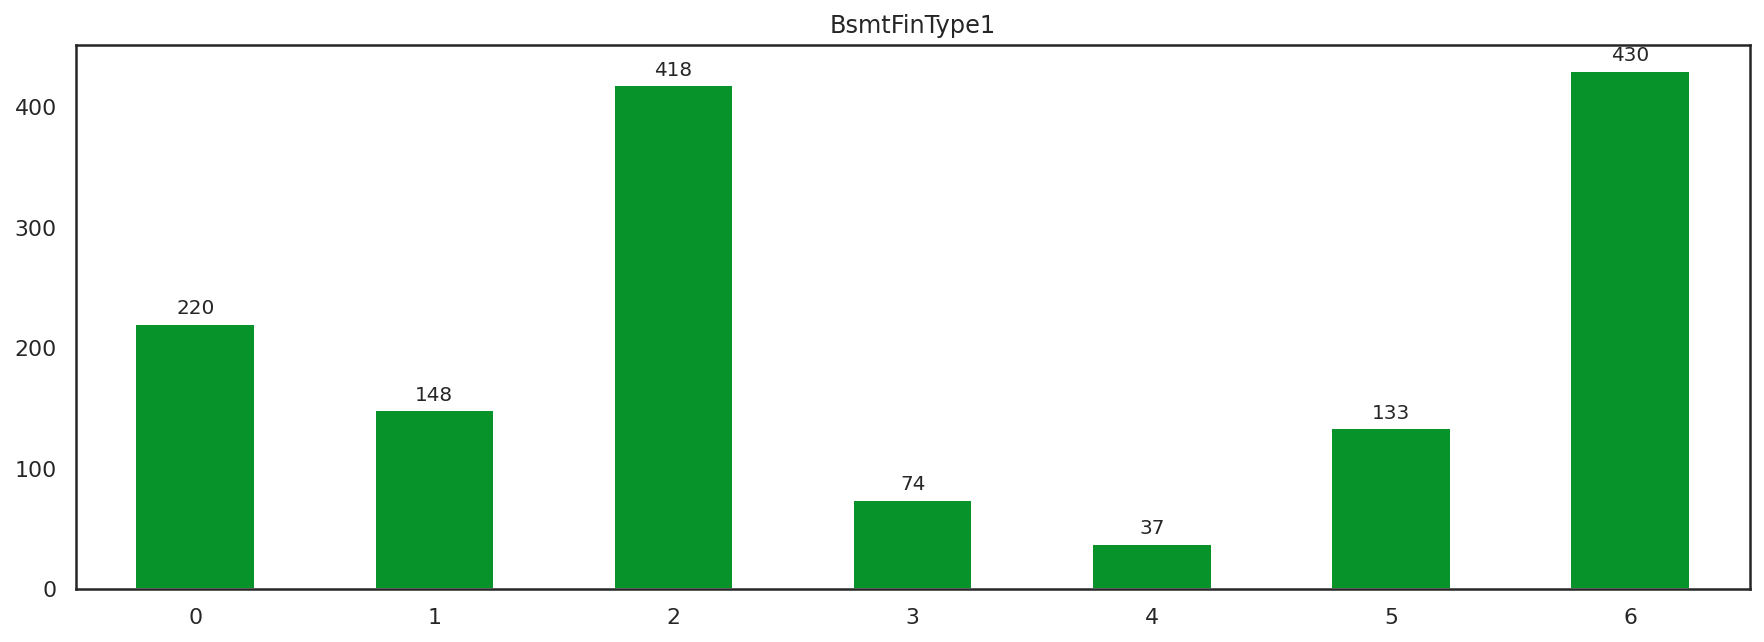

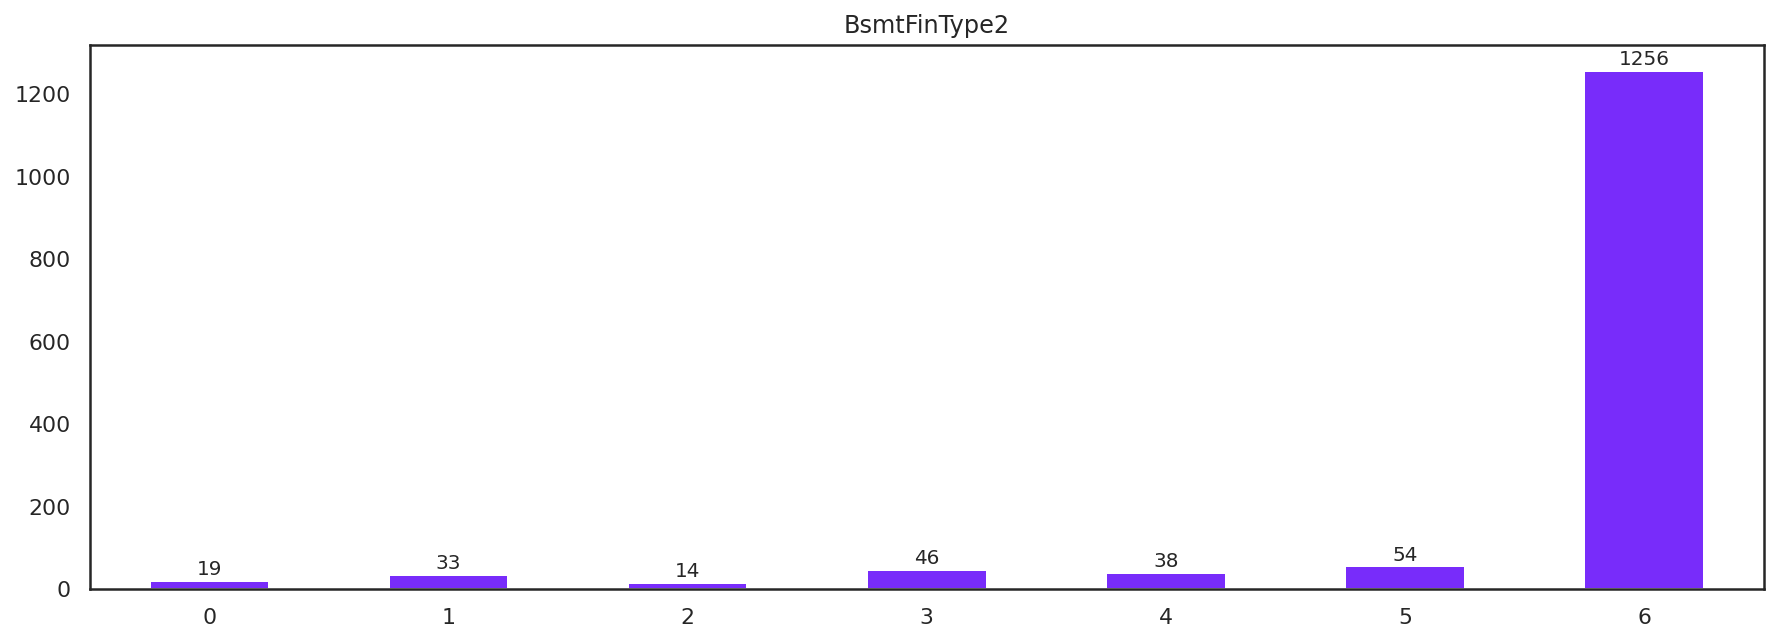

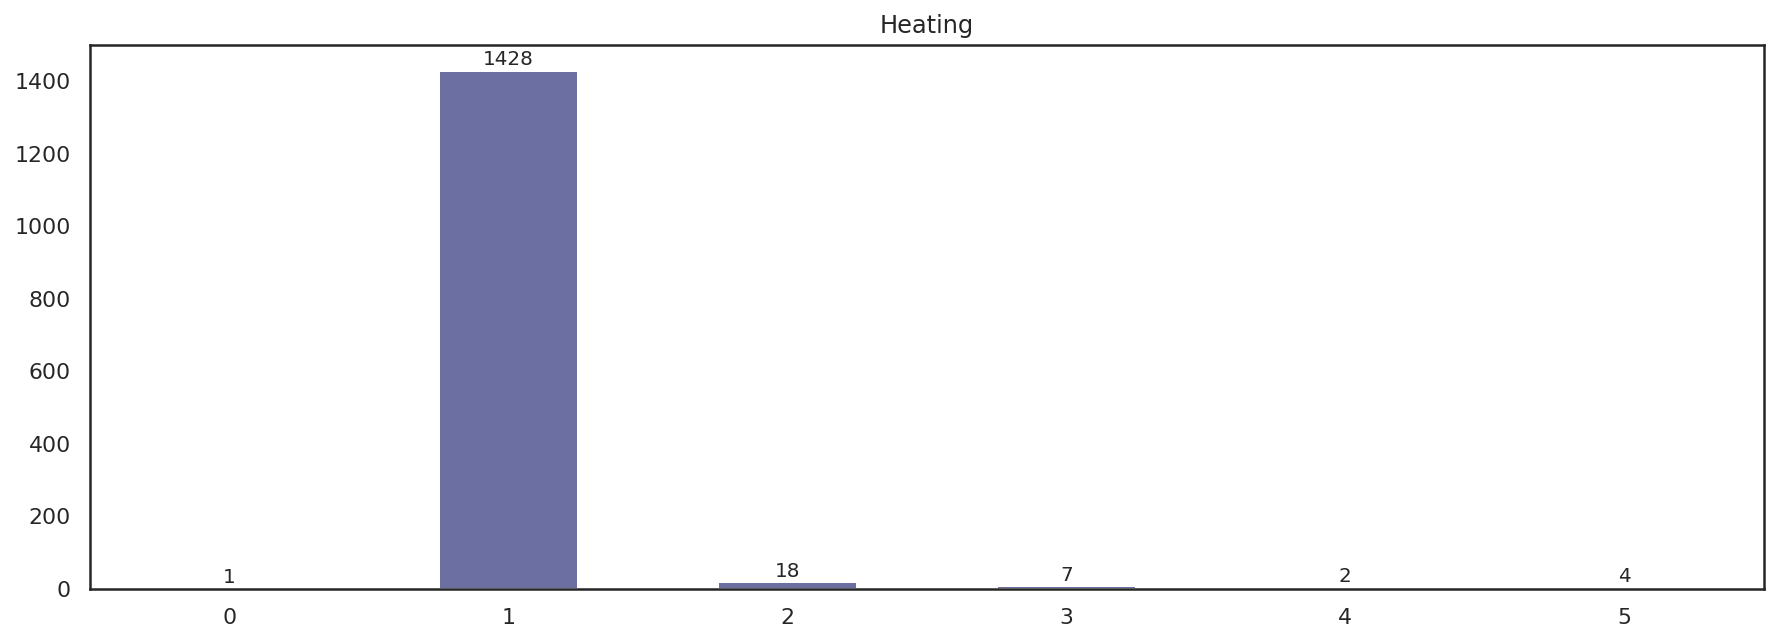

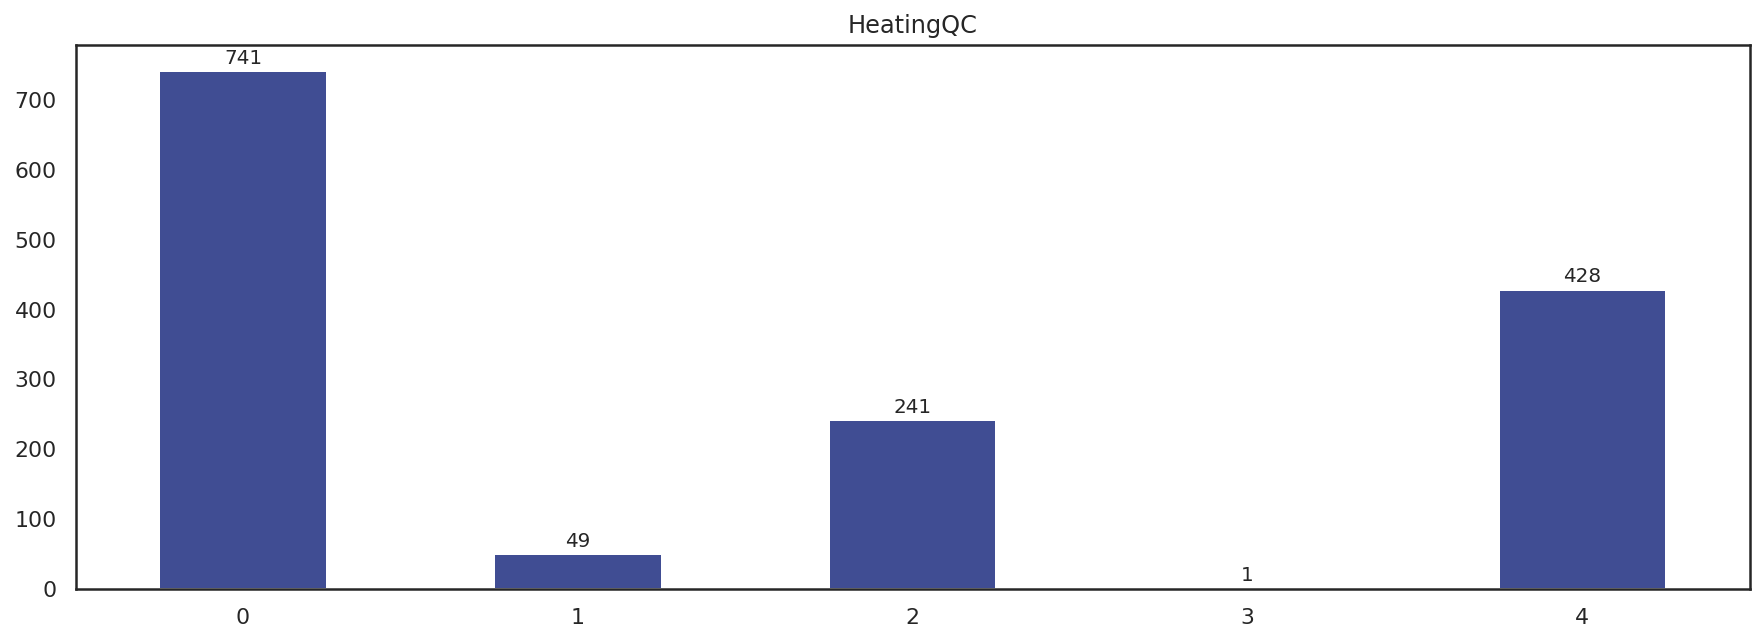

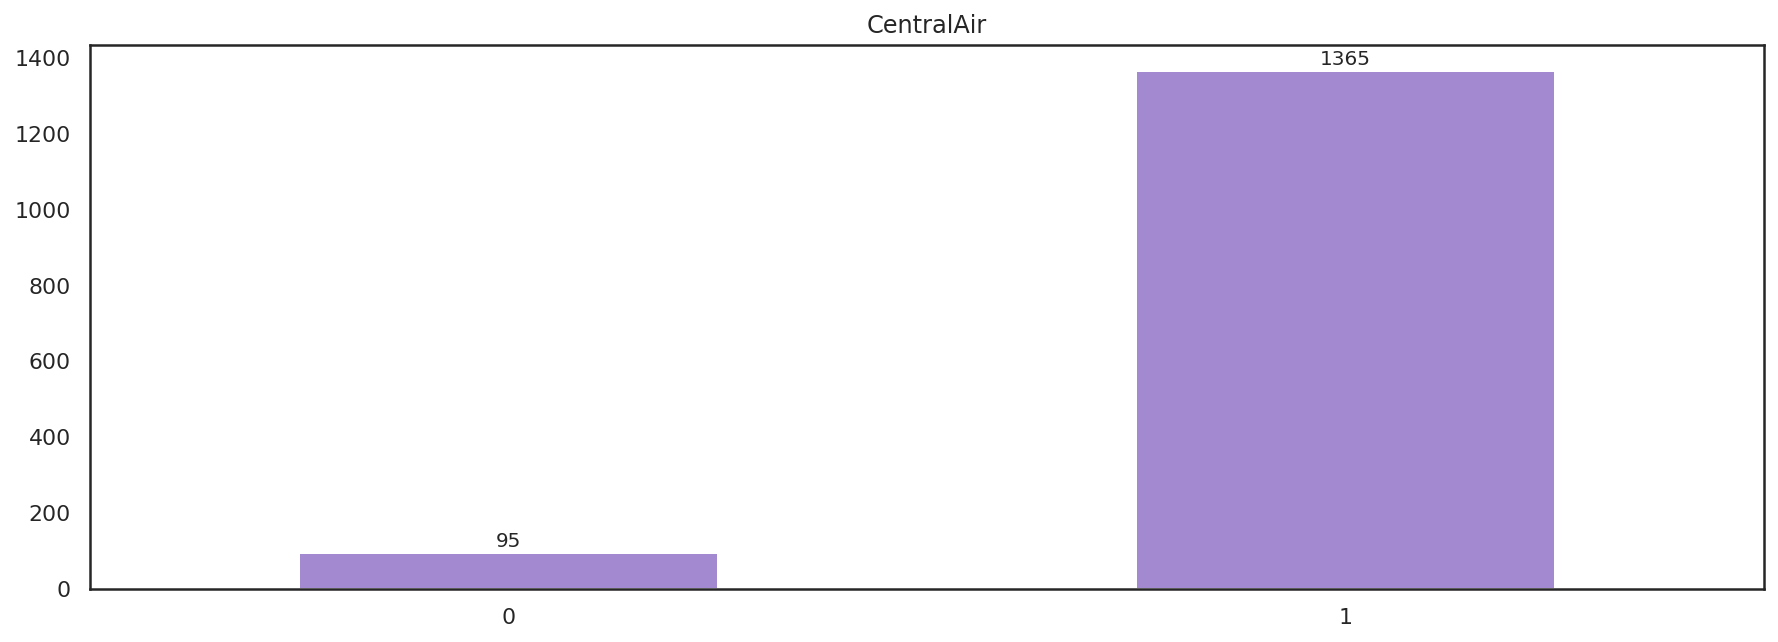

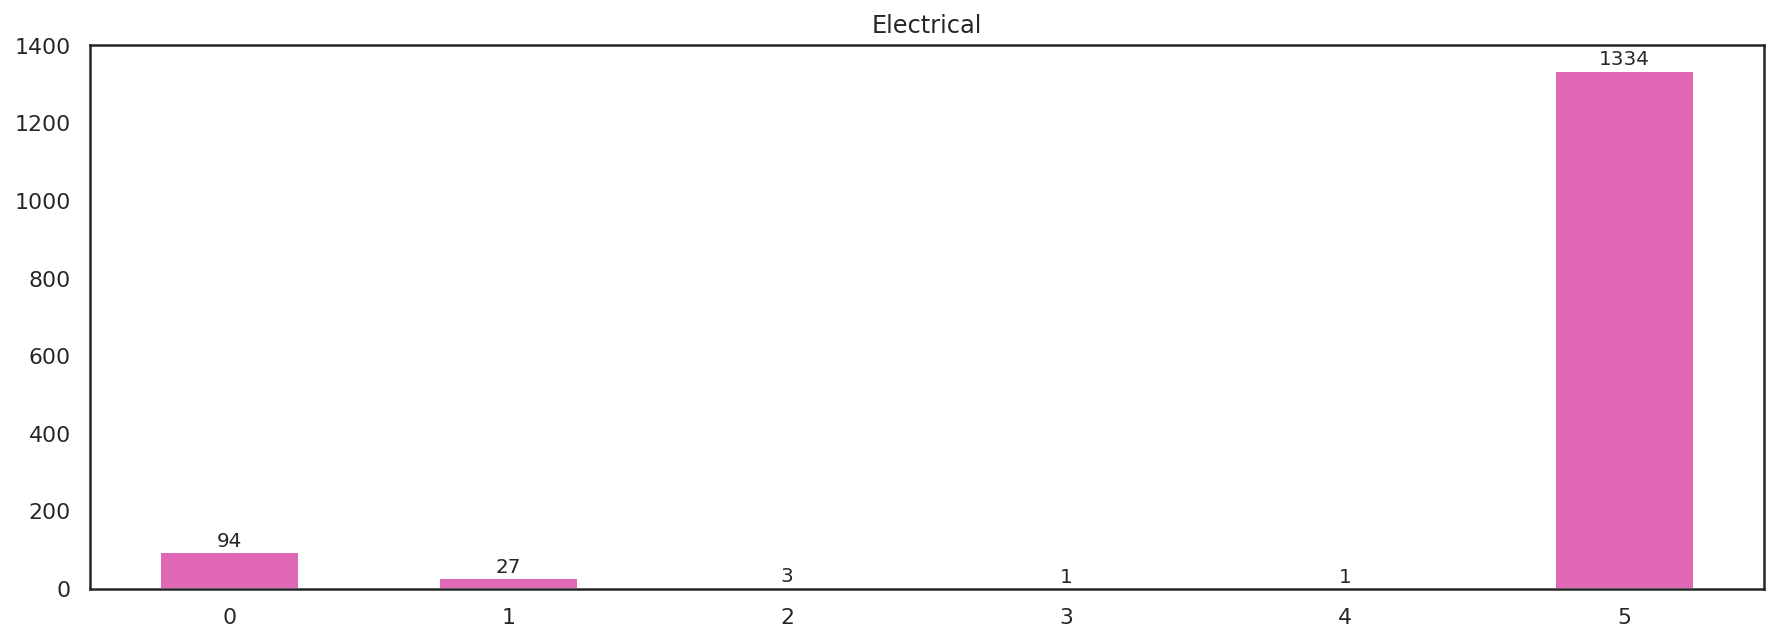

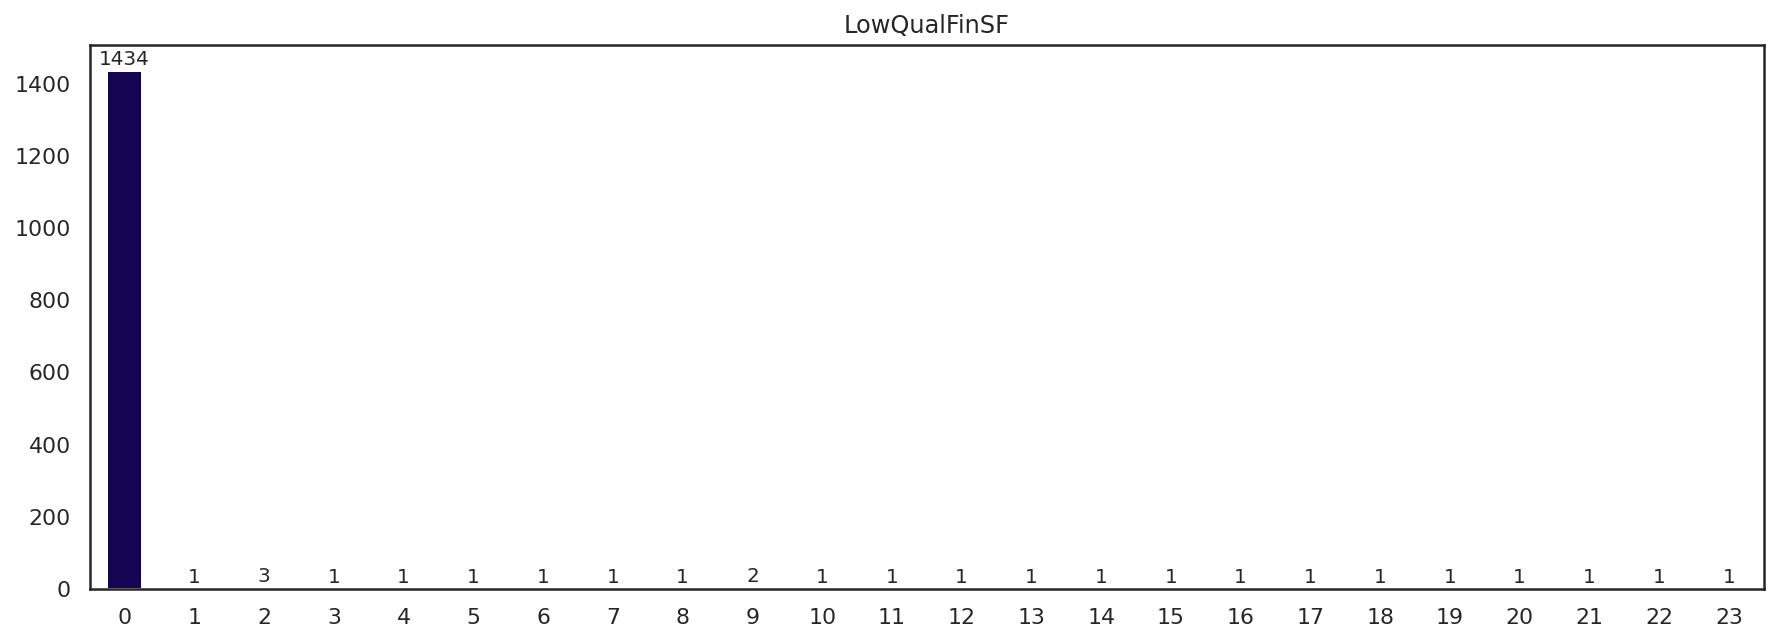

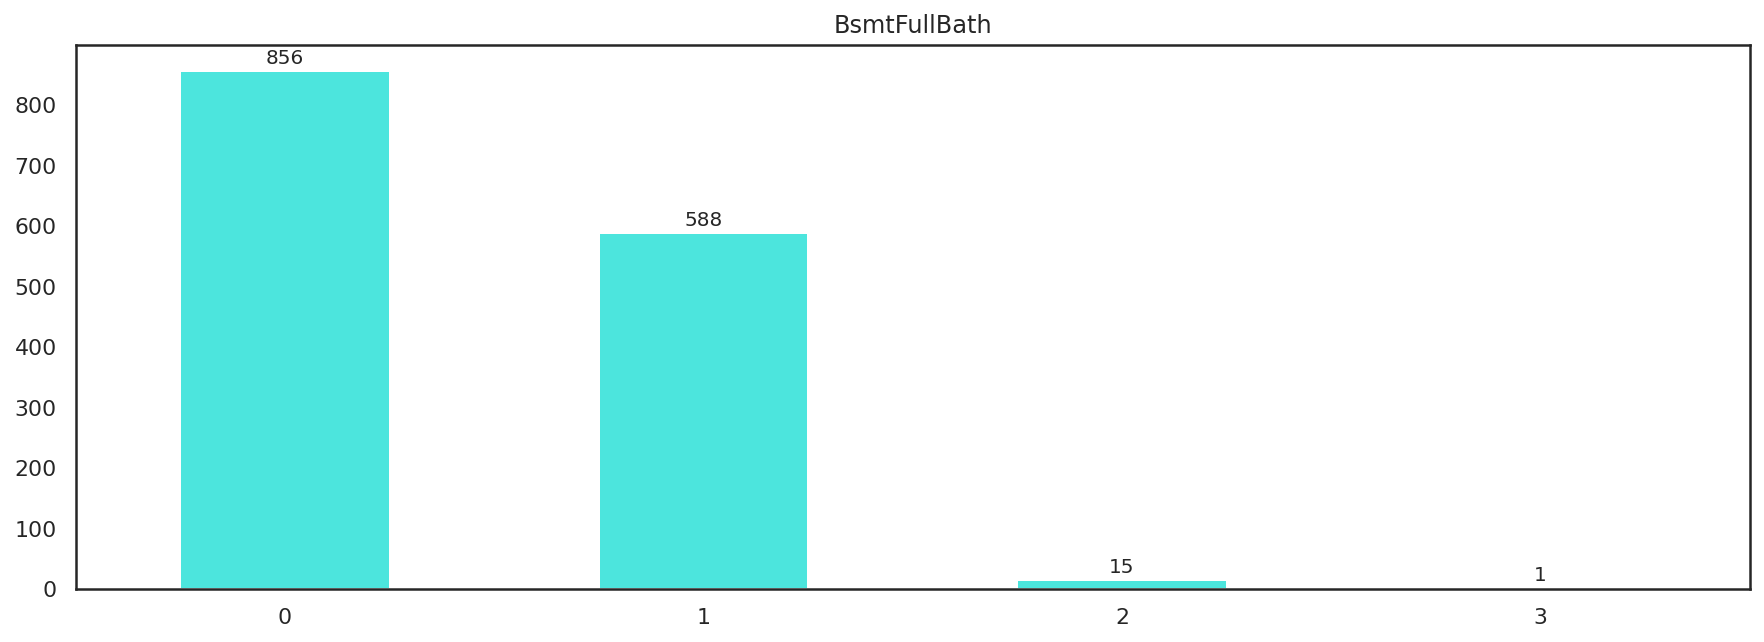

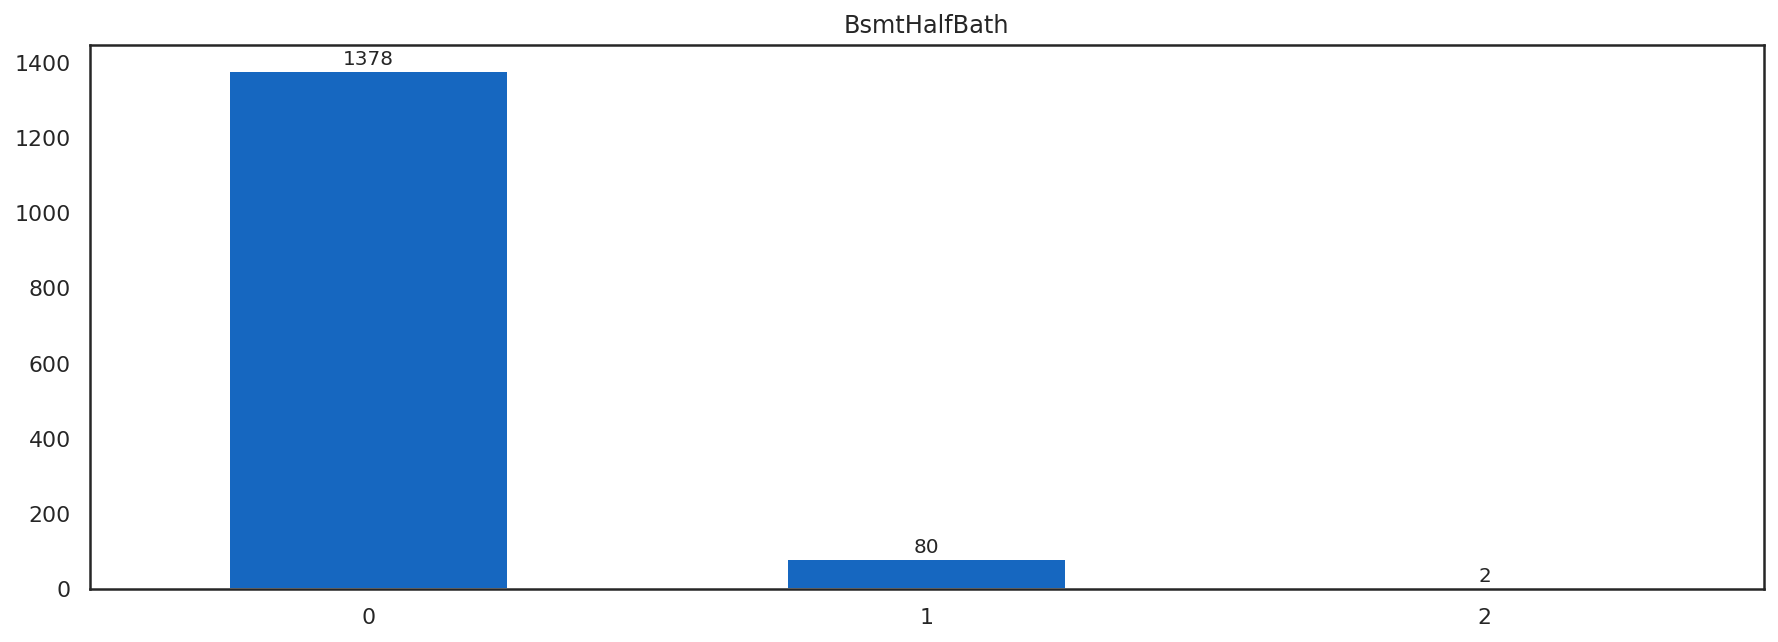

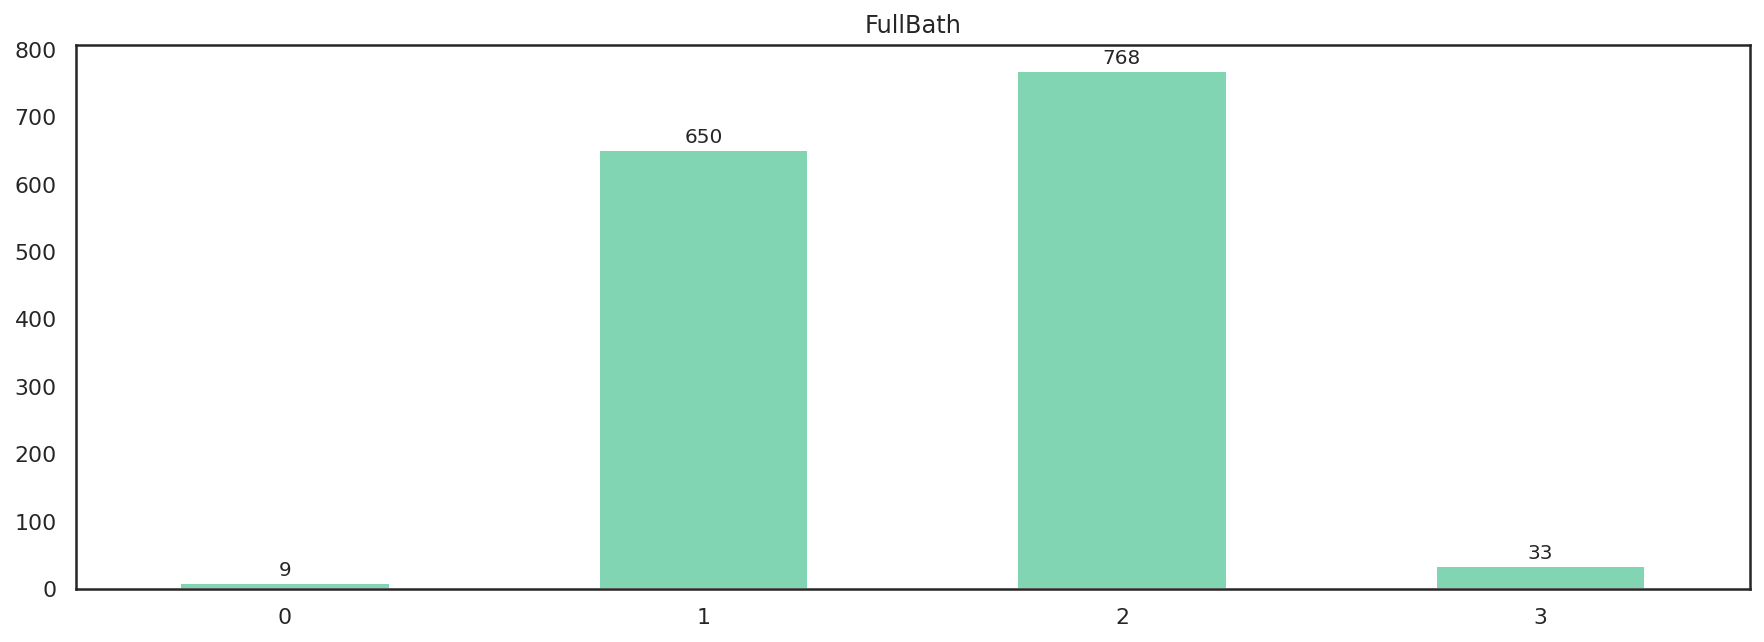

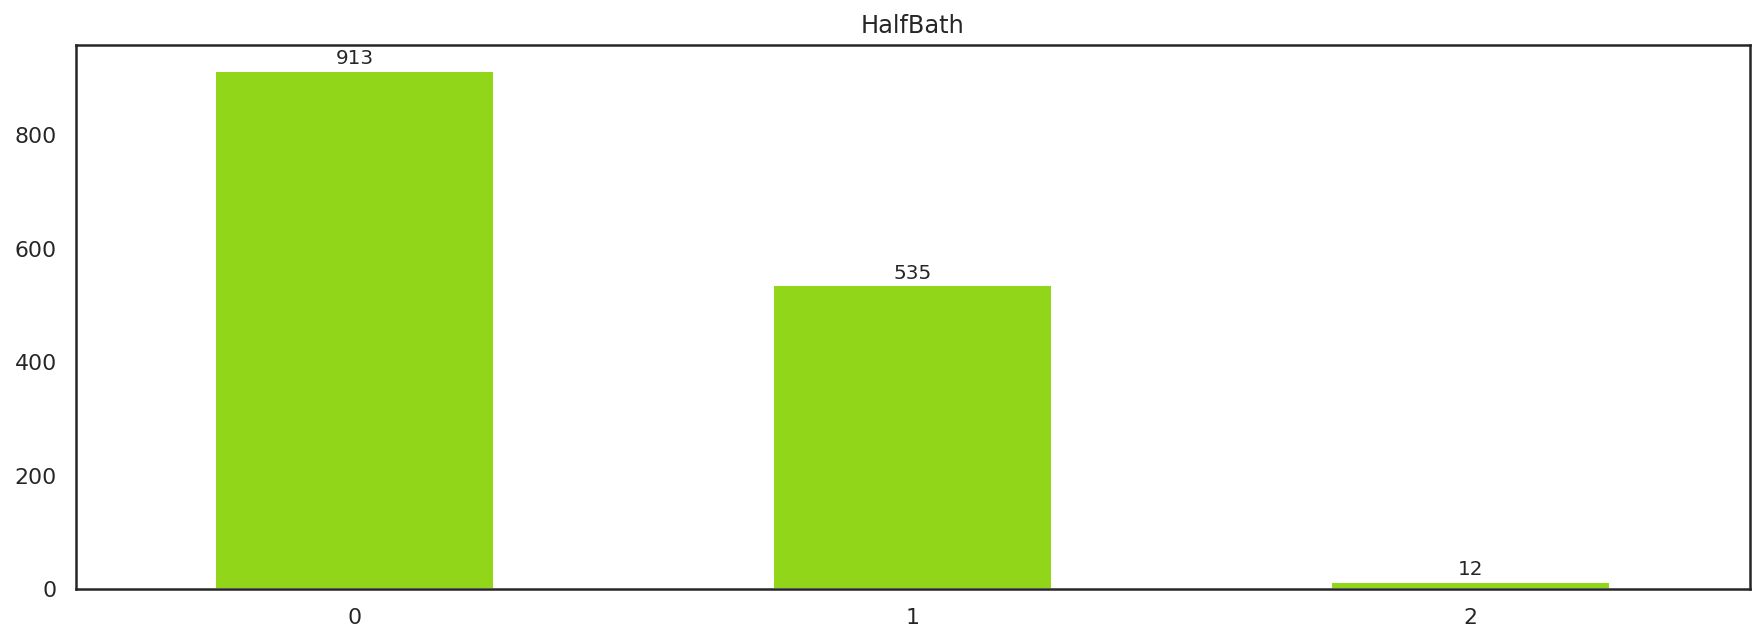

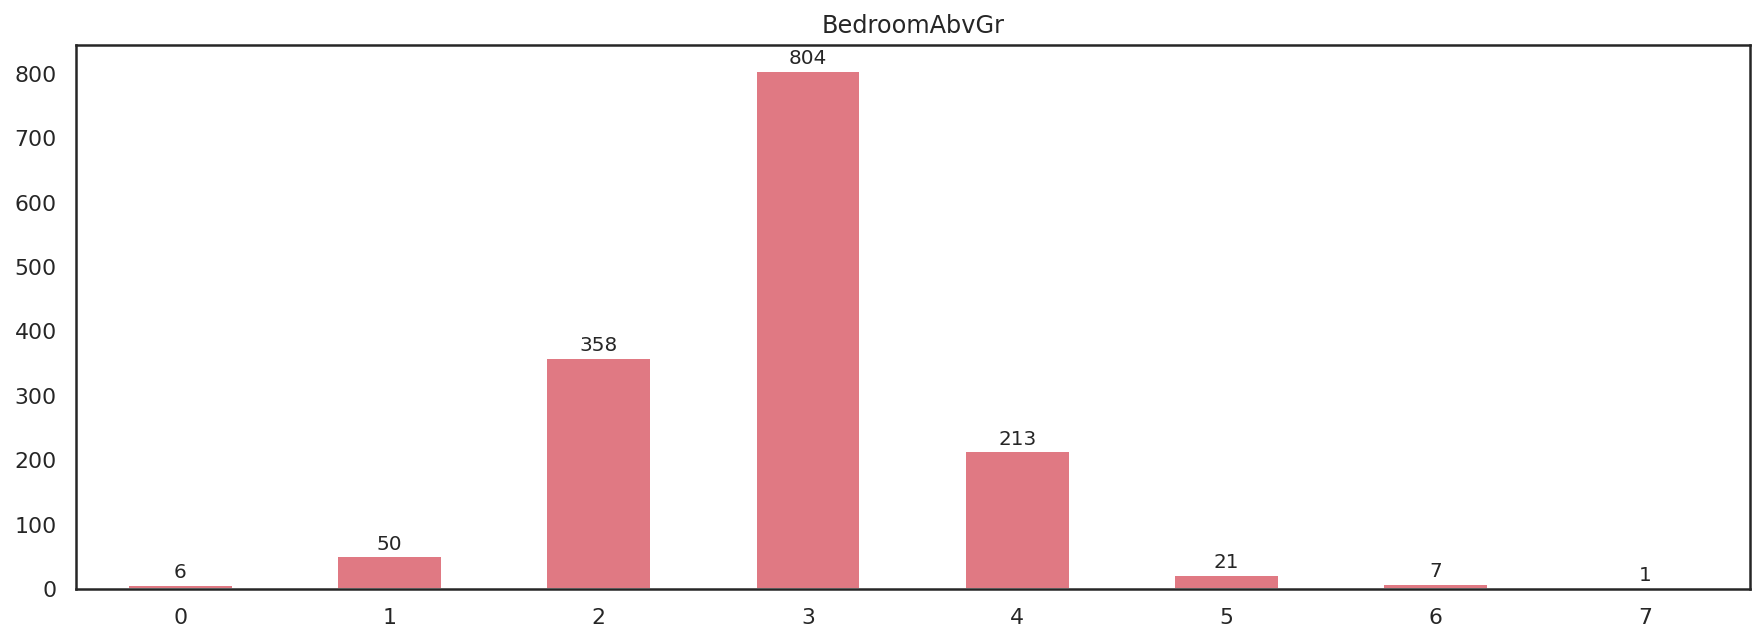

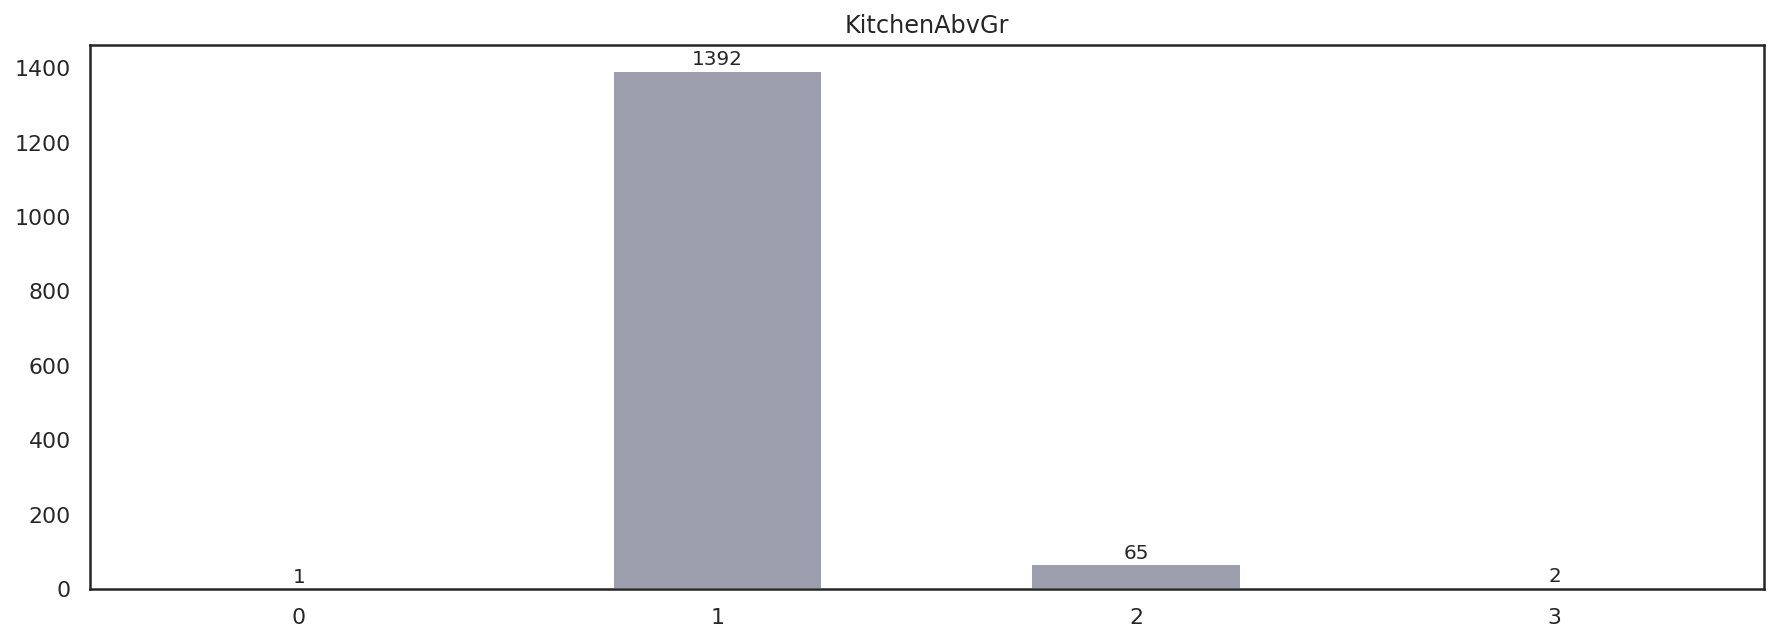

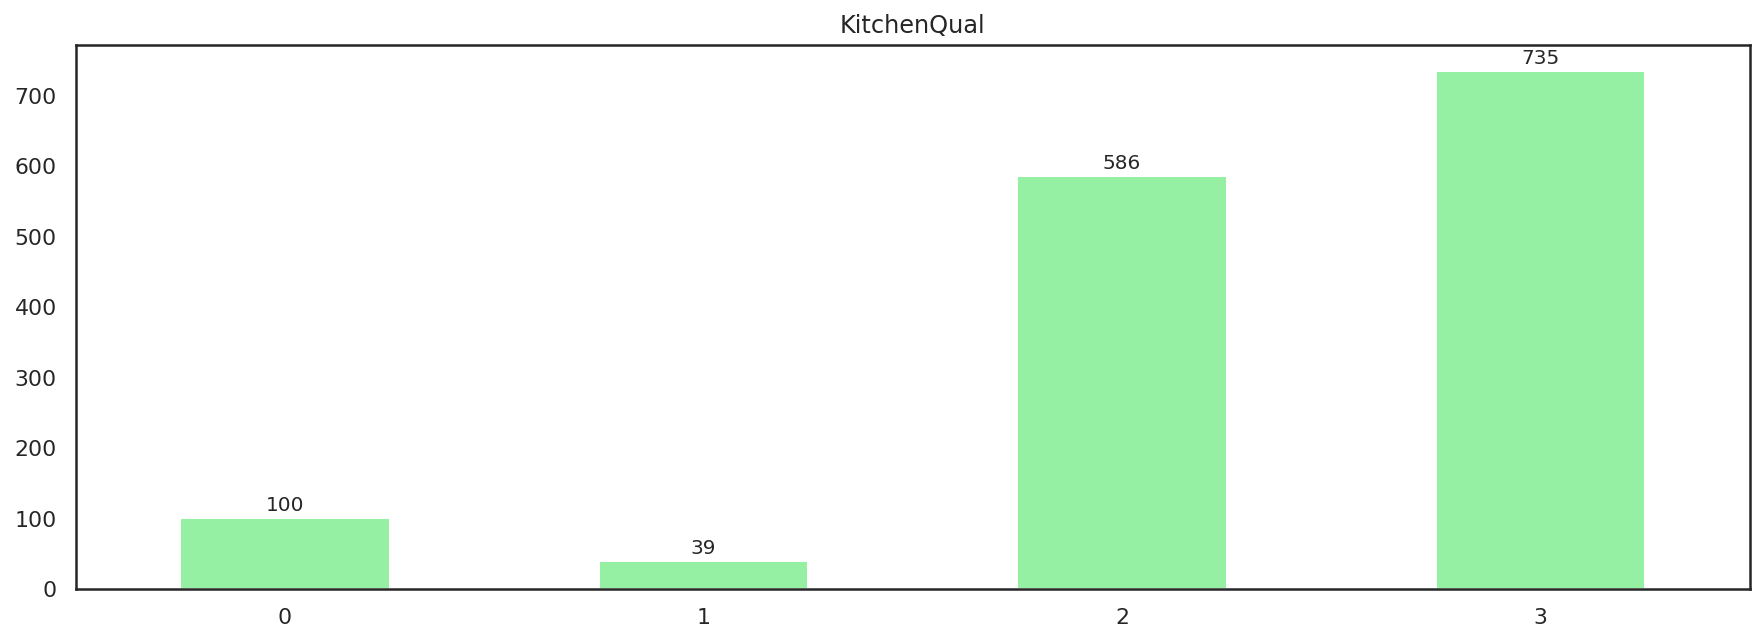

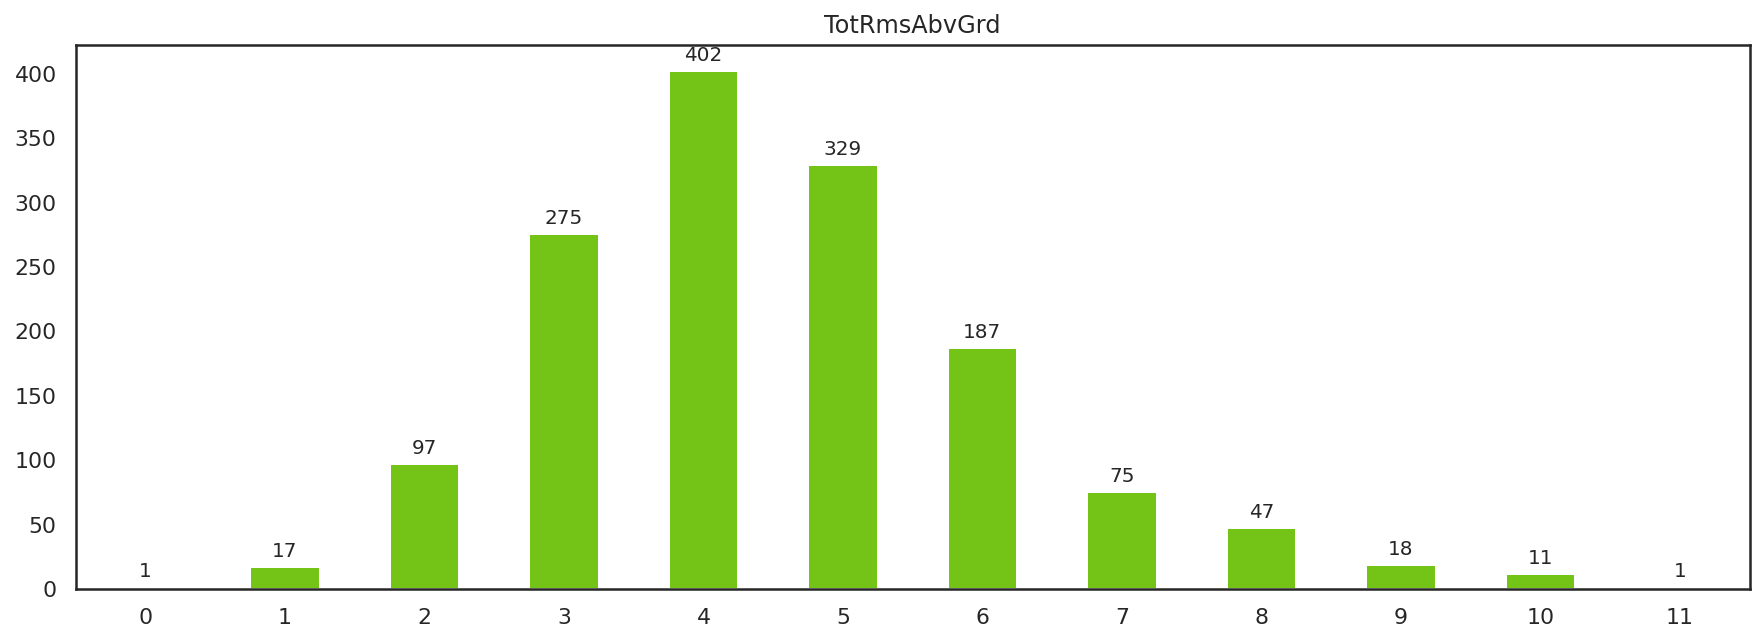

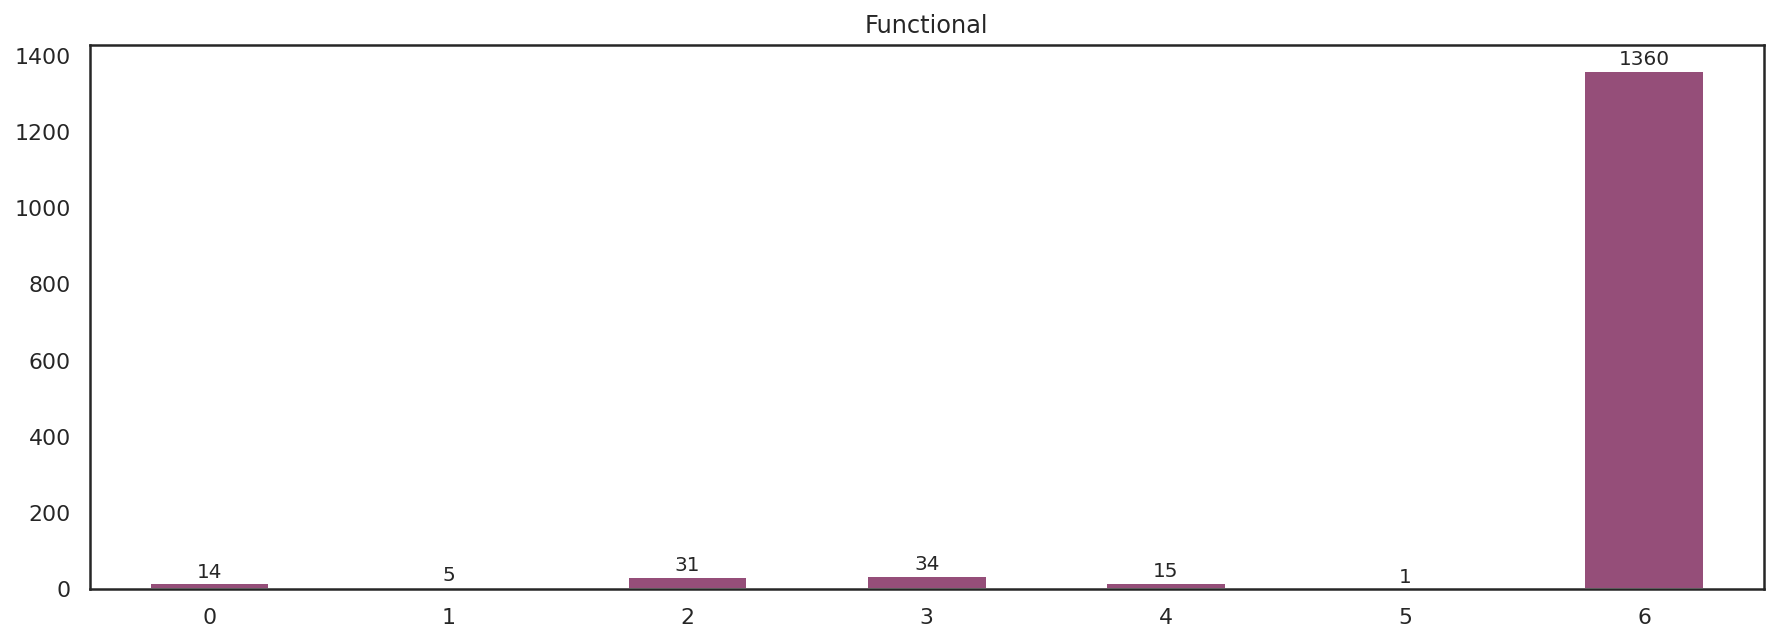

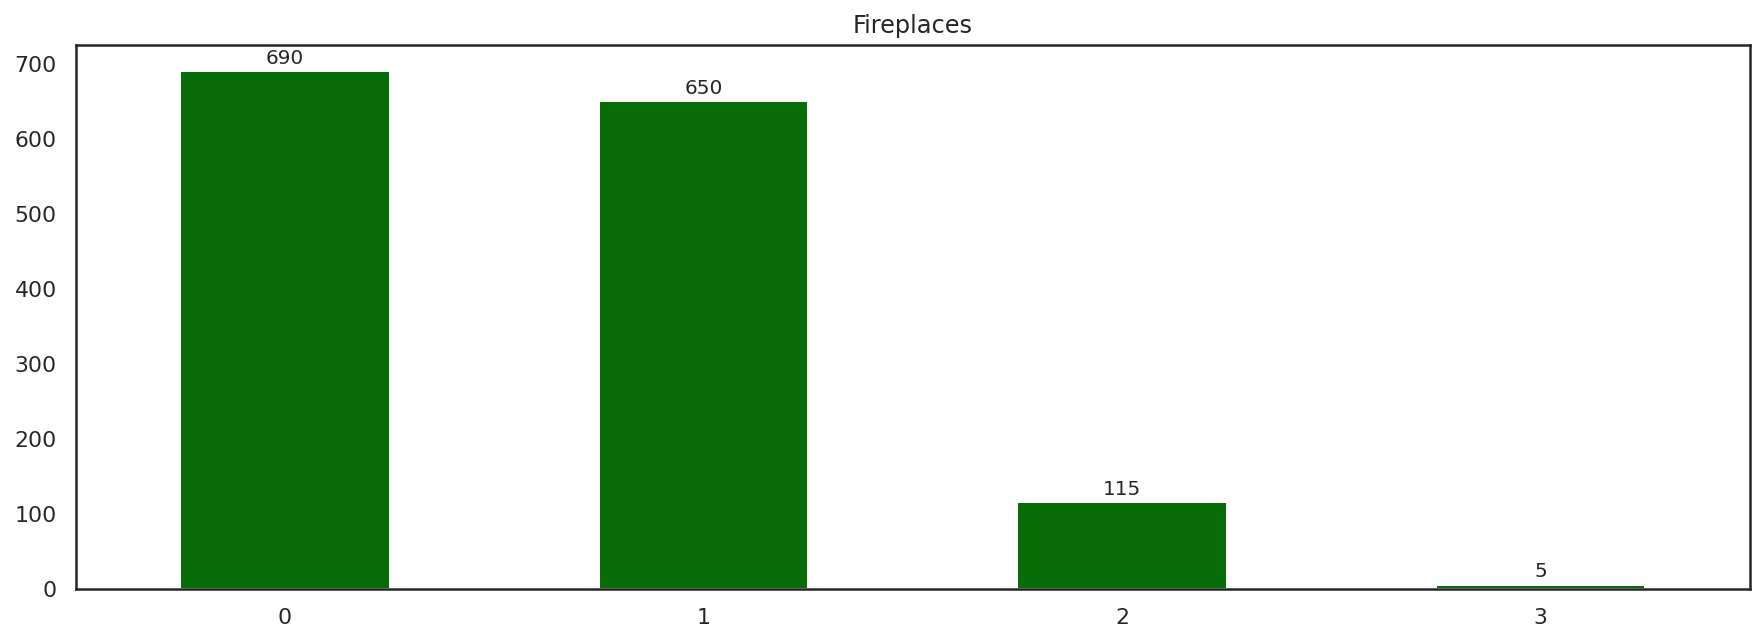

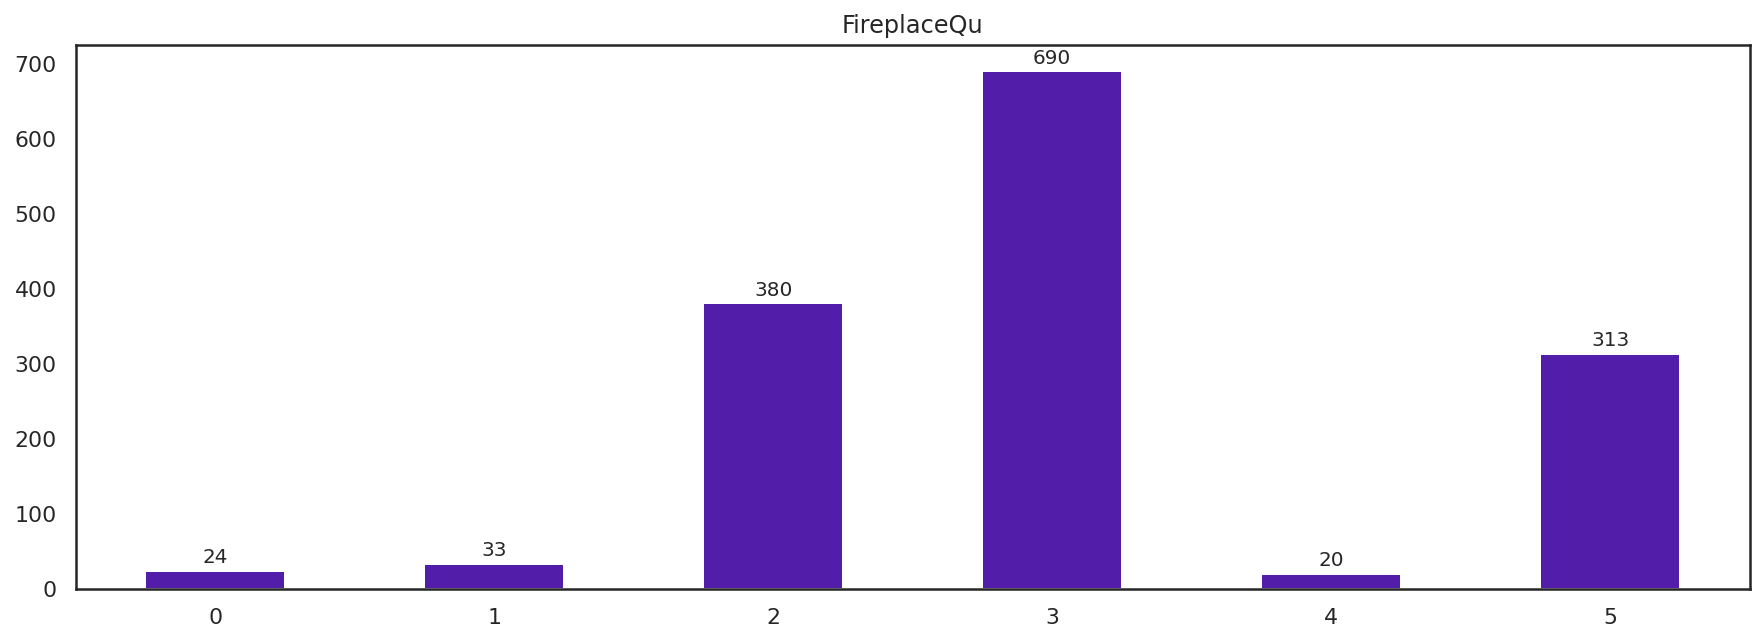

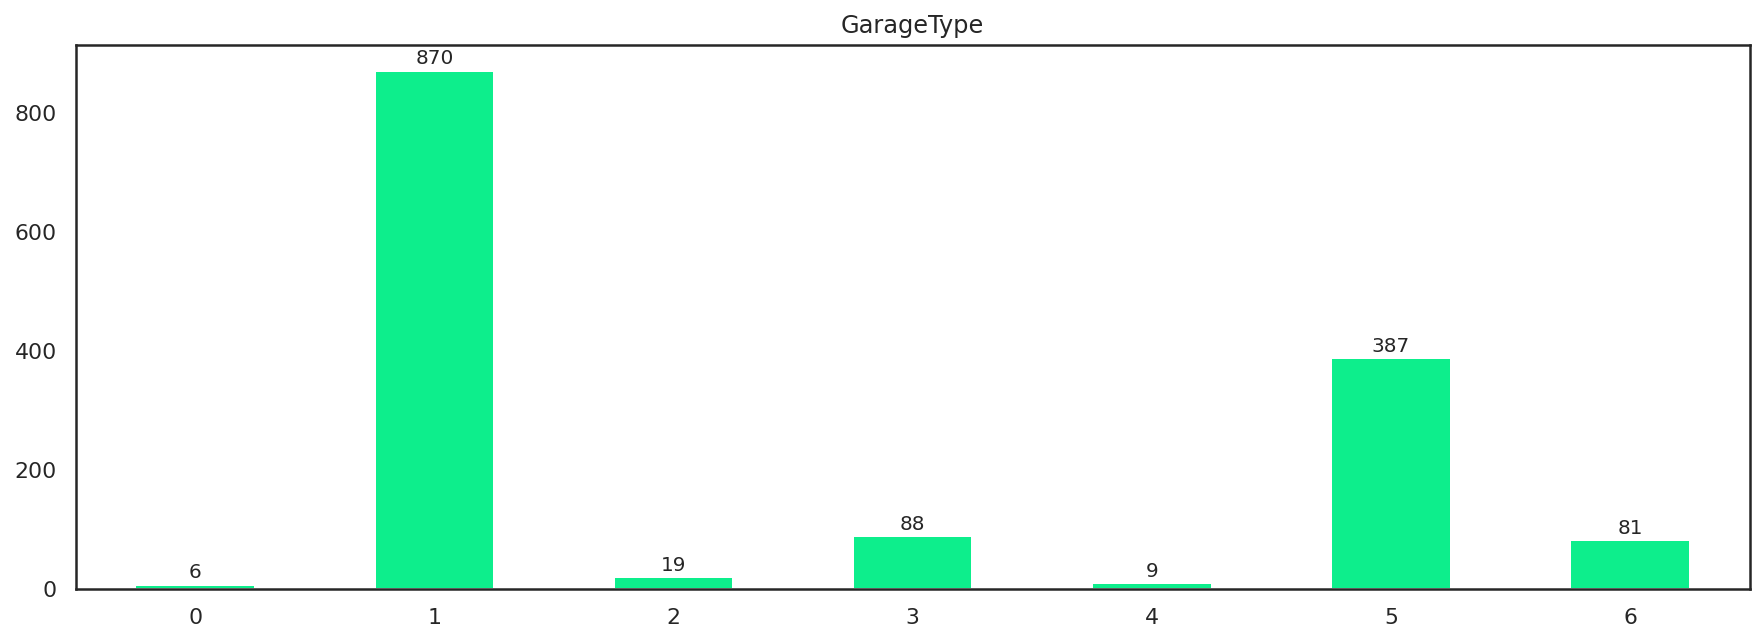

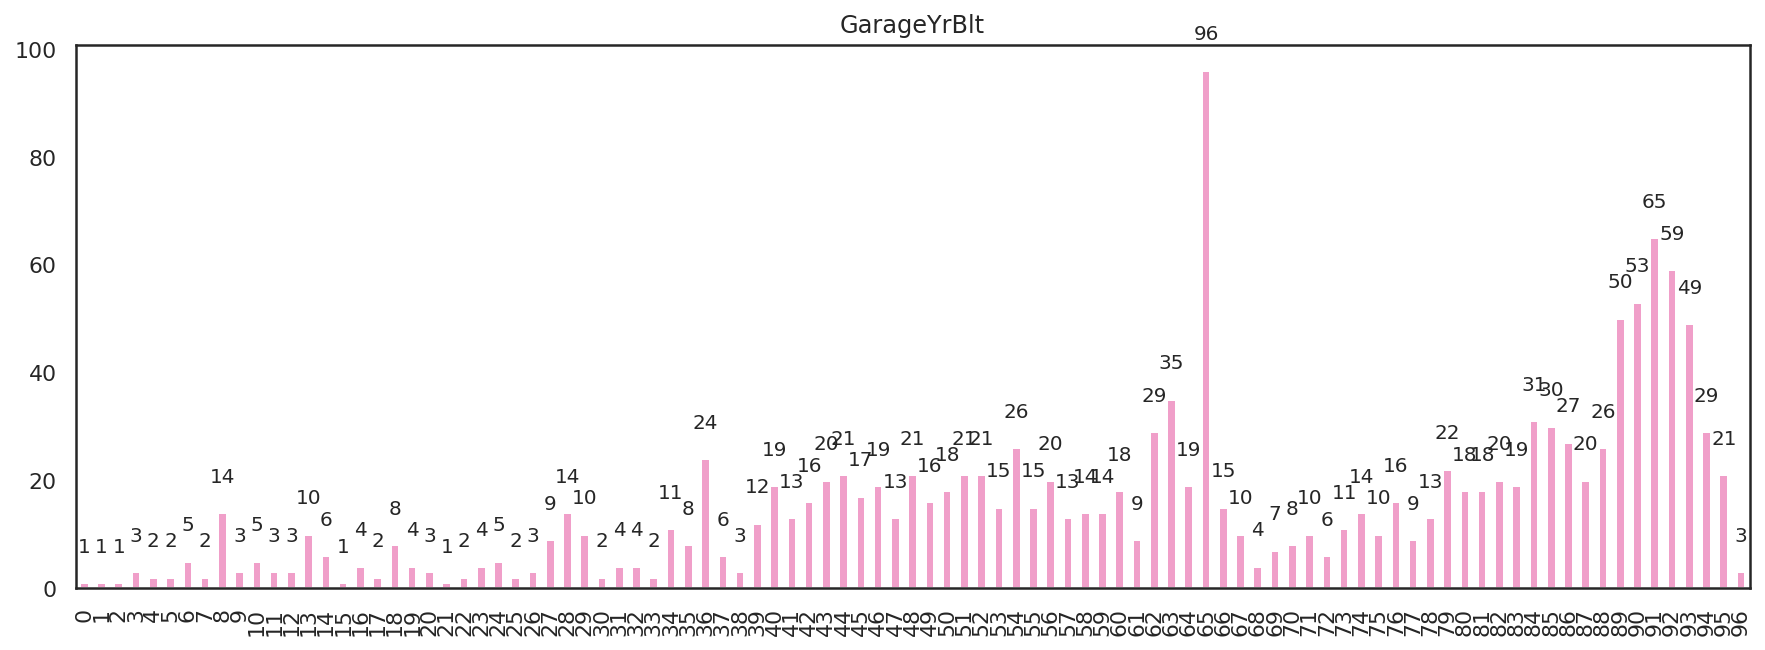

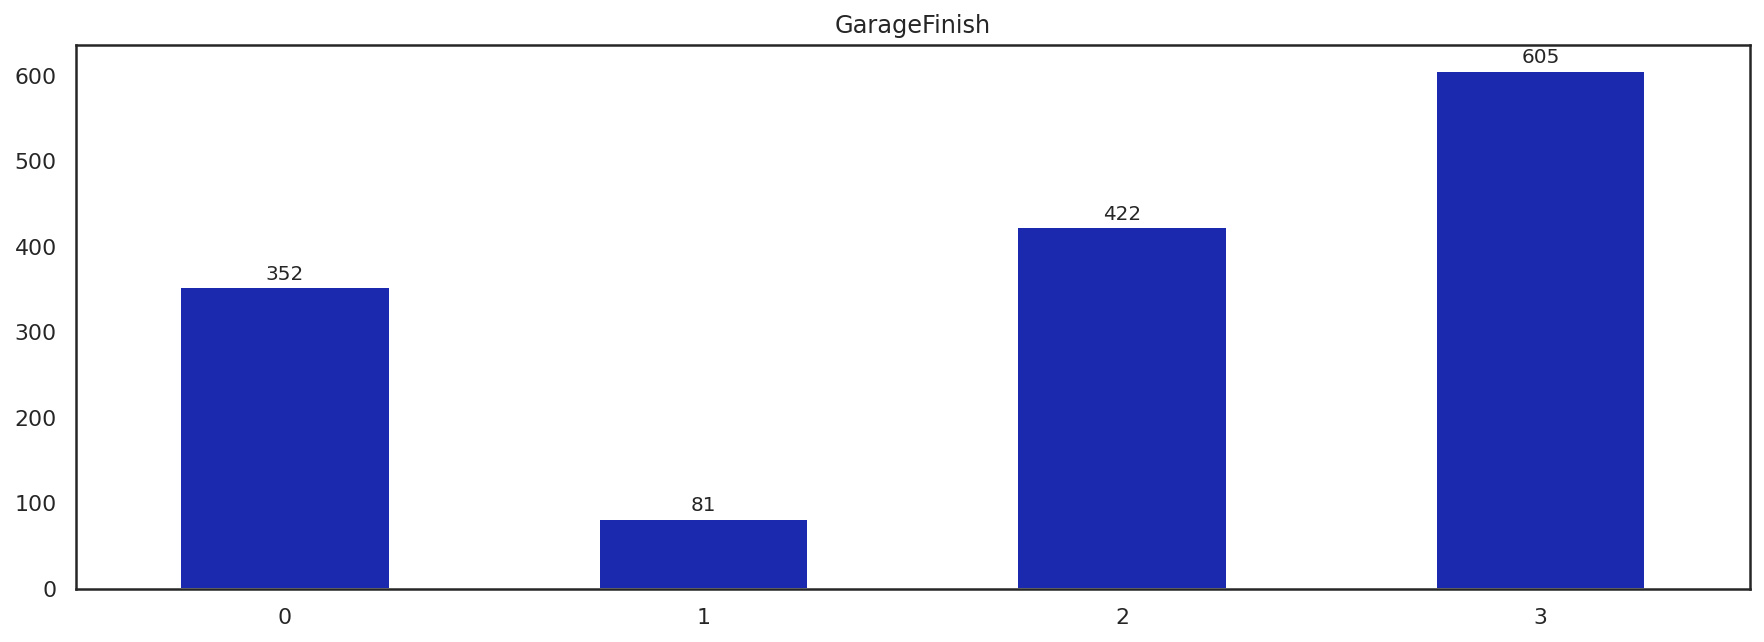

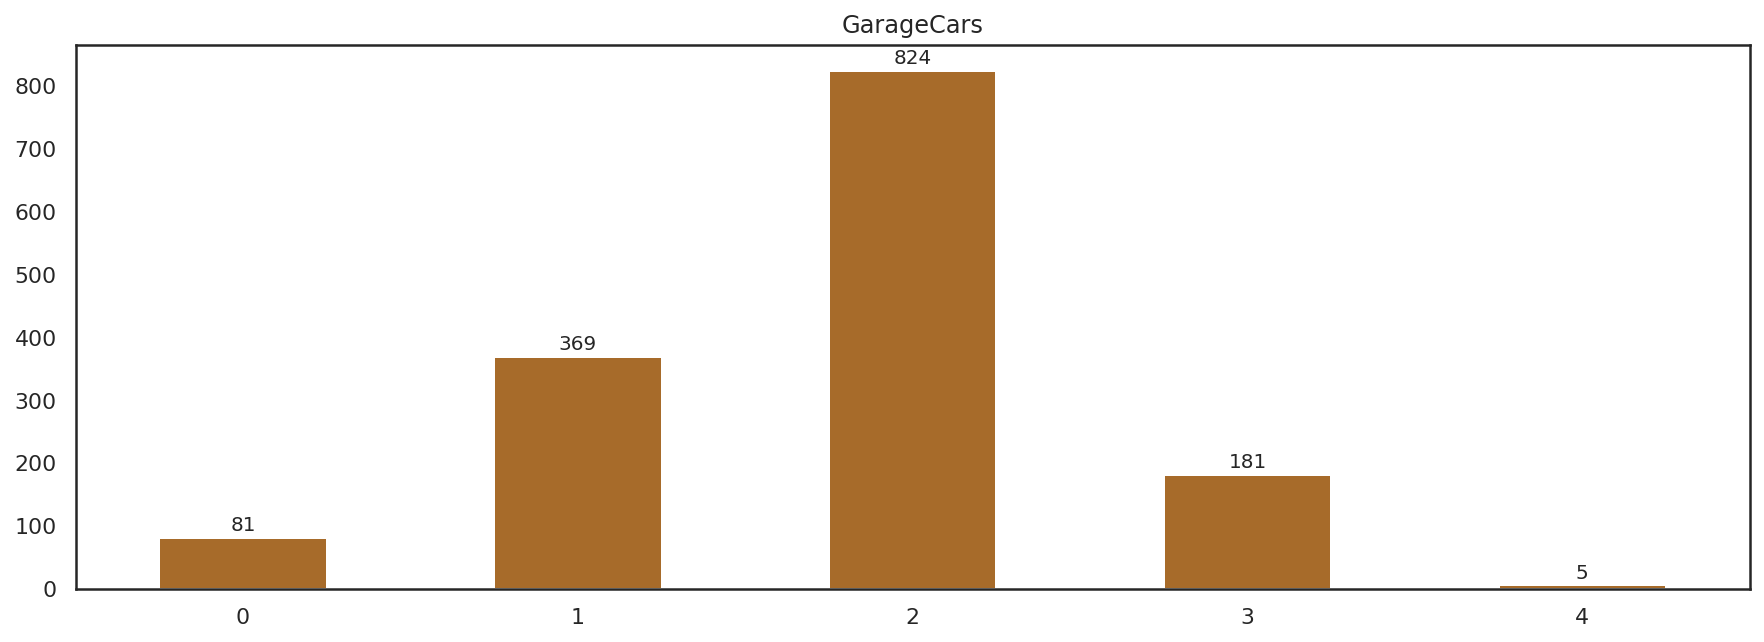

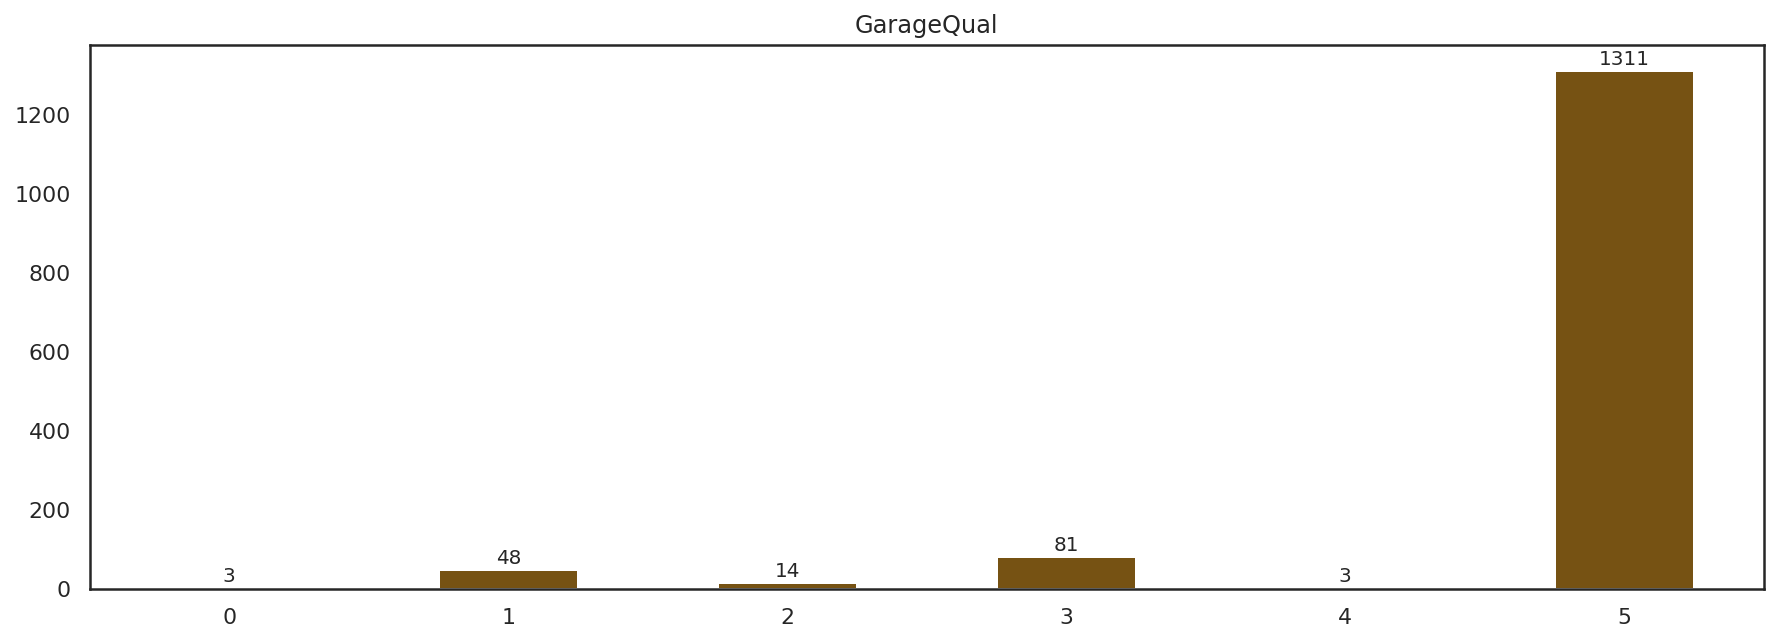

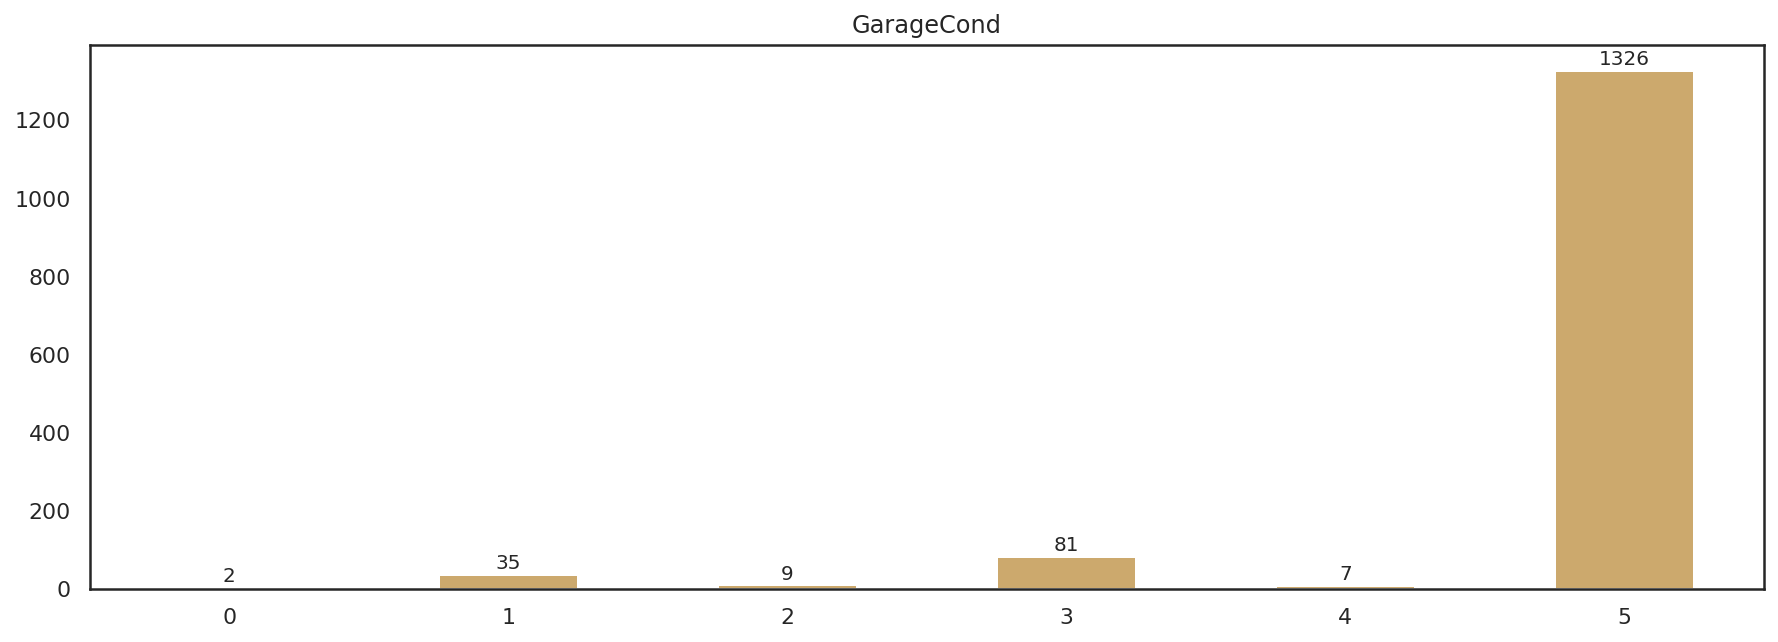

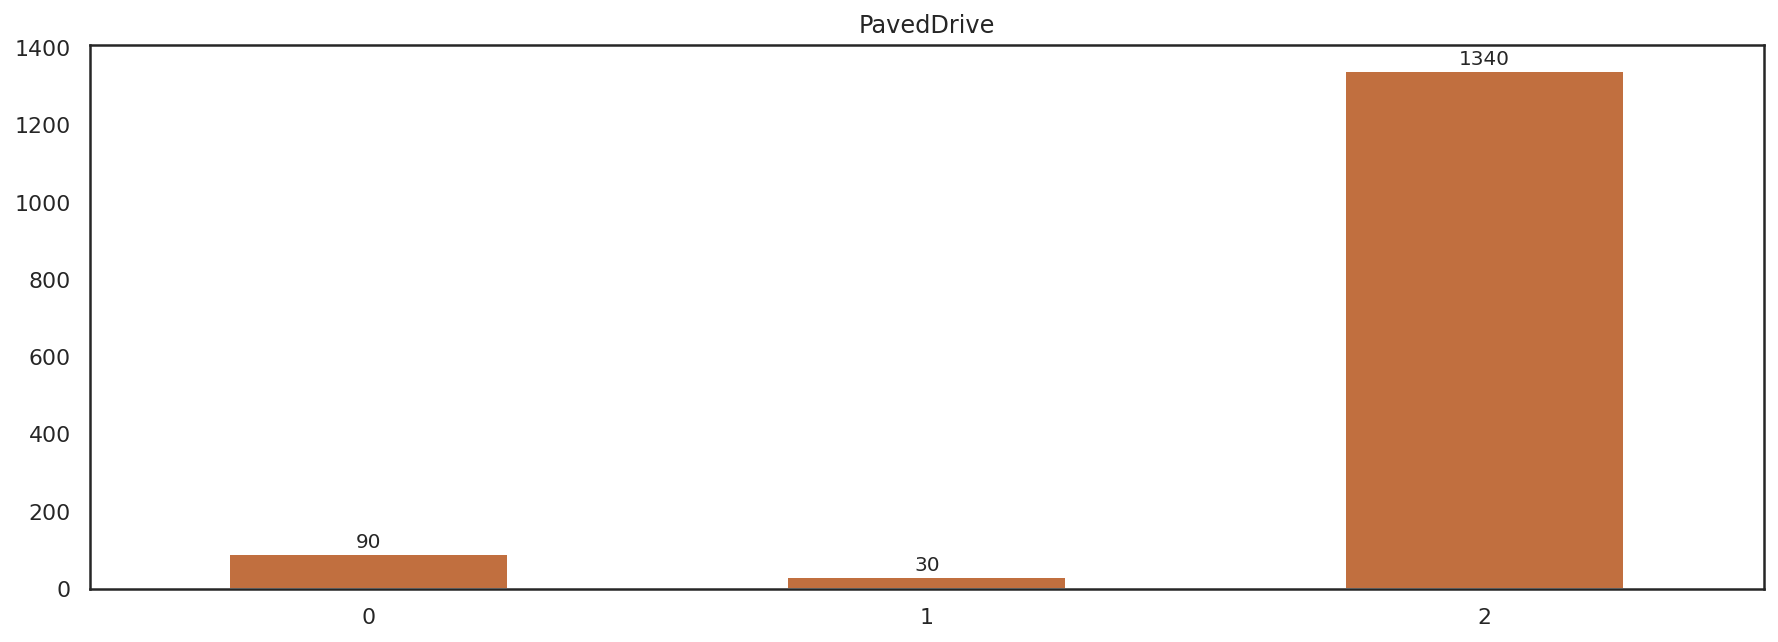

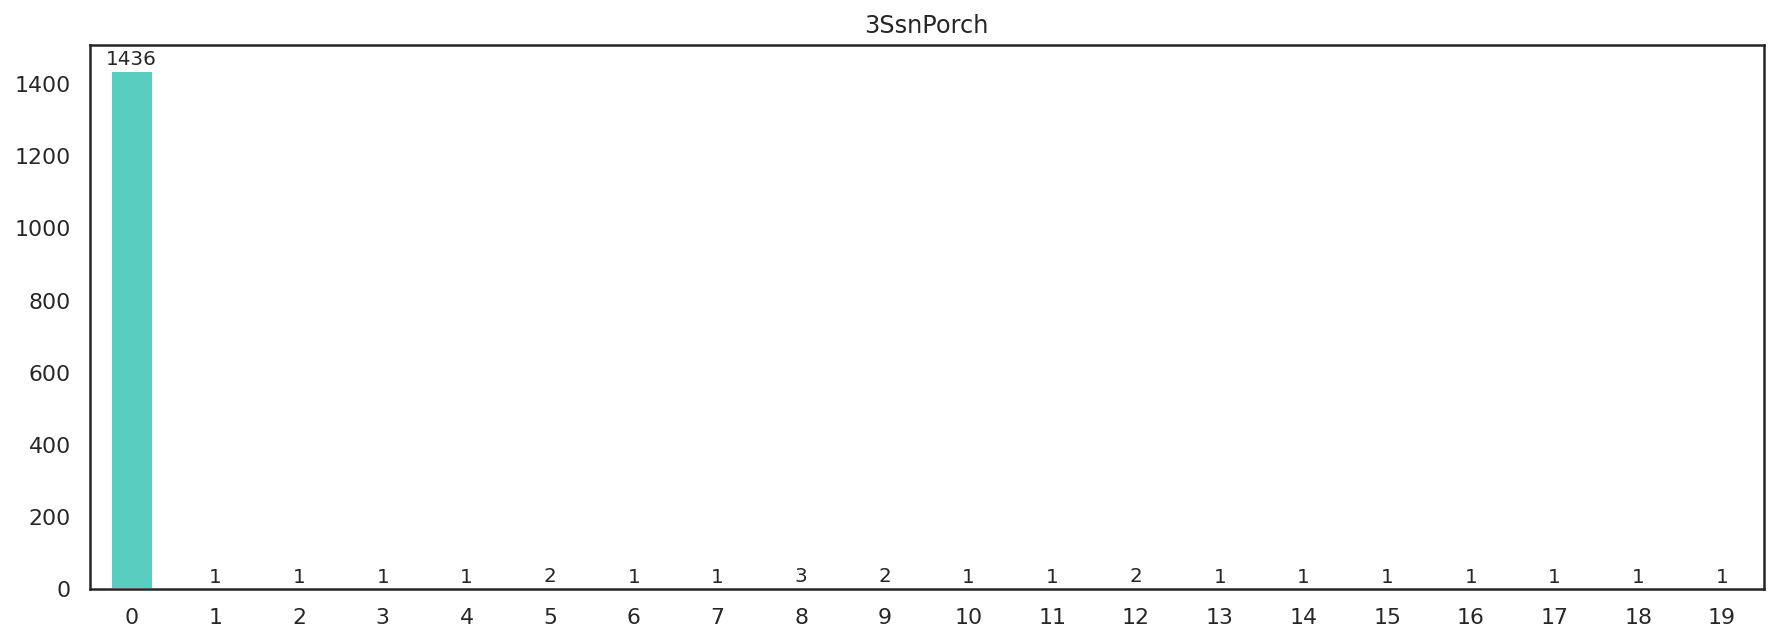

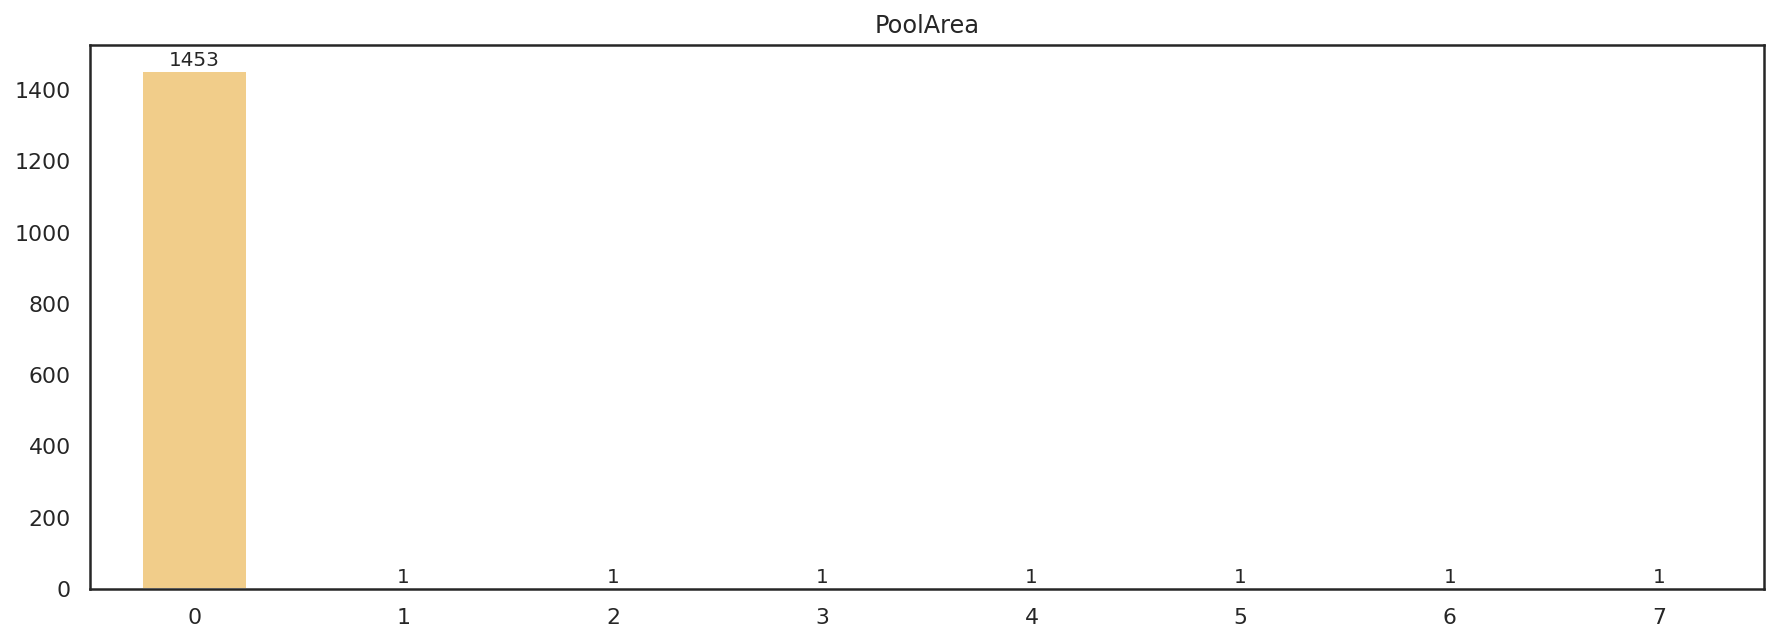

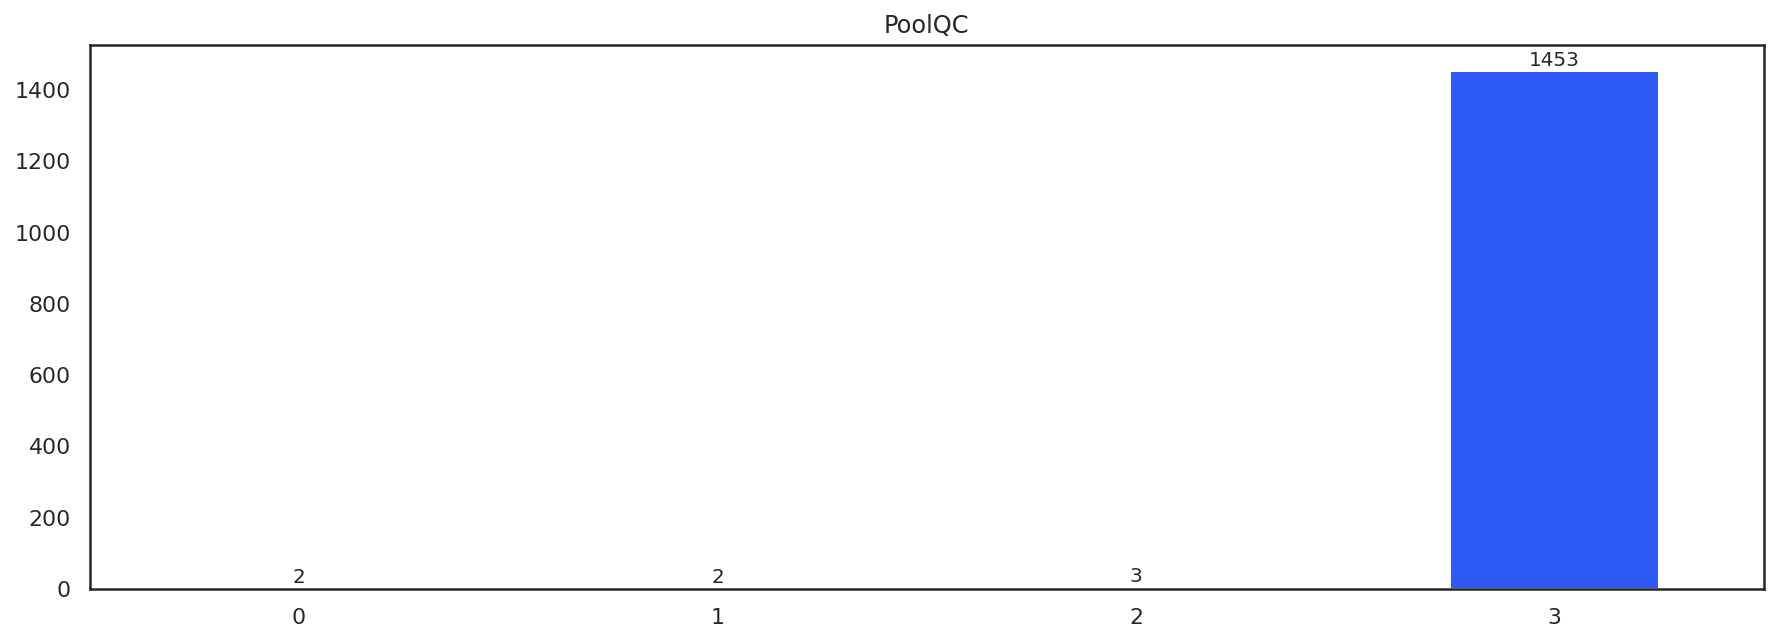

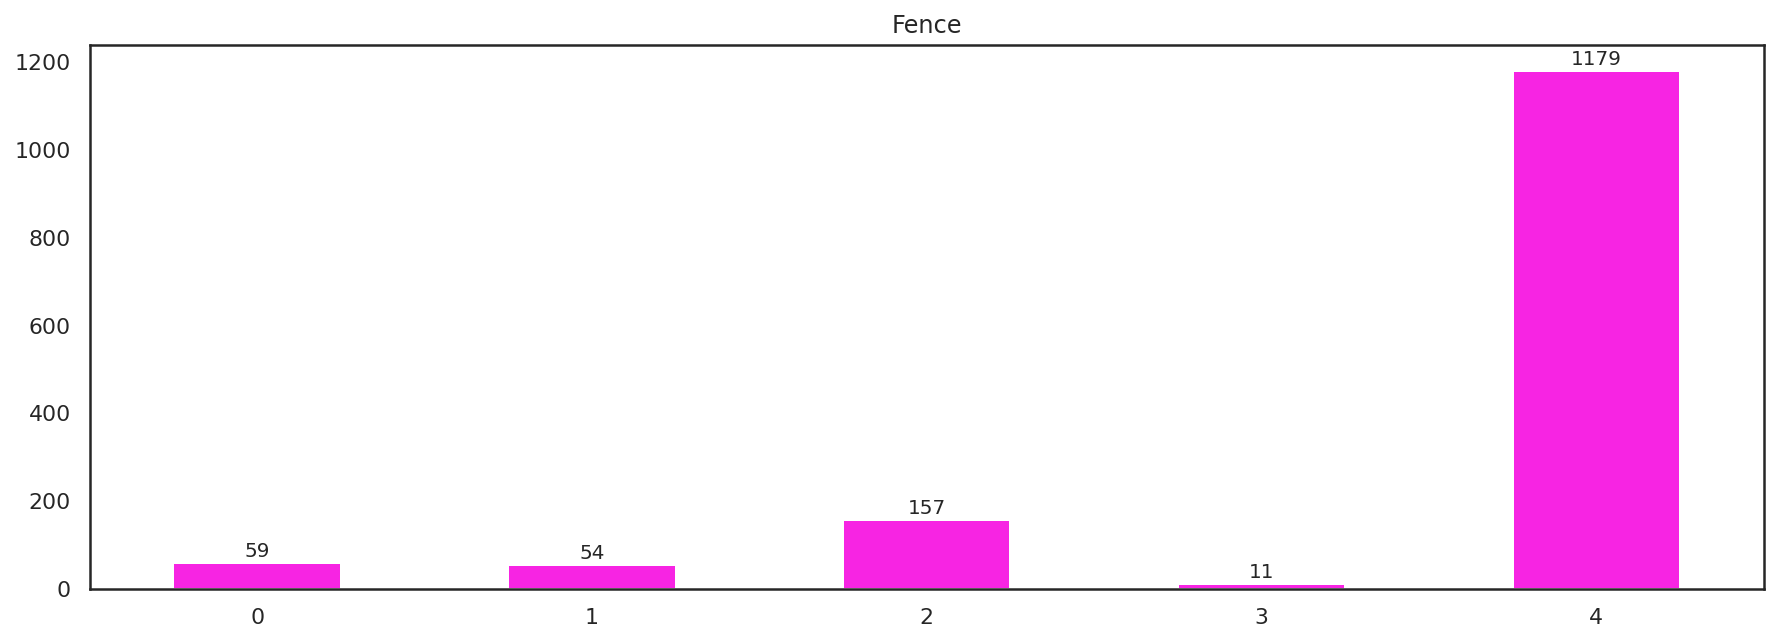

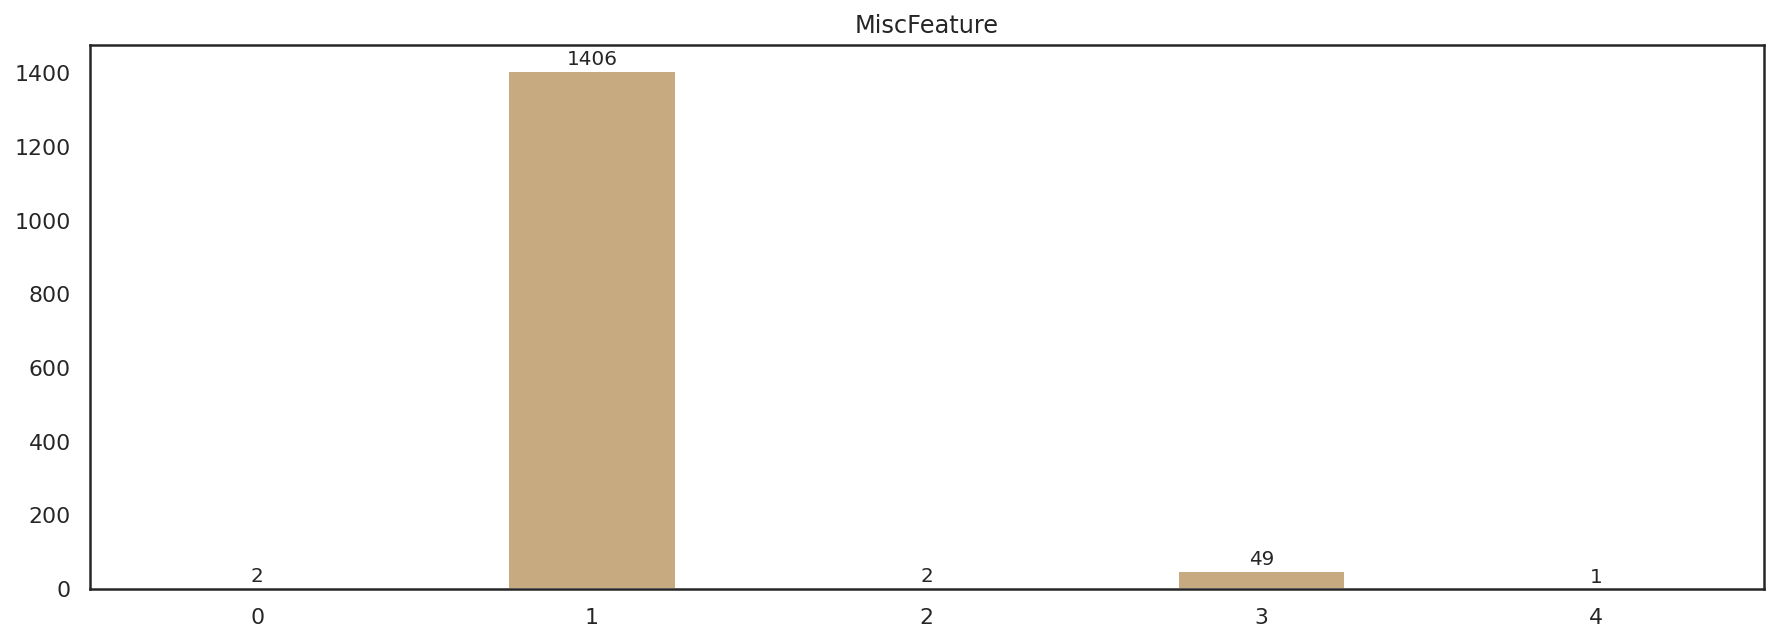

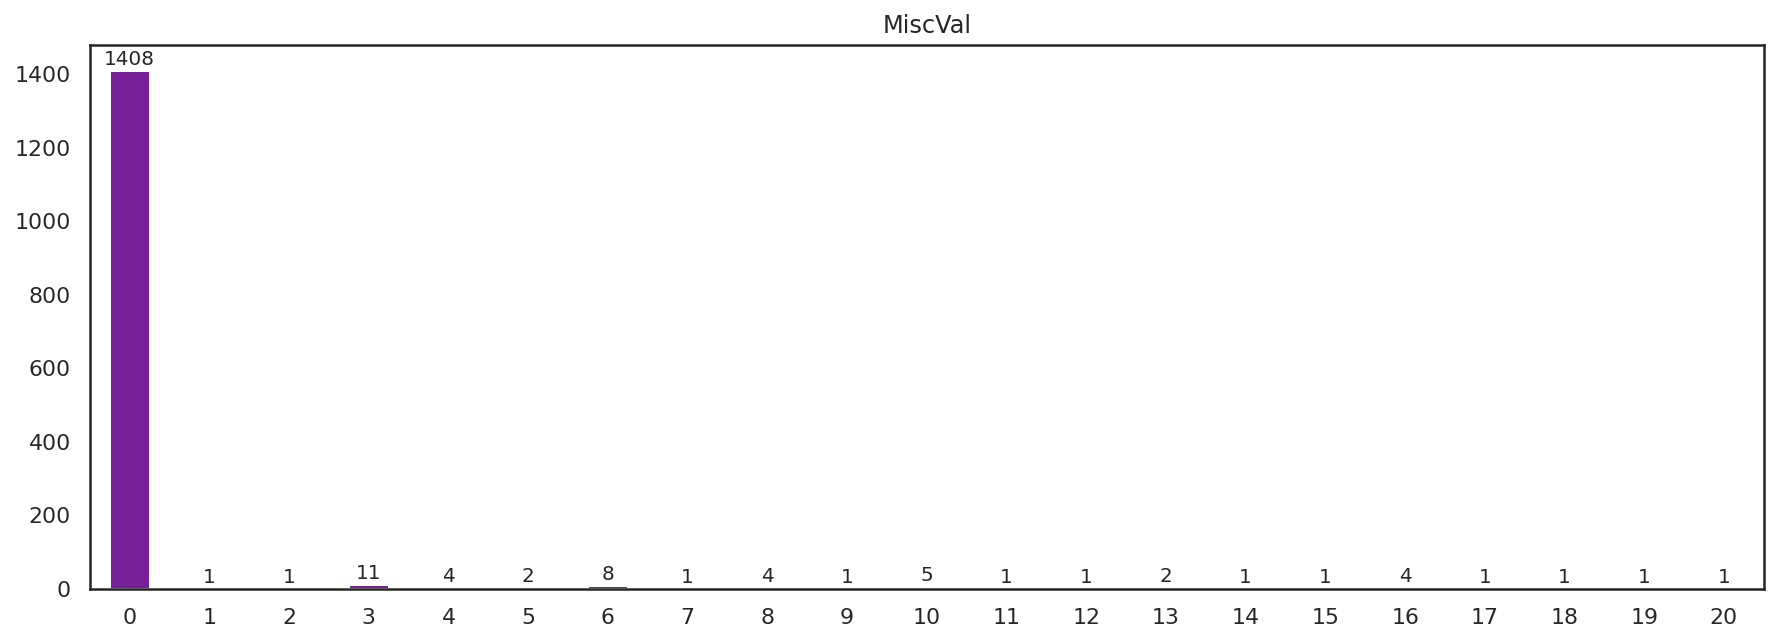

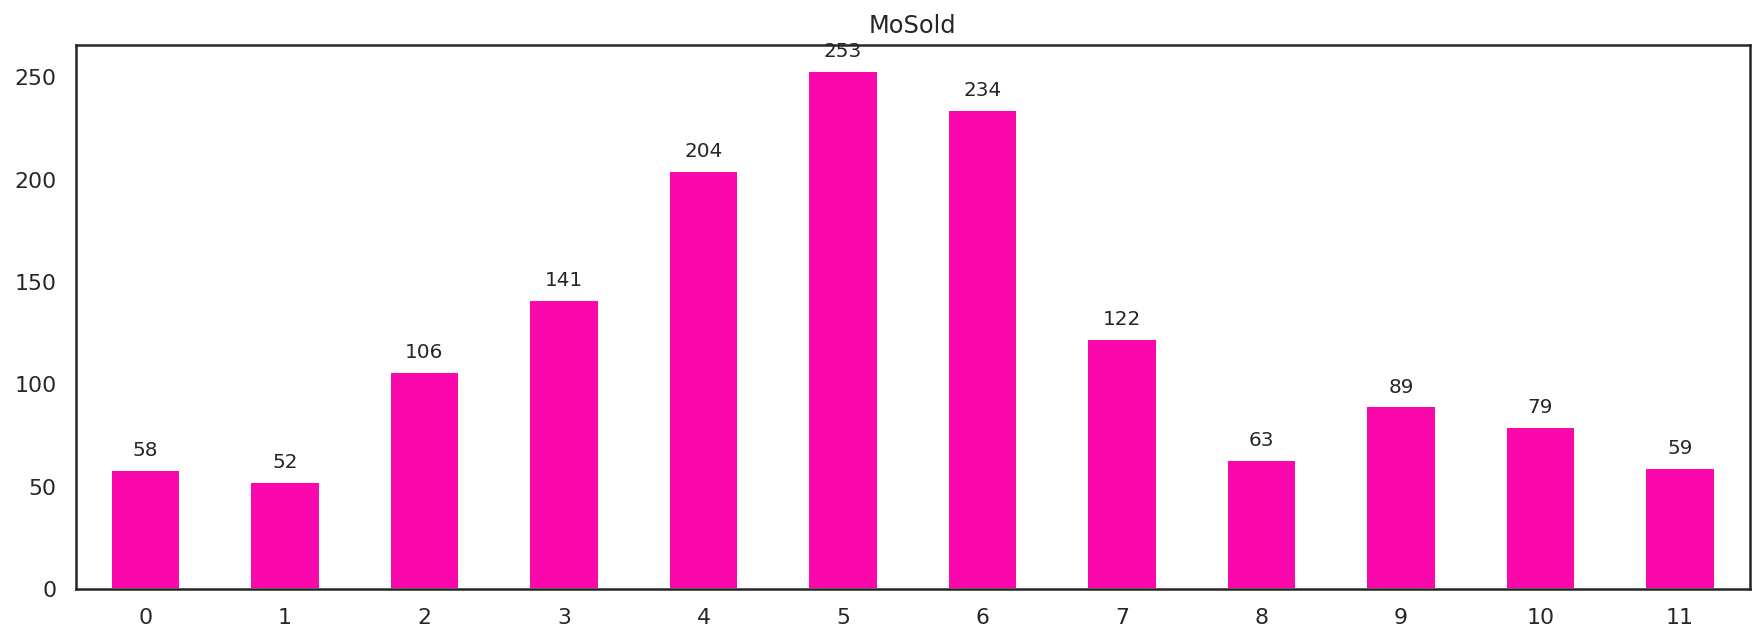

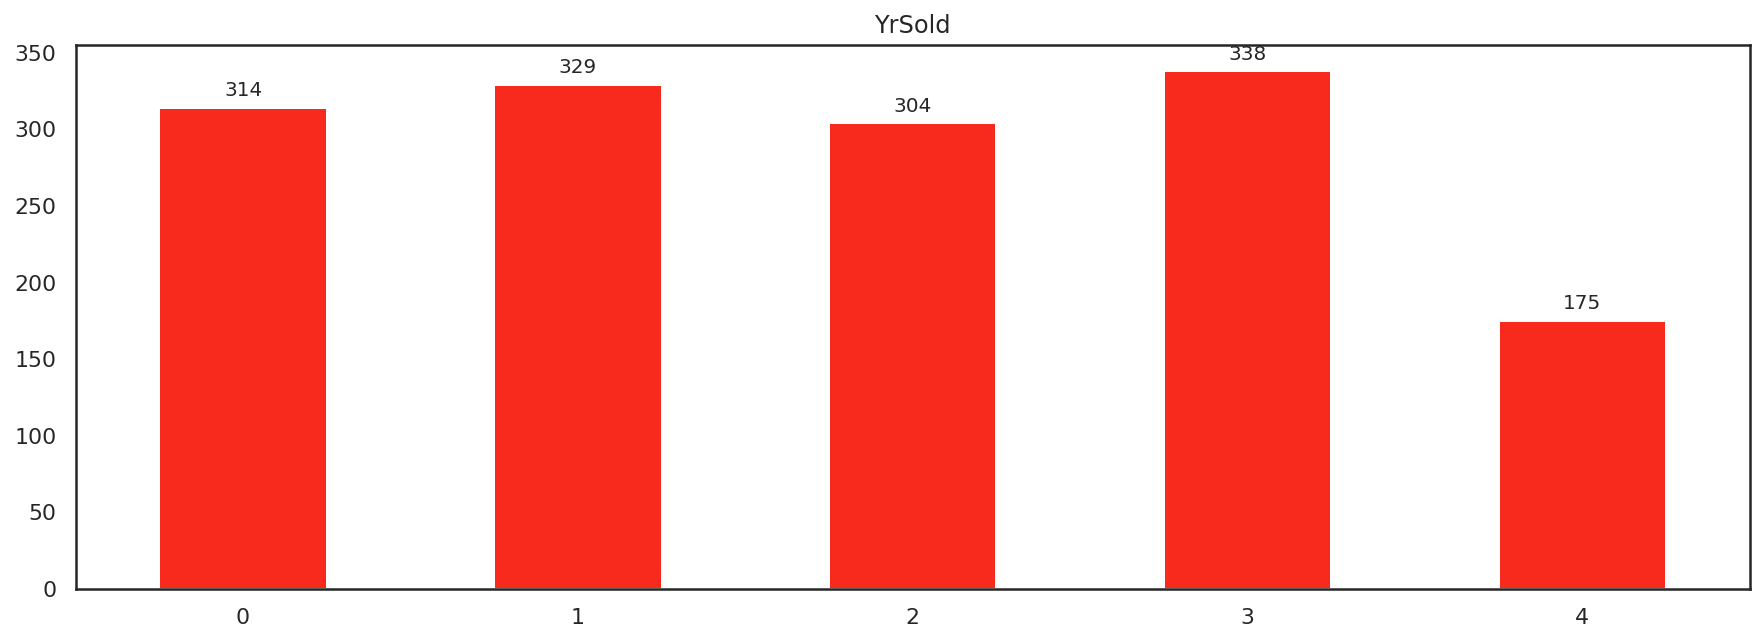

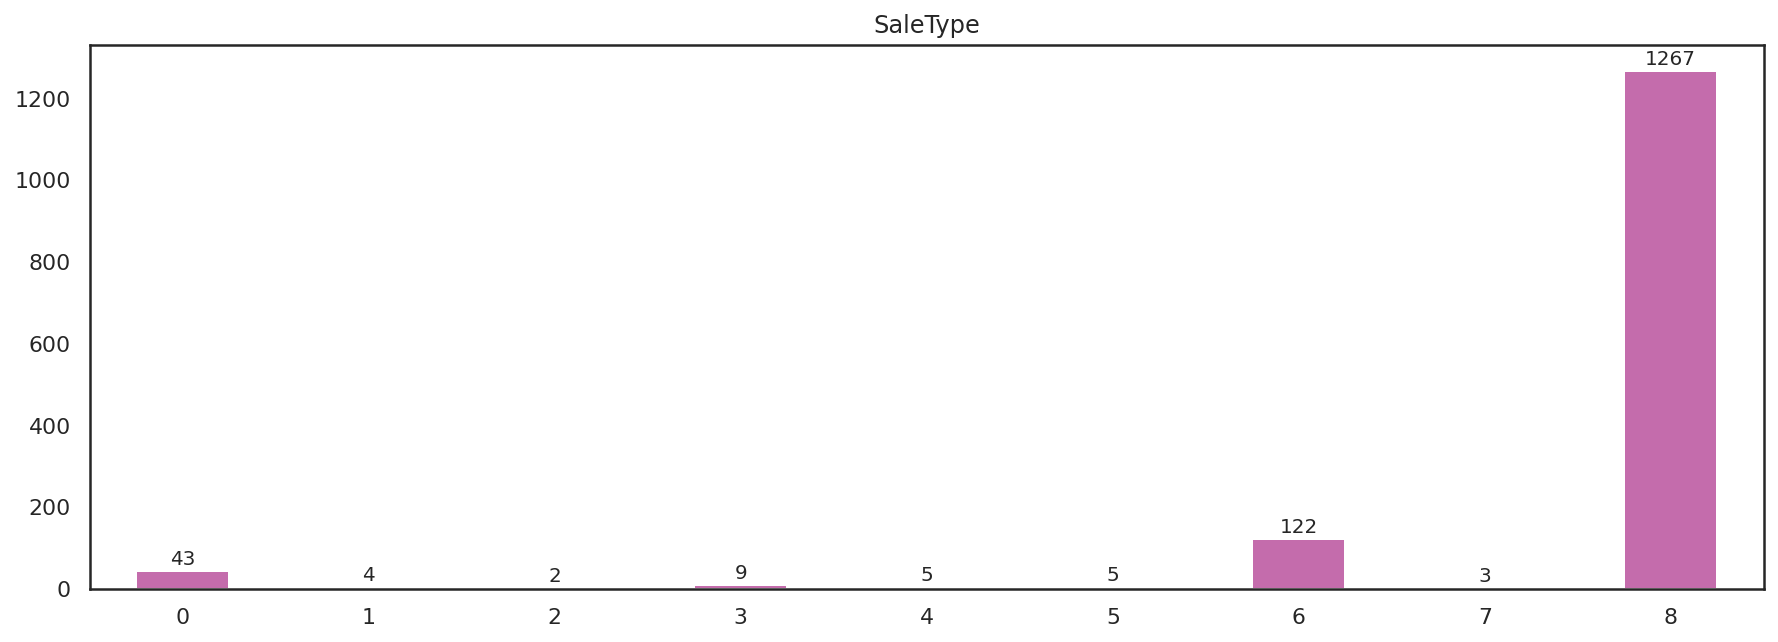

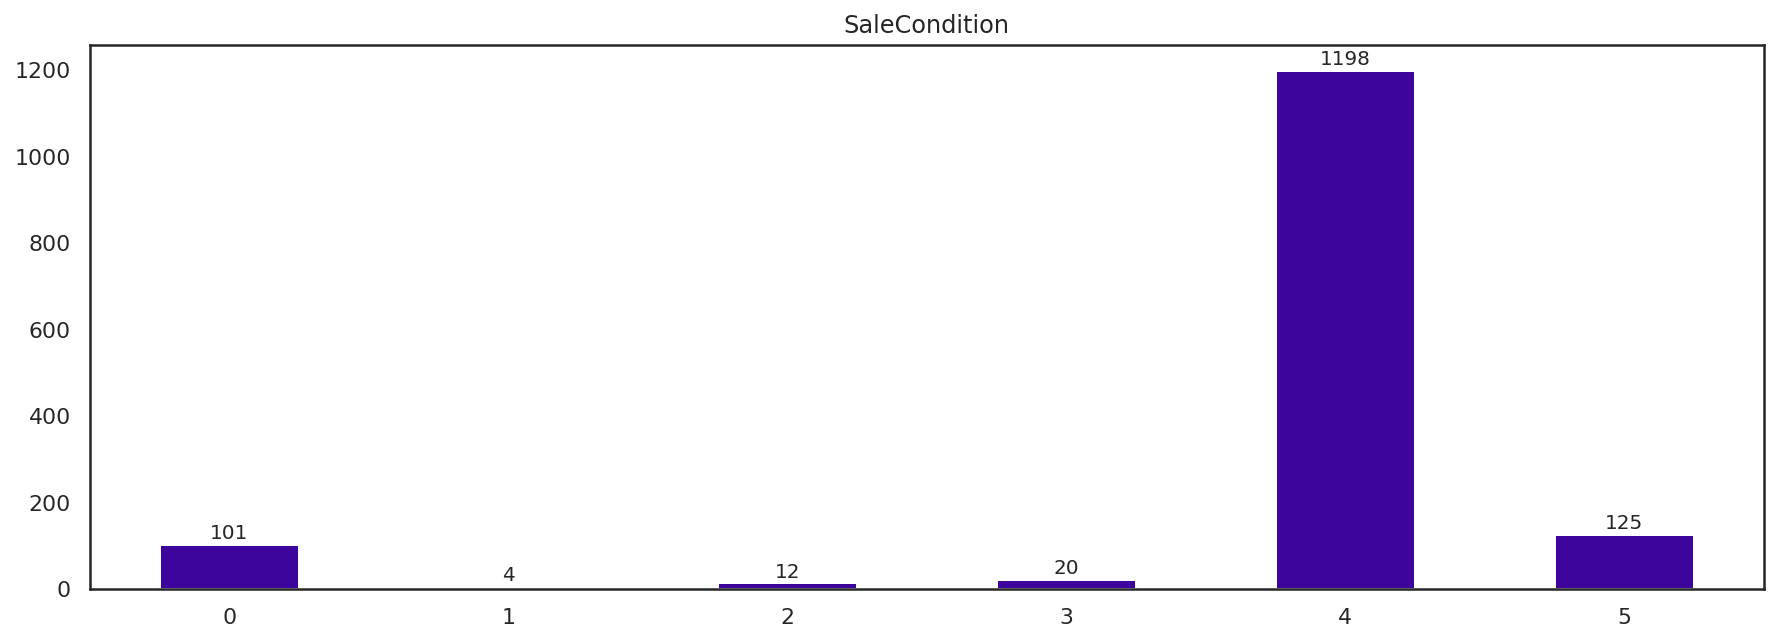

In [ ]:
#Draw all attributes info using pandas.dataframr.plot.bar

plotNotBar = ['LotArea','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
              'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','SalePrice']

print(trainLabel)
for i in trainLabel:
  if i != 'Id':
    if i not in plotNotBar:
      drawGraphBar(i,getLabel(i))

4) Solving the problem by using classification models: kNN, NB, SVM, Logistic Regression,
MultiLayer Perceptron (i.e FFNN). (2p)

In [ ]:
# KNN:K-nearest neighbors

# First, we need to declare some libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
#Load data
X=train_house.iloc[:,:-1].values
y=train_house.iloc[:,79].values

# X = train_house[:,:-1]
# y = train_house[:,79]
# print(type(X),type(y))

#Separate training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=150)#use 1000 data test set for traing

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))
# Here, I first consider the simple case K = 1, that is, for each test data 
# point, we only consider the closest 1 point training data and take the label 
# of that point to predict for this test point.
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Print results for 20 test data points ")
print( "Predicted labels: ", y_pred[20:40])
print( "Ground truth    : ", y_test[20:40])

#Evaluation method
from sklearn.metrics import accuracy_score
print ("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

clf = neighbors.KNeighborsClassifier(n_neighbors =10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

# Weighted neighborhood points
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Training size: 1310
Test size    : 150
Print results for 20 test data points 
Predicted labels:  [4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 5 4 4 5 4]
Ground truth    :  [4 4 4 4 4 0 0 4 4 4 4 4 4 0 4 5 4 4 4 4]
Accuracy of 1NN: 72.00 %
Accuracy of 10NN with major voting: 84.00 %
Accuracy of 10NN (1/distance weights): 82.67 %


In [ ]:
# Multinomaial
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X=train_house.iloc[:,:-1].values
y=train_house.iloc[:,79].values

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7, test_size=0.3, shuffle=False)
print("X_train: {}, Y_train: {}".format(len(x_train), len(x_test)))
print("X_train: {}, Y_train: {}".format(len(y_train), len(y_test)))

model = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
model.fit(x_train, y_train)
print("Showing Performance Metrics for Naive Bayes Multinomial\n")
print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=model, X=x_train, y=y_train, cv=9)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

print("Confusion Matrix for Naive Bayes Multinomial\n")
labels = [0, 1, 2]
cm = confusion_matrix(y_test, predicted, labels=labels)
# print(cm)

print('Precision, Recall and f-1 Scores for Naive Bayes Multinomial\n')
print(classification_report(y_test, predicted))

X_train: 1021, Y_train: 438
X_train: 1021, Y_train: 438
Showing Performance Metrics for Naive Bayes Multinomial

Training Accuracy: 0.31537708129285014
Testing Accuracy: 0.14383561643835616
Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.28070175 0.31578947 0.36842105 0.34210526 0.32743363 0.28318584
 0.28318584 0.21238938 0.18584071]
Mean accuracy: 0.2887836602321931
Standard Deviation: 0.055747214540896706
Confusion Matrix for Naive Bayes Multinomial

Precision, Recall and f-1 Scores for Naive Bayes Multinomial

              precision    recall  f1-score   support

           0       0.09      0.45      0.14        31
           1       0.00      0.00      0.00         0
           2       0.01      0.50      0.03         2
           3       0.00      0.00      0.00         6
           4       0.88      0.13      0.22       365
           5       0.50      0.06      0.11        34

    accuracy                           0.14       438
   macro avg       0.25      0.19   

In [ ]:
#Gaussian
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

X=train_house.iloc[:,:-1].values
y=train_house.iloc[:,79].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)
# print(y_test)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
# print(y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 97.71689497716895


In [ ]:
#Bernoulli
from sklearn.naive_bayes import BernoulliNB

X=train_house.iloc[:,:-1].values
y=train_house.iloc[:,79].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1) 

BNB = BernoulliNB()
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

from sklearn import metrics

accuracy_score_bnb = metrics.accuracy_score(y_pred,y_test)
print('BNB accuracy = ',accuracy_score_bnb*100 ,'%')

BNB accuracy =  84.70319634703196 %


In [ ]:
# SVM : Support Vector Machine
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(21)
from matplotlib.backends.backend_pdf import PdfPages

house_X=train_house.iloc[:,:-1].values
house_y=train_house.iloc[:,79].values


from sklearn.svm import SVC
C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(house_X, house_y) 

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]
print(w_sklearn.T, b_sklearn)


[[ 1.90811671e-03 -4.86544223e-03 -5.49531599e-04 ...  1.03865182e-04
   1.27422474e-04 -1.99990103e+00]] -2.606387820020069


In [ ]:
trainX=X_train
trainy=y_train
testX=X_test
testy=y_test

In [ ]:
# Logistic Regression,

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

x=train_house.iloc[:,:-1].values
y=train_house.iloc[:,79].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=31)

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train) 

print(X_train[-1])
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

#Creating the Confusion matrix  
# from sklearn.metrics import confusion_matrix  
# cm= confusion_matrix()


[-0.00768661 -1.00100029 -0.05883645  0.02257299 -0.67654848  0.06360273
  0.0356071   0.76595162  0.31645067 -0.02839809  0.5927382  -0.22656481
 -0.02002484 -0.02643818 -0.0344302  -0.41531283 -0.55427087 -1.54179287
  1.25576394 -0.05810624 -0.71627229 -0.48993356 -0.12760263 -0.52440835
 -0.68580203  0.52476923 -0.65934326  0.6514981  -2.36388071 -0.52716554
  0.98861548  0.33130851  0.67754412 -1.39799664 -0.75241049  0.34533825
 -0.3081463   0.44131975 -0.58925724 -0.12214649 -0.90250934  0.26074169
  0.30848462 -0.92968881 -0.69409567 -0.1137524  -1.40982188 -0.81907826
 -0.2467132  -1.01564563 -0.75053255  0.16743419 -0.2138228   0.79144768
 -0.92974471  0.24889188 -0.95063272 -0.0970879   1.28839417  0.65962306
  0.93075078  0.33246841 -0.12851324  0.32542242  0.3008815   0.29247849
 -0.74557131 -0.74596701 -0.34592881 -0.11484432 -0.2550437  -0.06732715
  0.06868795  0.45170377 -0.1844204  -0.16261584  0.25904819  0.88995565
  0.3121075   0.2155805 ]


In [ ]:
#Multi-layer Perceptron

from sklearn.neural_network import MLPClassifier

x=train_house.iloc[:,:-1].values
y=train_house.iloc[:,79].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y,random_state=1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(x, y)

print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[:5, :]))
# print(clf.score(X_test, y_test))
from sklearn import metrics 
print('Accuracy Score - Neural Net - Default:', metrics.accuracy_score(y_test,clf.predict(X_test) ))

[[0.06919172 0.00275818 0.00822786 0.01367652 0.82057635 0.08556938]]
[4 4 4 4 4]
Accuracy Score - Neural Net - Default: 0.821917808219178


5)Using early stopping for training process, using validation dataset. (1p)

In [ ]:

# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
import tensorflow as tf

Epoch 01012: early stopping
Train: 1.000, Test: 0.943


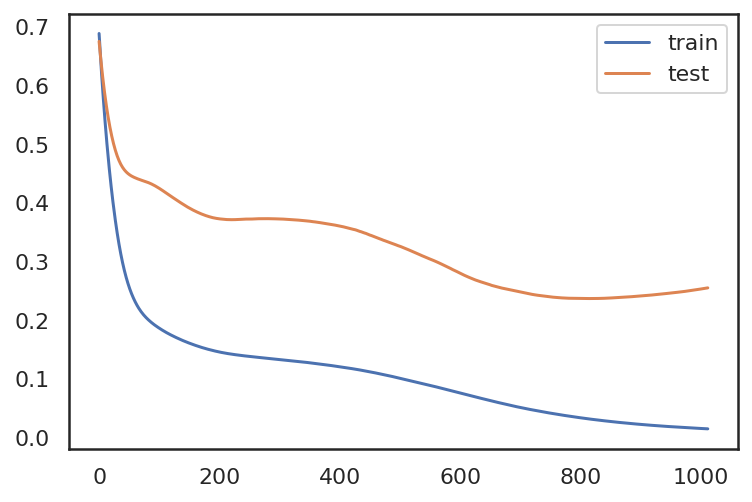

In [ ]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

6) Train the model using parameters: batch size and epoch number. (1p)

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier



In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = pd.read_csv("pima-indians-diabetes.csv",delimiter=",")
# split into input (X) and output (Y) variables
print(dataset)
dataset.shape
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,7]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


In [ ]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.101715 using {'batch_size': 80, 'epochs': 10}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.093914 (0.024375) with: {'batch_size': 10, 'epochs': 10}
0.093914 (0.024375) with: {'batch_size': 10, 'epochs': 50}
0.093914 (0.024375) with: {'batch_size': 10, 'epochs': 100}
0.093914 (0.024375) with: {'batch_size': 20, 'epochs': 10}
0.093914 (0.024375) with: {'batch_size': 20, 'epochs': 50}
0.093914 (0.024375) with: {'batch_size': 20, 'epochs': 100}
0.093914 (0.024375) with: {'batch_size': 40, 'epochs': 10}
0.093914 (0.024375) with: {'batch_size': 40, 'epochs': 50}
0.093914 (0.024375) with: {'batch_size': 40, 'epochs': 100}
0.086071 (0.019115) with: {'batch_size': 60, 'epochs': 10}
0.093914 (0.024375) with: {'batch_size': 60, 'epochs': 50}
0.093914 (0.024375) with: {'batch_size': 60, 'epochs': 100}
0.101715 (0.009065) with: {'batch_size': 80, 'epochs': 10}
0.093914 (0.024375) with: {'batch_size': 80, 'epochs': 50}
0.093914 (0.024375) with: {'batch_size': 80, 'epochs': 100}
0.093914 (0.024375) with: {'batch_size': 100, 'epochs': 10}
0.093914 (0.024375) with: {'batch_size': 100, 'epo

7) Display model evaluation results with different measures. (1p)

In [ ]:
#Câu 7 nằm trong câu 4.

**8) Present the overfiting issue and illustrate this issue through examples. (1p)**

Overfitting is the current object when the built module can be current training for the data. This condition is an all noise data, or any data in the training are used and learning to give up the model model. This law will not have many meaning when apply with new data, can may be another noise data. Meanwhile, it negatively affects the accuracy of the general model.

Show Overfitting frequently appears in non-parametric or nonlinear models, which are highly flexible in target construction.

As such, a lot of mathematical computational parameters will include parameters and techniques to limit the detail of the model.

For example, the math tree decision is an algorithmic computer parameter. This is a normalization of the current overfitting. This can be avoided by pruning (pruning). *italicized text*

9) Presenting (by a program) an example of using Convolution Neural Network or Long Short
Term Memory (2đ) **bold text**



In [45]:
# Long Short Term Memory (LSTMs)

In [46]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [47]:
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


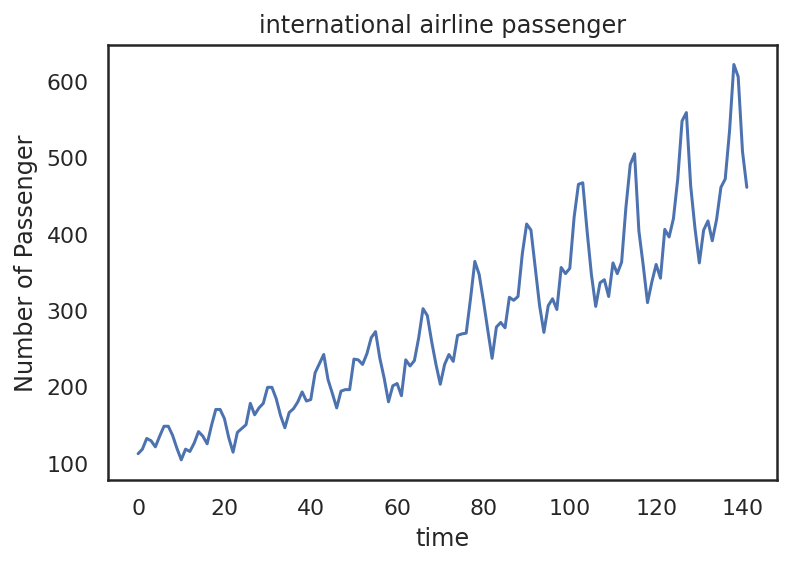

In [48]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [49]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [50]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [51]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [52]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY) 

In [53]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [54]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [55]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.0167
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.0167
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.0167
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.0167
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.0167
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0167
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.0167
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0167
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.0167
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.0167
Epoch 11/50
60/60 [

In [56]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.21 RMSE
Test Score: 42.78 RMSE


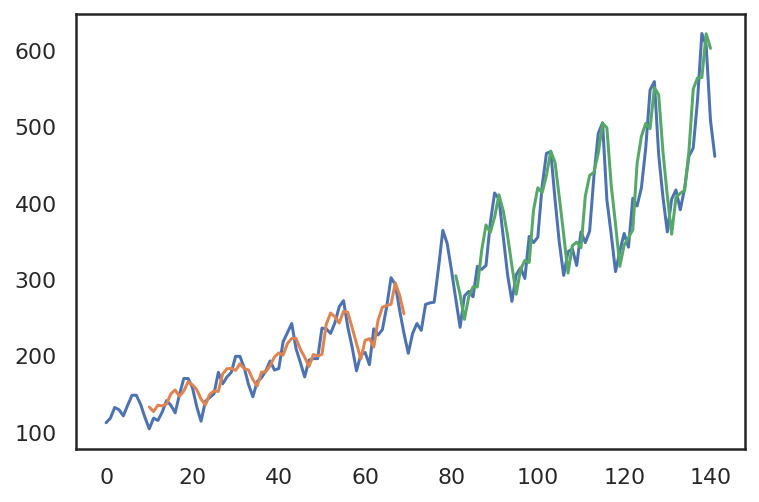

In [57]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()